# Final Features extracted 


- label: This feature indicates whether the file is labeled as benign (False) or malicious (True).
- .textsize: This feature represents the size of the .text section in the PE file.
- .textentropy: This feature represents the entropy of the .text section in the PE file.
- .textvsize: This feature represents the virtual size of the .text section in the PE file.
- .datasize: This feature represents the size of the .data section in the PE file.
- .dataentropy: This feature represents the entropy of the .data section in the PE file.
- .datavsize: This feature represents the virtual size of the .data section in the PE file.
- .rsrcsize: This feature represents the size of the .rsrc section in the PE file.
- .rsrcentropy: This feature represents the entropy of the .rsrc section in the PE file.
- .rsrcvsize: This feature represents the virtual size of the .rsrc section in the PE file.
- machine: This feature represents the type of machine for which the file is intended.
- subsystem: This feature represents the target subsystem for the PE file.
- generalsize: This feature represents the size of the general file information in the PE header.
- generalvsize: This feature represents the virtual size of the general file information in the PE header.
- generalhas_debug: This feature indicates whether the PE file has a debug section (True) or not (False).
- generalexports: This feature represents the number of exported functions in the PE file.
- generalimports: This feature represents the number of imported functions in the PE file.
- generalhas_relocations: This feature indicates whether the PE file has relocation information (True) or not (False).
- generalhas_resources: This feature indicates whether the PE file has resource information (True) or not (False).
- generalhas_signature: This feature indicates whether the PE file has a digital signature (True) or not (False).
- generalhas_tls: This feature indicates whether the PE file has thread local storage (TLS) information (True) or not (False).
- generalsymbols: This feature represents the number of symbols in the PE file.
- stringsnumstrings: This feature represents the number of printable strings in the PE file.
- stringsavlength: This feature represents the average length of the printable strings in the PE file.
- stringsprintabledist: This feature represents the histogram of printable characters within the printable strings.
- stringsprintables: This feature indicates whether the PE file contains printable strings (True) or not (False).
- stringsentropy: This feature represents the entropy of characters across all printable strings.
- stringspaths: This feature represents the number of strings that begin with "C:\" indicating paths.
- stringsurls: This feature represents the number of strings that contain "http://" or "https://" indicating URLs.
- stringsregistry: This feature represents the number of strings that contain "HKEY_" indicating registry keys.
- stringsMZ: This feature represents the number of strings that contain "MZ" indicating Windows PE droppers or bundled executables.
- cofftimestamp: This feature represents the timestamp in the COFF header of the PE file.
- coffmachine: This feature represents the target machine for which the PE file is intended.
- coffcharacteristics: This feature represents a list of image characteristics of the PE file.
- optionalsubsystem: This feature represents the target subsystem specified in the optional header of the PE file.
- optionaldll_characteristics: This feature represents a list of DLL characteristics of the PE file.
- optionalmagic: This feature represents the magic value in the optional header of the PE file.
- optionalmajor_image_version: This feature represents the major image version specified in the optional header of the PE file.
- optionalminor_image_version: This feature represents the minor image version specified in the optional header of the PE file.
- optionalmajor_linker_version: This feature represents the major linker version specified in the optional header of the PE file.
- optionalminor_linker_version: This feature represents the minor linker version specified in the optional header of the PE file.
- optionalmajor_operating_system_version: This feature represents the major operating system version specified in the optional header of the PE file.
- optionalminor_operating_system_version: This feature represents the minor operating system version specified in the optional header of the PE file.
- optionalmajor_subsystem_version: This feature represents the major subsystem version specified in the optional header of the PE file.
- optionalminor_subsystem_version: This feature represents the minor subsystem version specified in the optional header of the PE file.
- optionalsizeof_code: This feature represents the size of the code section specified in the optional header of the PE file.
- optionalsizeof_headers: This feature represents the size of the headers specified in the optional header of the PE file.
- optionalsizeof_heap_commit: This feature represents the size of the committed heap specified in the optional header of the PE file.


# Dependencies

In [1]:
# %pip install scikit-learn 
# %pip install matplotlib
# %pip install scipy 
# %pip install keras 
# %pip install seaborn
# %pip install tensorflow
# %pip install scikeras
# %pip instlal joblib
# %pip install pydot



# Library Imports 


In [2]:
# import all the required libraries in this place

import json
import csv
import threading
import math
import pandas as pd
import numpy as np
import multiprocessing

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

import xgboost as xgb
from scipy.stats import randint

import tensorflow as tf


from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import backend as K
import sklearn.model_selection as model_selection
from sklearn.model_selection import StratifiedKFold

import joblib

import pydot




2023-10-18 12:56:12.182893: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-18 12:56:12.184878: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-18 12:56:12.223634: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-18 12:56:12.224595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 12:56:13.011136: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# Loading  Dataset


## Load from file

In [3]:
#Function to load data set
def load_dataset_from_jsonl(file_path, file_idx_start=0,file_idx_end=0,testing = False):
    dataset = []
    
    for i in range(file_idx_start,file_idx_end+1):
        path = file_path
        if not testing:
            path += '_' + str(i)
        path+= '.jsonl'
        with open(path, 'r') as file:
            for line in file:
                data = json.loads(line)
                dataset.append(data)
    return dataset


FILE_PATH_TRAINING = '../../dataset/ember2018/train_features'
FILE_PATH_TESTING = '../../dataset/ember2018/test_features'


dataset_training = load_dataset_from_jsonl(FILE_PATH_TRAINING,0,5)
dataset_testing = load_dataset_from_jsonl(FILE_PATH_TESTING,testing=True)




## Flattening the json objects


In [30]:
def extract_features(feature, feature_name, features):
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '_' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

def extract_features_from_dataset_to_dataframe(dataset):
    
    features= {}
    features['label']=[]

    section_names = ['.text', '.data', '.rsrc']
    feature_names = ['size', 'entropy', 'vsize']

    for section in section_names:
        for feature in feature_names:
            features[section +'_' + feature] = []

    features['machine']=[]
    features['subsystem']=[]


    for data in dataset:
        
        if data['label'] == -1:
            continue

        #all sections should be equal to 1    
        section_count_list = {'.text':0, '.data':0, '.rsrc':0}
        for item in data['section']['sections']:
            
            if item['name'] in section_names:
                section_count_list[item['name']]+=1
        
        check = False
        for key,value in section_count_list.items():
            if value!=1:
                check=True
                break
        
        if check:
            continue
            
        feature_names = ['size', 'entropy', 'vsize']
            
        for item in data['section']['sections']:

            if item['name'] in section_names:
                
                for feature in feature_names:
                    val = item[feature] if item[feature]!=None else None
                    features[item['name'] + '_' + feature].append(val)
        
        feature_names = ['general', 'strings']

        for feature in feature_names:
            extract_features(data[feature], feature,features)

        for item in data['header']:
            extract_features(data['header'][item], item,features)
        
        features['machine'].append(data['header']['coff']['machine'])
        features['subsystem'].append(data['header']['optional']['subsystem'])
        
        
        features['label'].append(data['label'])

    df = pd.DataFrame(features)
    print(df['label'].value_counts())
    return df


traning_data = extract_features_from_dataset_to_dataframe(dataset_training)
testing_data = extract_features_from_dataset_to_dataframe(dataset_testing)

label
0    157725
1    150733
Name: count, dtype: int64
label
0    57489
1    52790
Name: count, dtype: int64


In [35]:
df_training = traning_data
df_testing = testing_data

In [36]:
df_testing['subsystem'].replace('???','UNKNOWN',inplace=True)
df_training['subsystem'].replace('???','UNKNOWN',inplace=True)

In [37]:
for column in df_testing.columns:
  print("training",column)
  print(df_training[column].value_counts())
  print('-------\n')
  print("tesinting",column)
  print(df_testing[column].value_counts())
  print()
  print("---------------------------------------------------------------------------------------------------------\n")

training label
label
0    157725
1    150733
Name: count, dtype: int64
-------

tesinting label
label
0    57489
1    52790
Name: count, dtype: int64

---------------------------------------------------------------------------------------------------------

training .text_size
.text_size
262144      10685
169984       8156
6656         4887
761856       3974
4096         3850
            ...  
20132352        1
4400128         1
12588032        1
3291648         1
5459968         1
Name: count, Length: 10812, dtype: int64
-------

tesinting .text_size
.text_size
28672      3784
49152      3480
6656       2928
36864      2475
361472     2320
           ... 
1797120       1
1808896       1
7929856       1
6318080       1
1980416       1
Name: count, Length: 5848, dtype: int64

---------------------------------------------------------------------------------------------------------

training .text_entropy
.text_entropy
 6.640590    10482
 6.719869     8112
 6.610926     3930
 6.191553    

## Removing null columns from dataframes

In [38]:
df_training.dropna(how='all', axis=1, inplace=True)
df_testing.dropna(how='all', axis=1, inplace=True)

In [40]:
df_training.columns,df_testing.columns

(Index(['label', '.text_size', '.text_entropy', '.text_vsize', '.data_size',
        '.data_entropy', '.data_vsize', '.rsrc_size', '.rsrc_entropy',
        '.rsrc_vsize', 'machine', 'subsystem', 'general_size', 'general_vsize',
        'general_has_debug', 'general_exports', 'general_imports',
        'general_has_relocations', 'general_has_resources',
        'general_has_signature', 'general_has_tls', 'general_symbols',
        'strings_numstrings', 'strings_avlength', 'strings_printables',
        'strings_entropy', 'strings_paths', 'strings_urls', 'strings_registry',
        'strings_MZ', 'coff_timestamp', 'optional_major_image_version',
        'optional_minor_image_version', 'optional_major_linker_version',
        'optional_minor_linker_version',
        'optional_major_operating_system_version',
        'optional_minor_operating_system_version',
        'optional_major_subsystem_version', 'optional_minor_subsystem_version',
        'optional_sizeof_code', 'optional_sizeof_heade

## Encoding non integer columns

In [41]:

columns_to_encode = ['machine', 'subsystem']

df_training = pd.get_dummies(df_training, columns=columns_to_encode)
df_testing = pd.get_dummies(df_testing, columns=columns_to_encode)


In [42]:
print("In training diff",df_training.columns.difference(df_testing.columns))
print("In testing diff",df_testing.columns.difference(df_training.columns))

In training diff Index(['machine_MIPSFPU', 'machine_SH4', 'subsystem_POSIX_CUI'], dtype='object')
In testing diff Index([], dtype='object')


## Adding the columns

In [43]:
for column in df_training.columns.difference(df_testing.columns):
    df_testing[column] = 0  
    
for column in df_testing.columns.difference(df_training.columns):
  df_training[column]= 0
  
df_testing = df_testing[df_training.columns]

In [8]:
df_training.columns

Index(['label', '.text_size', '.text_entropy', '.text_vsize', '.data_size',
       '.data_entropy', '.data_vsize', '.rsrc_size', '.rsrc_entropy',
       '.rsrc_vsize', 'general_size', 'general_vsize', 'general_has_debug',
       'general_exports', 'general_imports', 'general_has_relocations',
       'general_has_resources', 'general_has_signature', 'general_has_tls',
       'general_symbols', 'strings_numstrings', 'strings_avlength',
       'strings_printables', 'strings_entropy', 'strings_paths',
       'strings_urls', 'strings_registry', 'strings_MZ', 'coff_timestamp',
       'optional_major_image_version', 'optional_minor_image_version',
       'optional_major_linker_version', 'optional_minor_linker_version',
       'optional_major_operating_system_version',
       'optional_minor_operating_system_version',
       'optional_major_subsystem_version', 'optional_minor_subsystem_version',
       'optional_sizeof_code', 'optional_sizeof_headers',
       'optional_sizeof_heap_commit', 'ma

## Standardization

In [45]:
# Columns to exclude from standardization
def standardize(df,df_train_fit):
    scaler = StandardScaler()
    exclude_columns= [
    "machine", "subsystem", "label"
    ]

    df_standardized = df.copy()

    for column in df.columns:
        if all([ x not in column for x in exclude_columns]):
            # Standardize the column
            scaler = scaler.fit(df_train_fit[column].values.reshape(-1, 1))
            df_standardized[column] = scaler.transform(df[column].values.reshape(-1, 1))

    return df_standardized

df_training_standardized = standardize(df_training,df_training)
df_testing_standardized = standardize(df_testing,df_training)

## Saving to csv 

In [46]:
df_training.to_csv('../filtered-data/original/training.csv',index= False)
df_testing.to_csv('../filtered-data/original/testing.csv',index= False)
df_training_standardized.to_csv('../filtered-data/standardized/training.csv',index= False)
df_testing_standardized.to_csv('../filtered-data/standardized/testing.csv',index= False)

In [47]:

# for column_name in df_training.columns:
#     print(column_name)
print(df_training.columns.difference(df_testing.columns))
print(df_testing.columns.difference(df_training.columns))

print(df_training_standardized.columns.difference(df_testing_standardized.columns))
print(df_testing_standardized.columns.difference(df_training_standardized.columns))

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


# Column distributions

In [14]:
print("Training",df_training.var(),sep = "\n")

label                                 0.249872
.text_size                            1.000003
.text_entropy                         1.000003
.text_vsize                           1.000003
.data_size                            1.000003
                                        ...   
subsystem_UNKNOWN                     0.000036
subsystem_WINDOWS_BOOT_APPLICATION    0.000301
subsystem_WINDOWS_CE_GUI              0.000593
subsystem_WINDOWS_CUI                 0.088232
subsystem_WINDOWS_GUI                 0.097899
Length: 61, dtype: float64

In [15]:
df_training.describe()

label    .text_size  .text_entropy   .text_vsize    .data_size  \
count  308458.000000  3.084580e+05   3.084580e+05  3.084580e+05  3.084580e+05   
mean        0.488666  2.395673e-17  -1.273208e-15  6.265606e-18  3.271015e-17   
std         0.499872  1.000002e+00   1.000002e+00  1.000002e+00  1.000002e+00   
min         0.000000 -3.108247e-01  -6.688324e+00 -3.024155e-01 -1.571404e-01   
25%         0.000000 -2.917465e-01  -7.112721e-02 -2.838069e-01 -1.523223e-01   
50%         0.000000 -2.306368e-01   2.150856e-01 -2.253012e-01 -1.450951e-01   
75%         1.000000 -8.904121e-02   3.627305e-01 -8.236268e-02 -1.222089e-01   
max         1.000000  4.530711e+01   1.813260e+00  1.470166e+02  9.705372e+01   

       .data_entropy   .data_vsize    .rsrc_size  .rsrc_entropy   .rsrc_vsize  \
count   3.084580e+05  3.084580e+05  3.084580e+05   3.084580e+05  3.084580e+05   
mean    5.933897e-17  4.114107e-17  1.142552e-17   1.990251e-17  3.667222e-17   
std     1.000002e+00  1.000002e+00  1.000002e+00   1.000002e+00  1.000002e+00   
min    -1.661430e+00 -6.819539e-02 -1.178607e-01  -2.667005e+00 -1.176910e-01   
25%    -6.638235e-01 -6.765576e-02 -1.169476e-01  -6.313558e-01 -1.170898e-01   
50%     1.586481e-01 -6.649281e-02 -1.123816e-01  -4.843349e-02 -1.119996e-01   
75%     6.904802e-01 -5.837204e-02 -7.494070e-02   6.008797e-01 -7.502452e-02   
max     2.394861e+00  8.276163e+01  1.561898e+02   1.652883e+00  1.557497e+02   

       ...  optional_minor_image_version  optional_major_linker_version  \
count  ...                  3.084580e+05                   3.084580e+05   
mean   ...                  7.015405e-17                  -1.022768e-16   
std    ...                  1.000002e+00                   1.000002e+00   
min    ...                 -3.359429e-02                  -1.322507e+00   
25%    ...                 -3.359429e-02                  -4.461515e-01   
50%    ...                 -3.359429e-02                  -7.973976e-03   
75%    ...                 -3.359429e-02                   4.302036e-01   
max    ...                  9.702215e+01                   3.592258e+01   

       optional_minor_linker_version  optional_major_operating_system_version  \
count                   3.084580e+05                             3.084580e+05   
mean                   -1.179408e-17                             5.376443e-17   
std                     1.000002e+00                             1.000002e+00   
min                    -4.807675e-01                            -1.984817e-02   
25%                    -4.807675e-01                            -9.145315e-03   
50%                    -4.807675e-01                            -6.469602e-03   
75%                     3.090054e-01                            -6.469602e-03   
max                     1.782760e+01                             1.753330e+02   

       optional_minor_operating_system_version  \
count                             3.084580e+05   
mean                              3.948253e-17   
std                               1.000002e+00   
min                              -8.700947e-03   
25%                              -8.700947e-03   
50%                              -8.700947e-03   
75%                               3.234297e-04   
max                               2.957111e+02   

       optional_major_subsystem_version  optional_minor_subsystem_version  \
count                     308458.000000                     308458.000000   
mean                           4.878564                          0.619848   
std                            1.450776                        117.543856   
min                            0.000000                          0.000000   
25%                            4.000000                          0.000000   
50%                            5.000000                          0.000000   
75%                            5.000000                          1.000000   
max                          501.000000                      65280.000000   

    

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


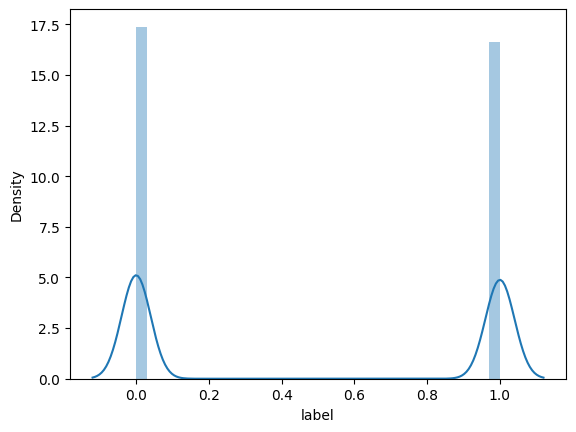

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


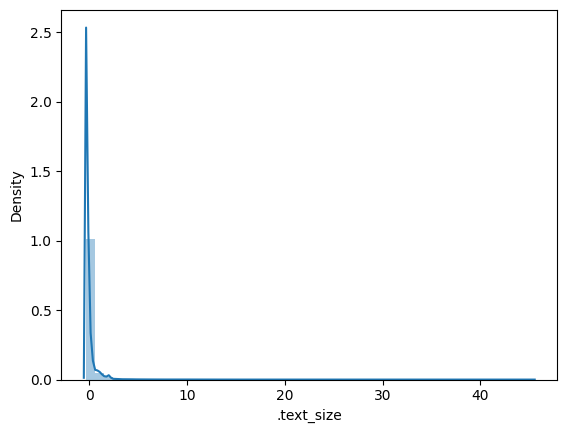

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


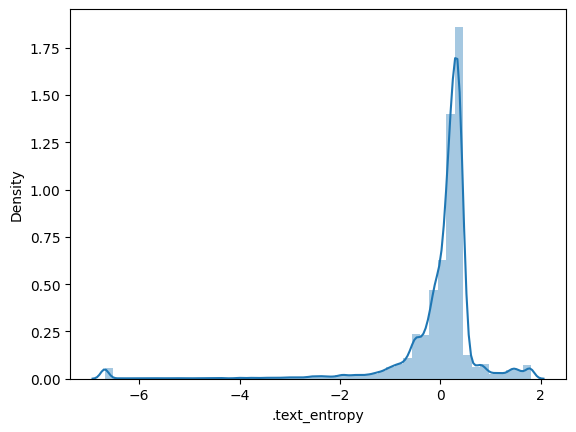

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


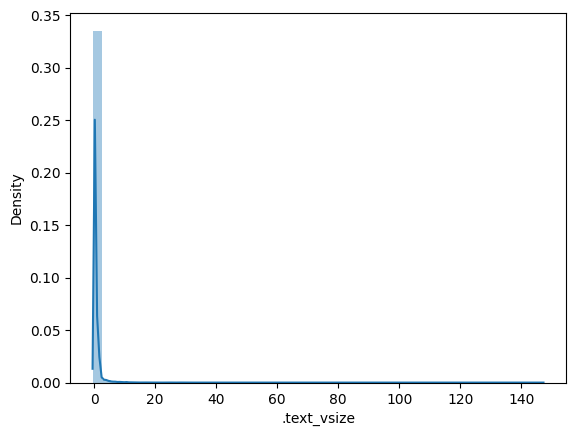

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


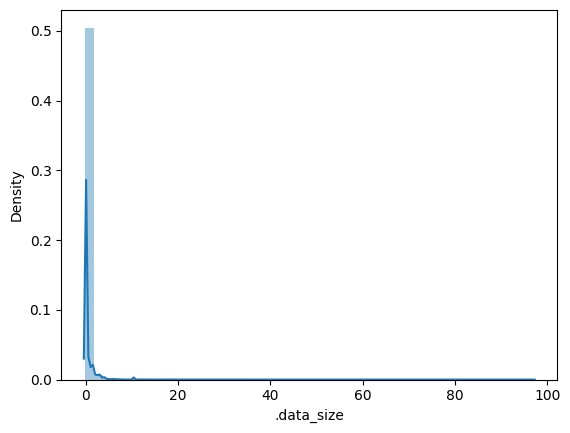

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


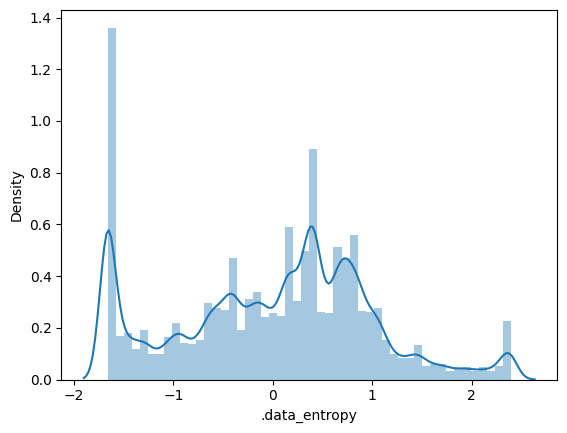

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


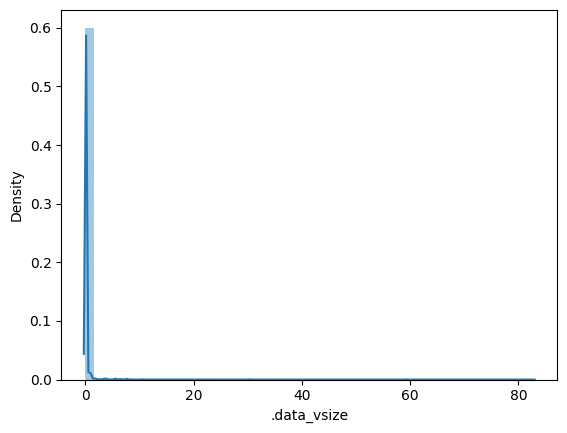

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


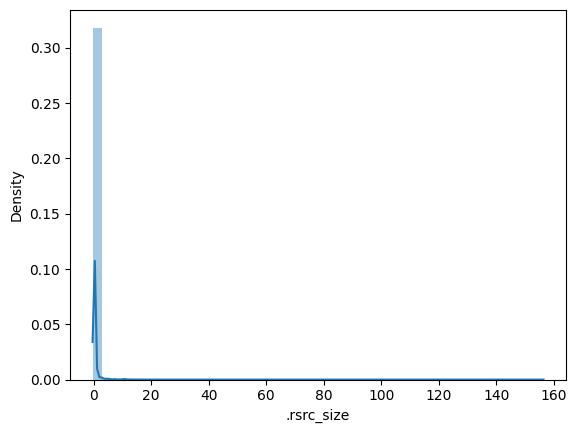

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


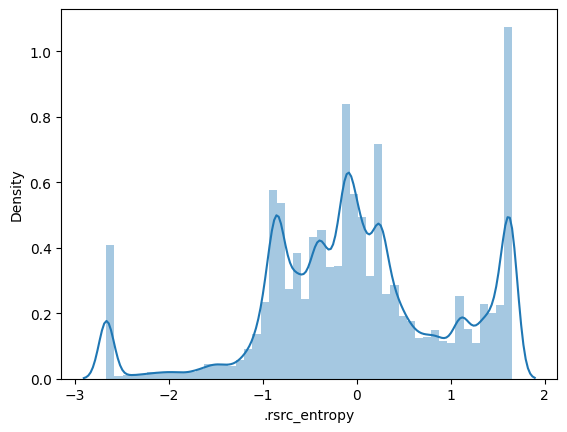

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


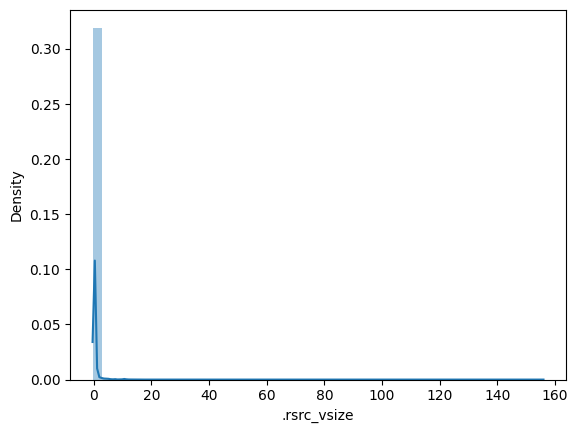

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


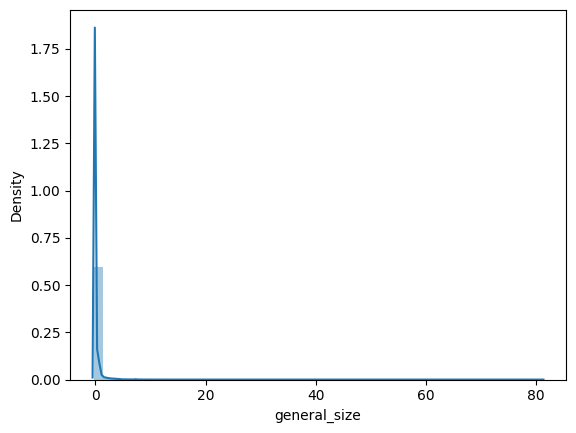

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


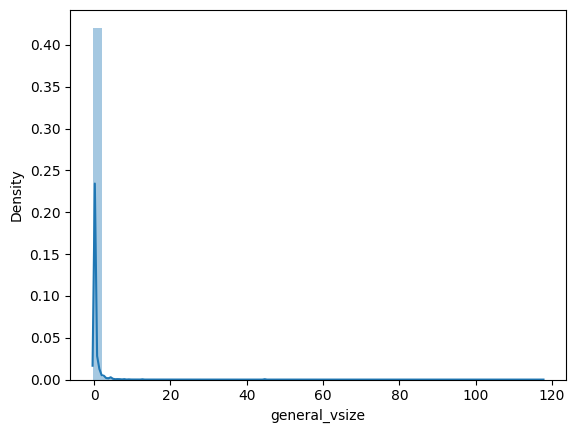

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


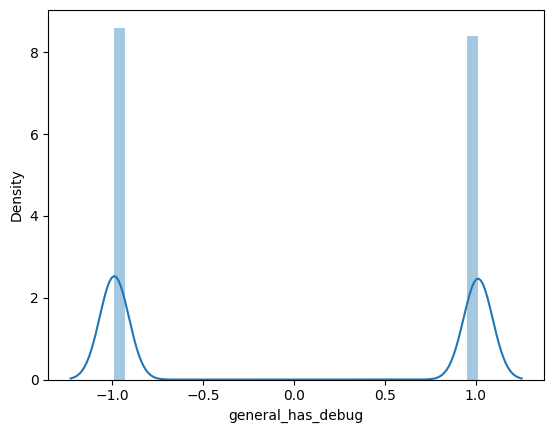

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


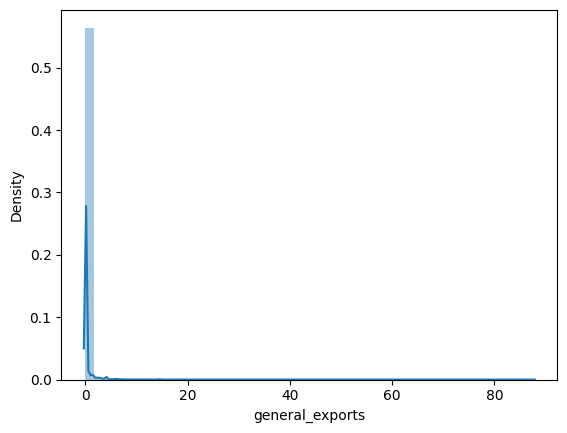

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


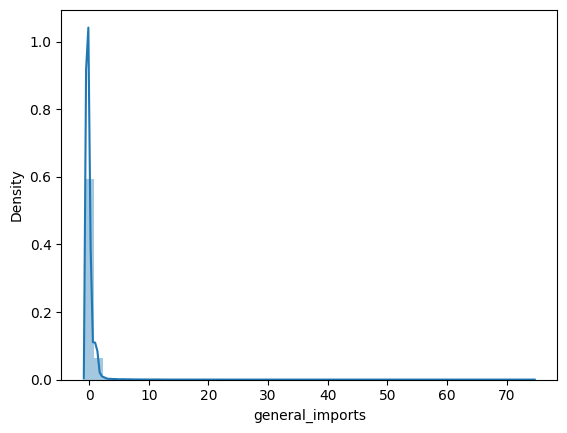

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


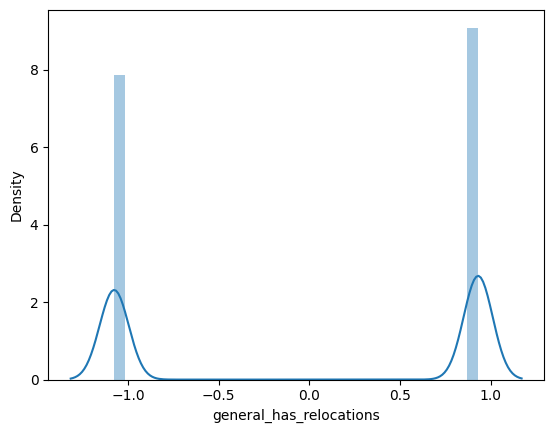

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


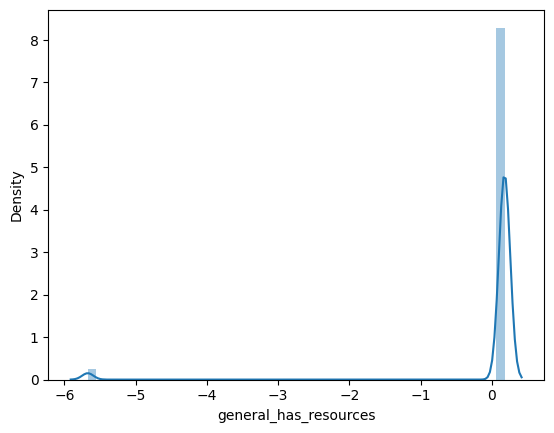

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


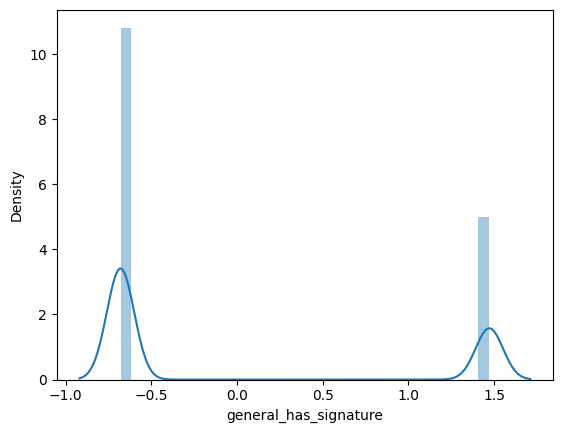

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


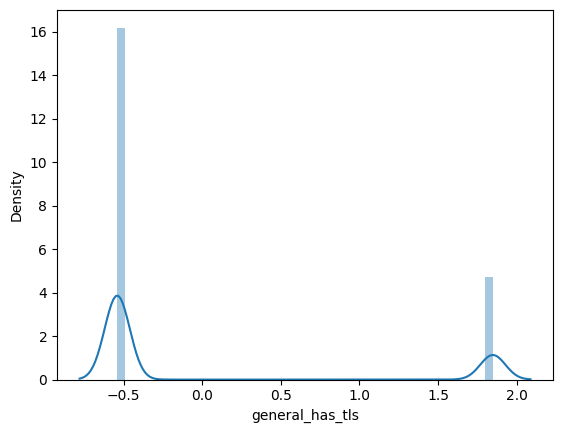

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


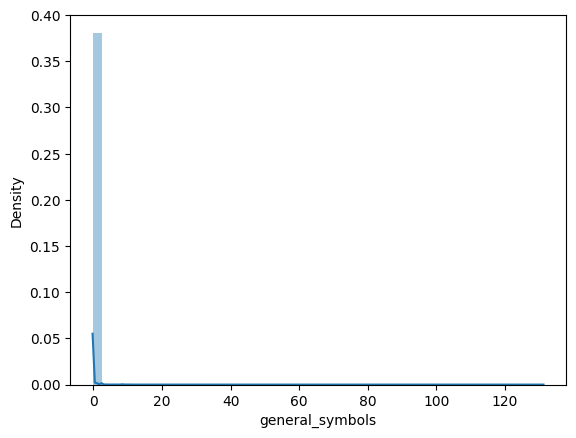

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


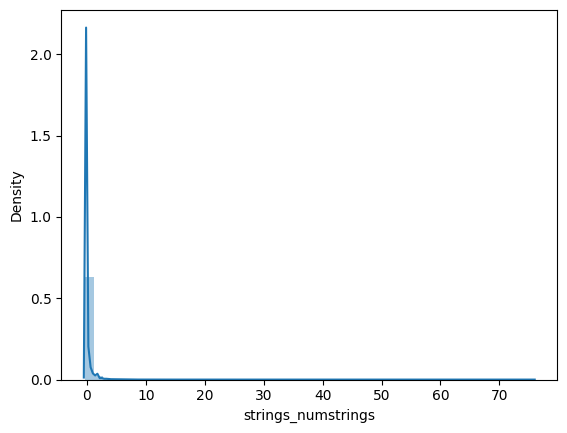

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


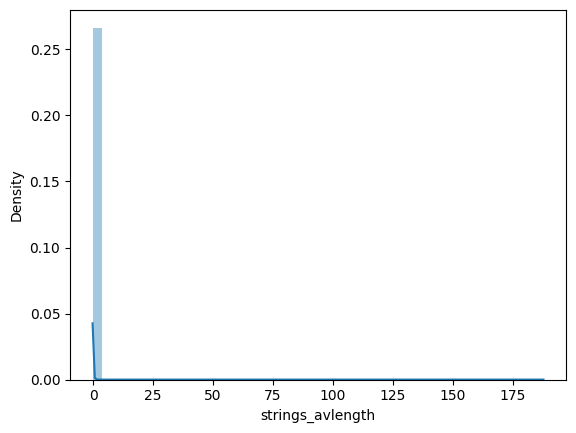

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


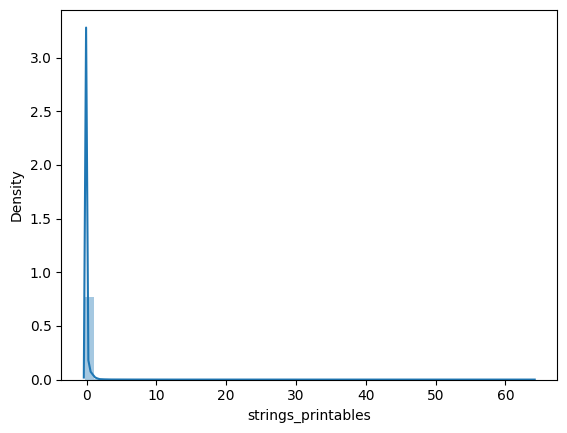

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


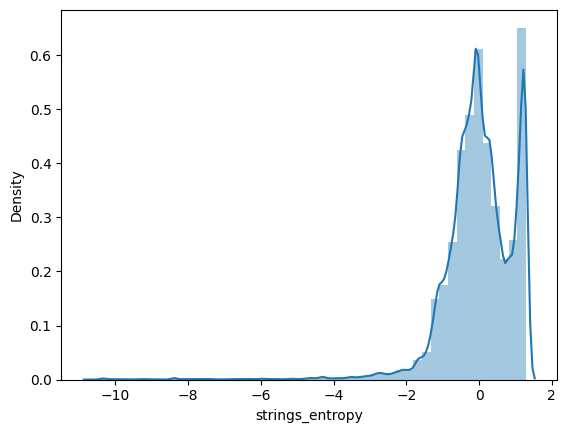

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


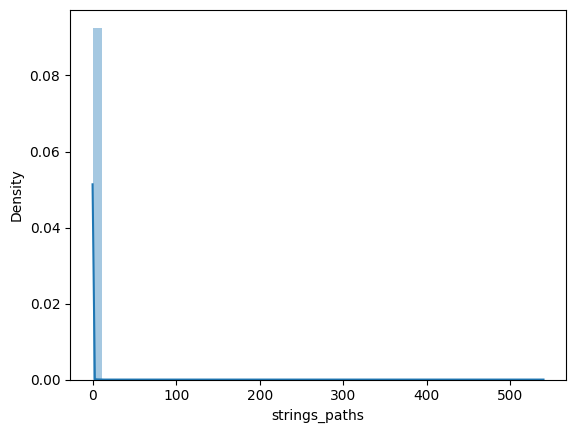

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


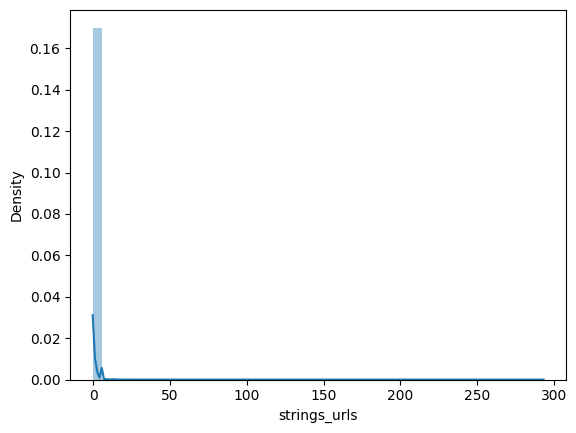

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


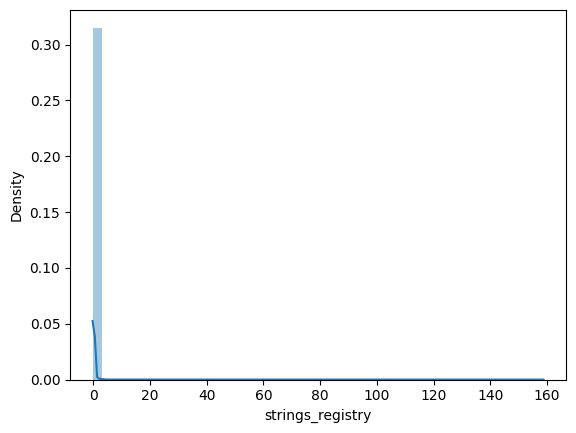

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


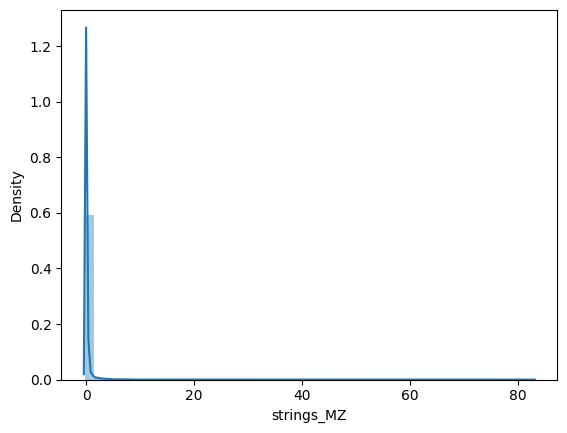

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


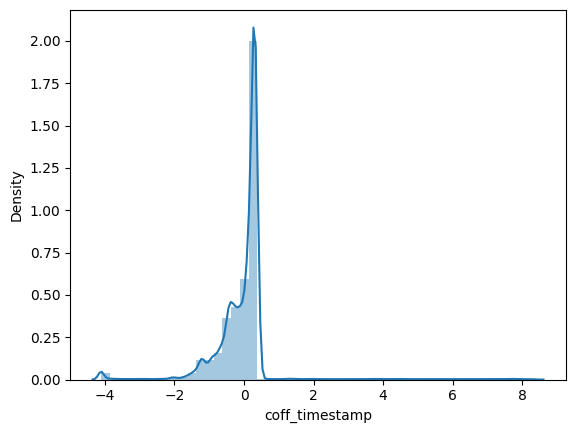

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


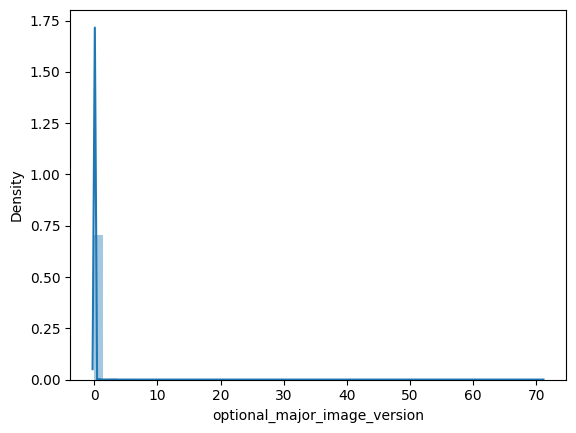

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


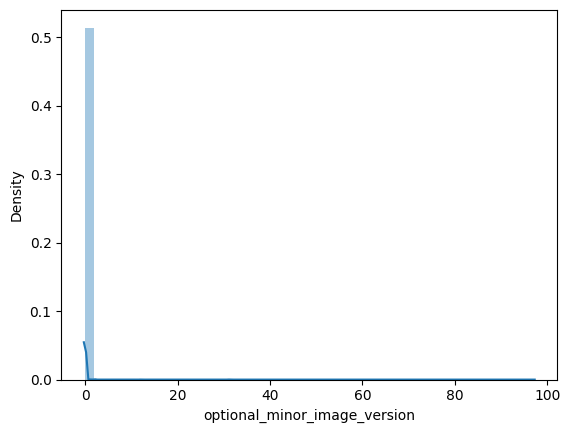

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


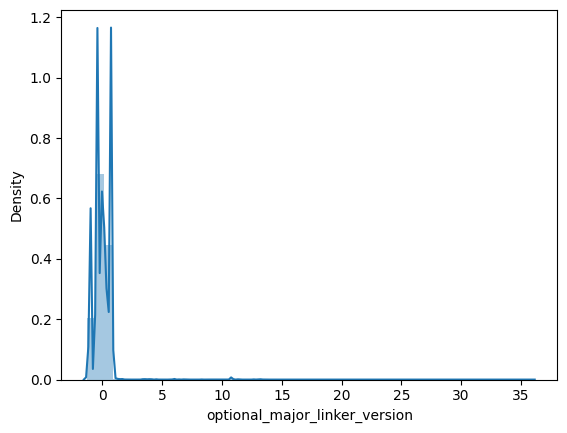

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


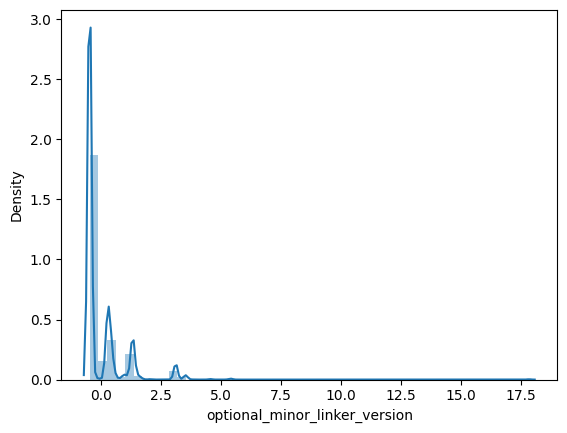

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


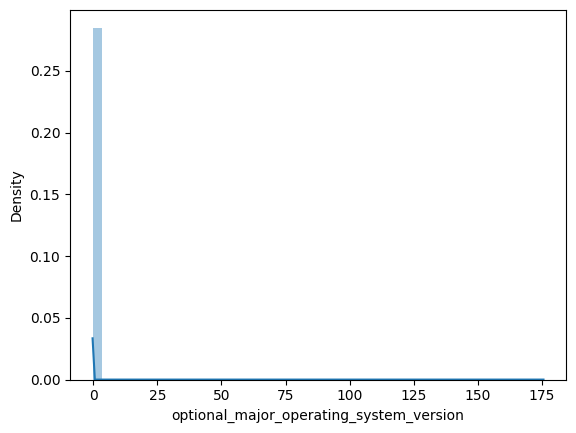

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


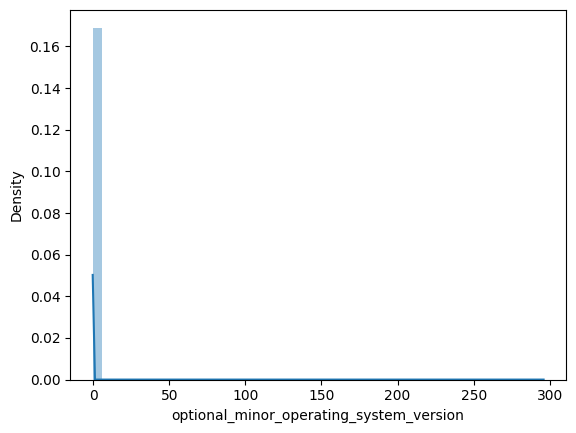

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


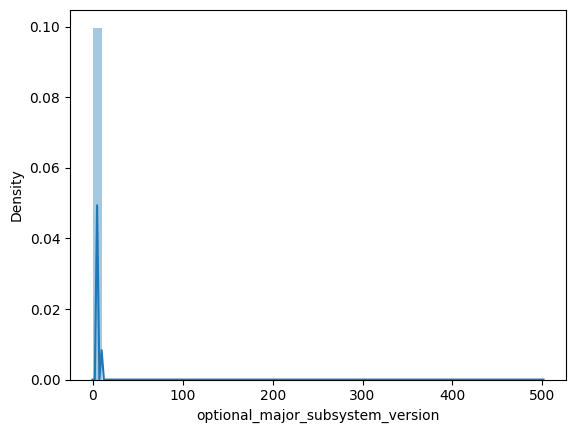

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


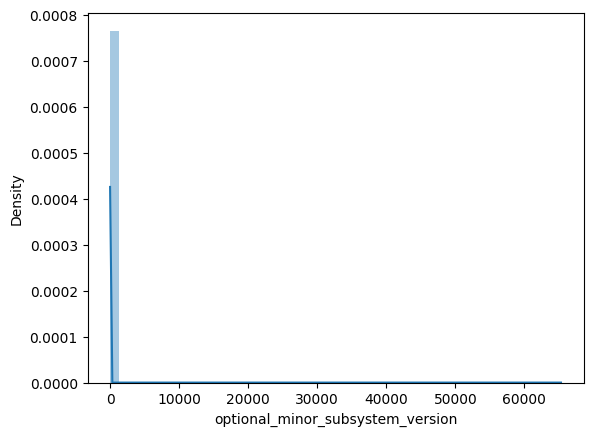

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


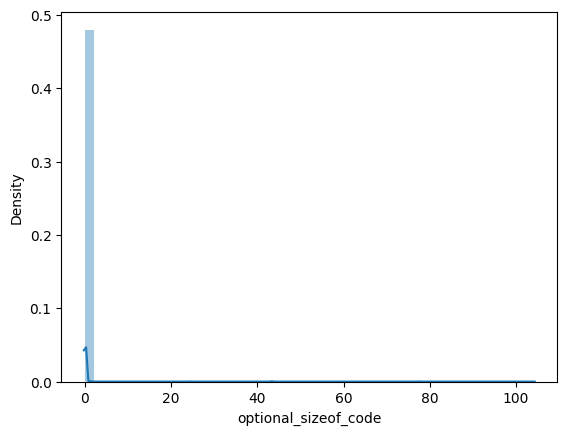

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


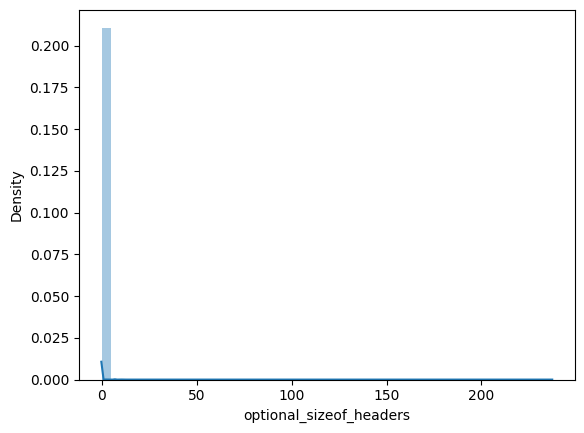

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


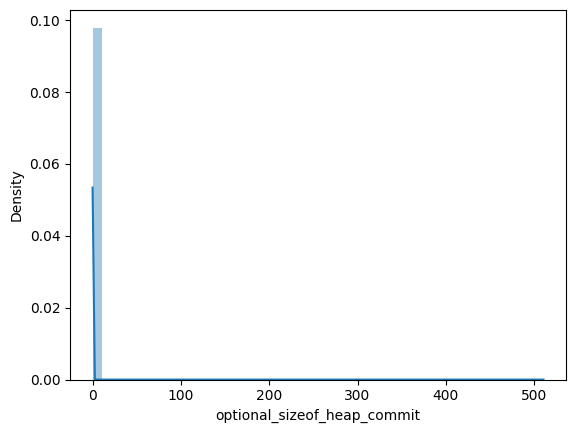

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


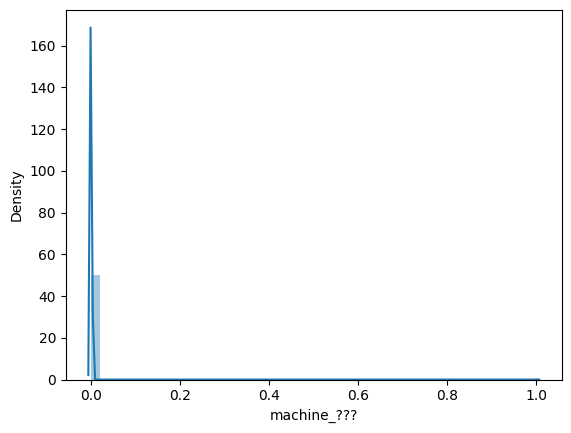

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


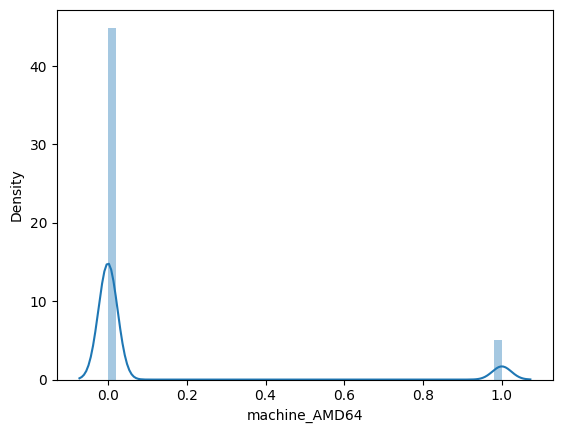

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


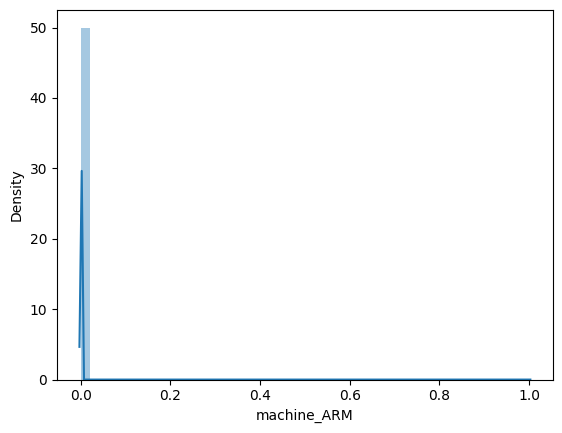

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


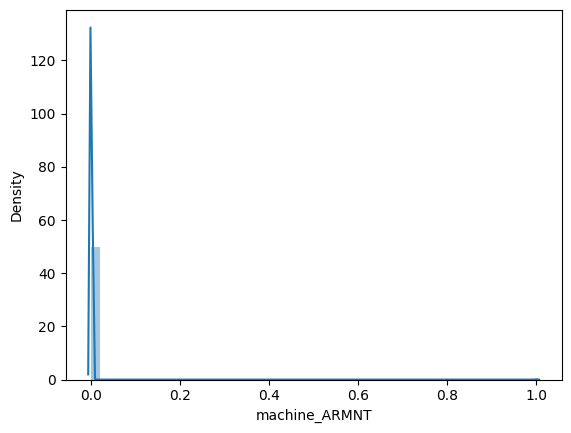

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


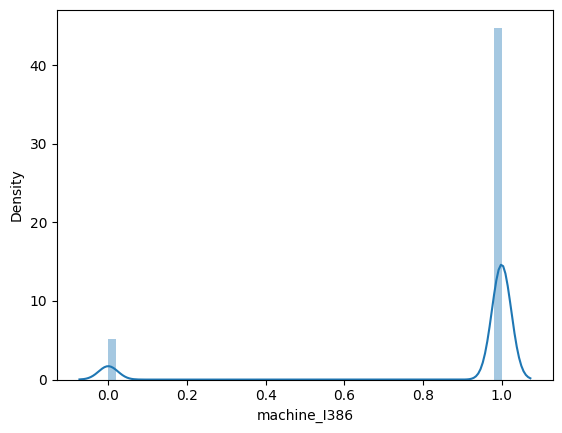

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


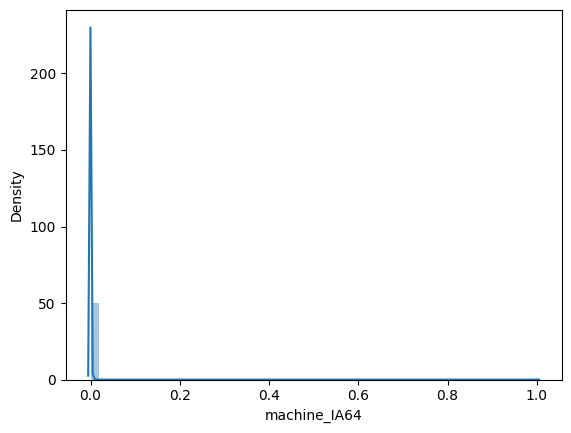

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


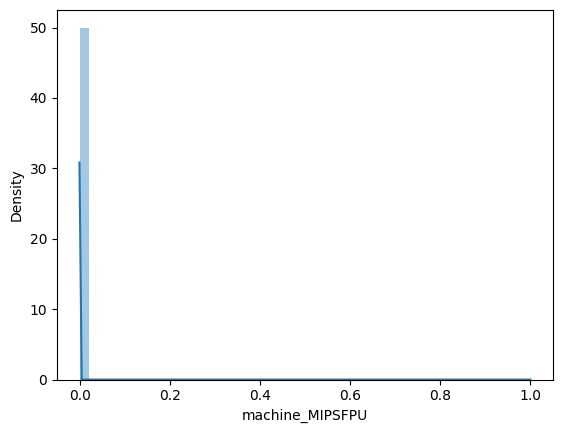

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


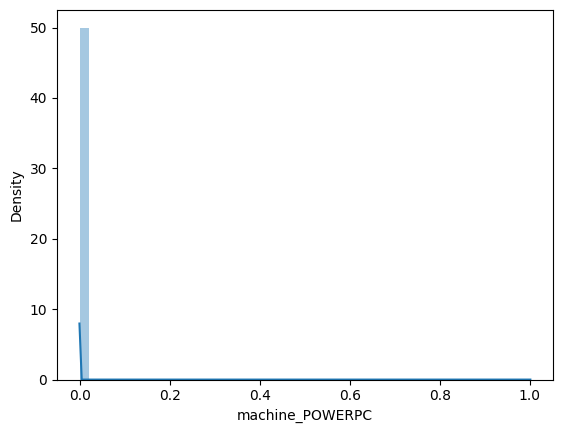

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


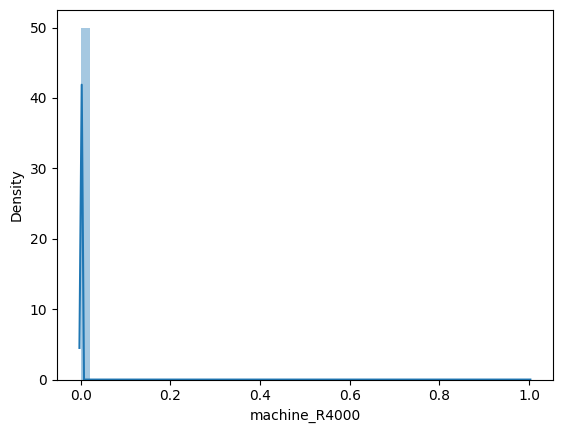

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


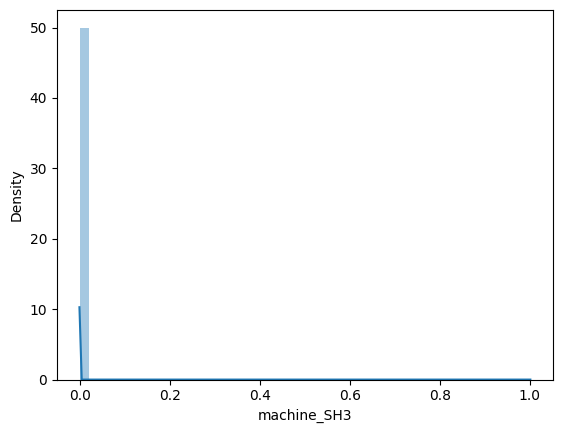

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


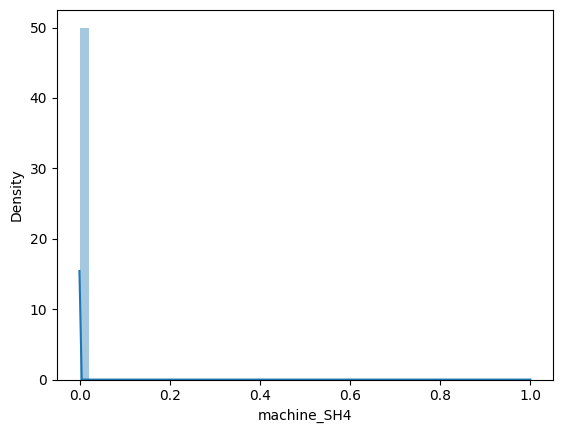

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


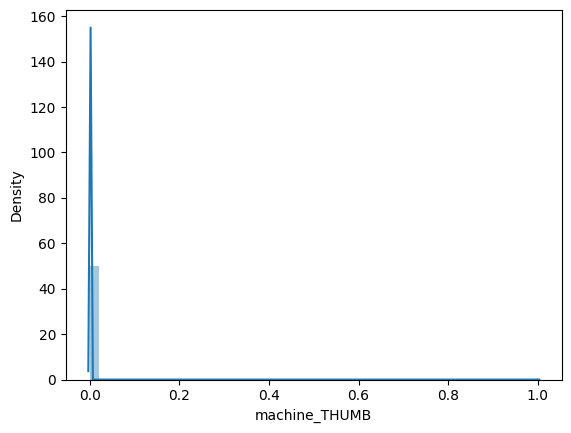

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


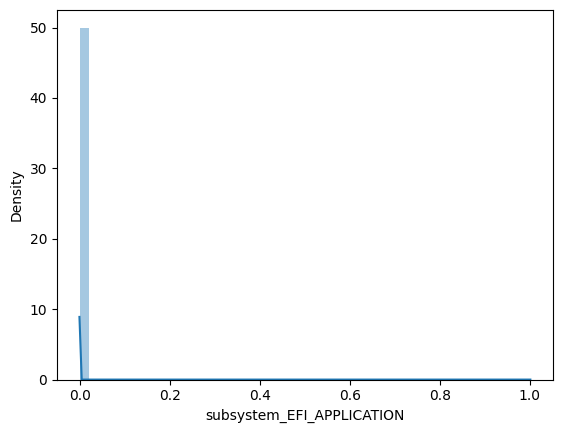

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


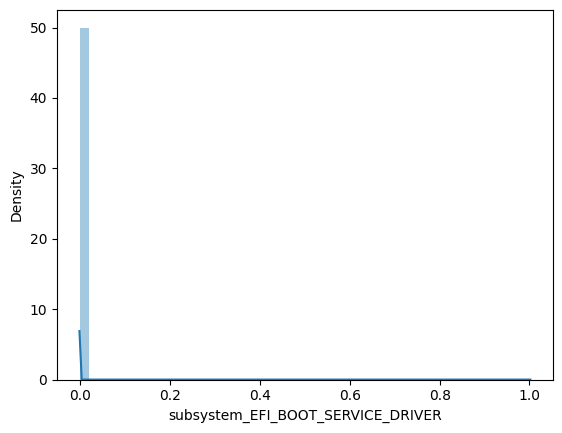

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


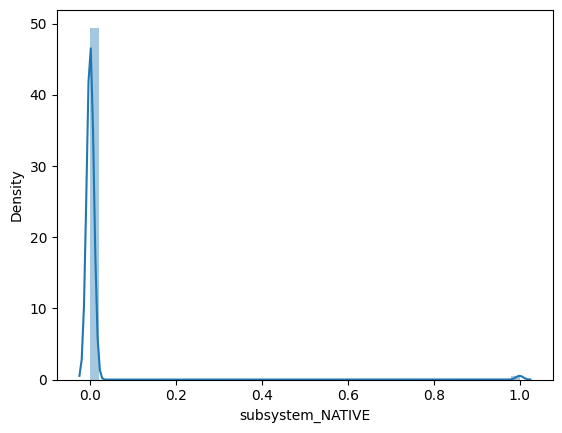

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


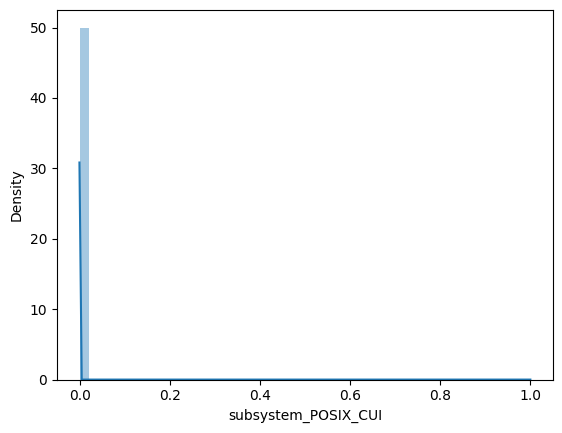

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


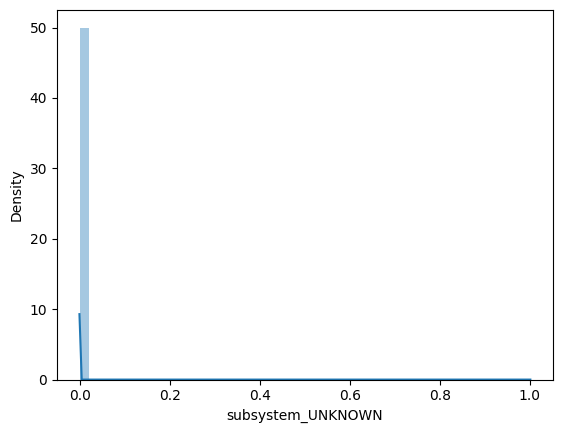

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


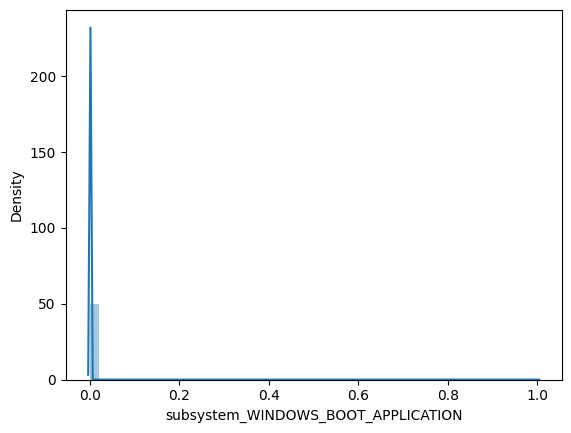

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


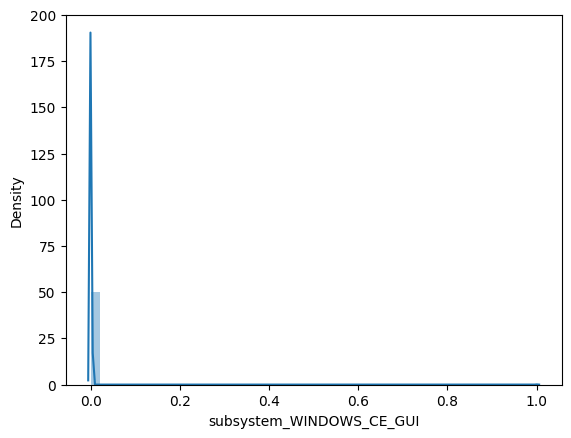

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


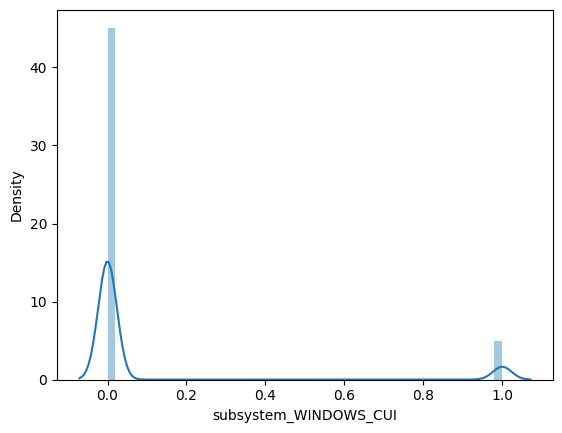

/tmp/ipykernel_6318/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


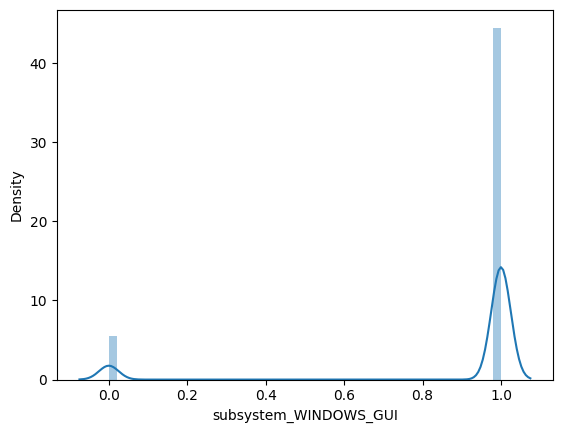

In [9]:
#plot normal distribution of features
def plot_normal_distribution(df):
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()
        
plot_normal_distribution(df_training)

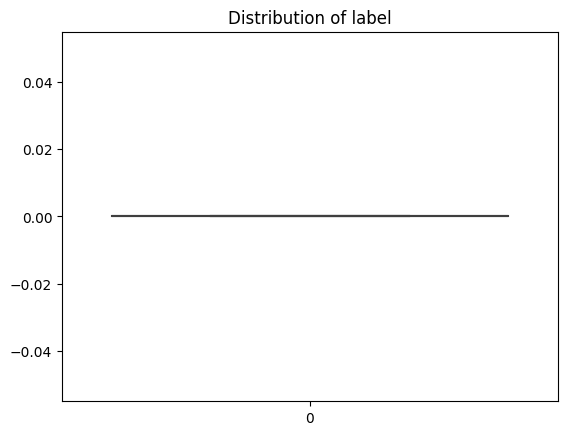

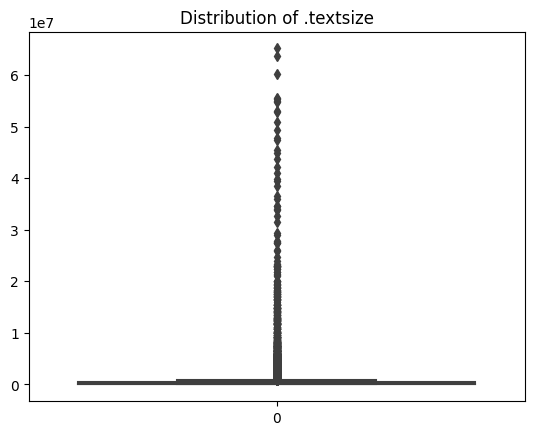

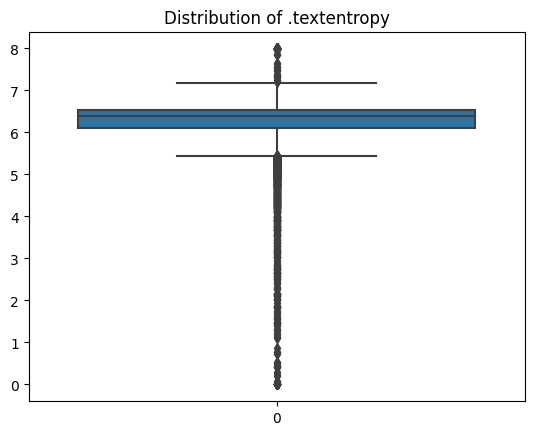

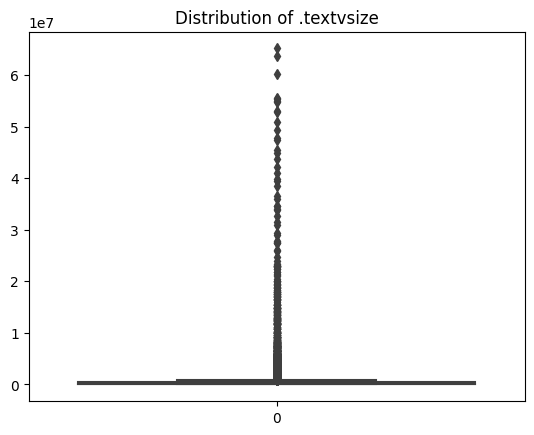

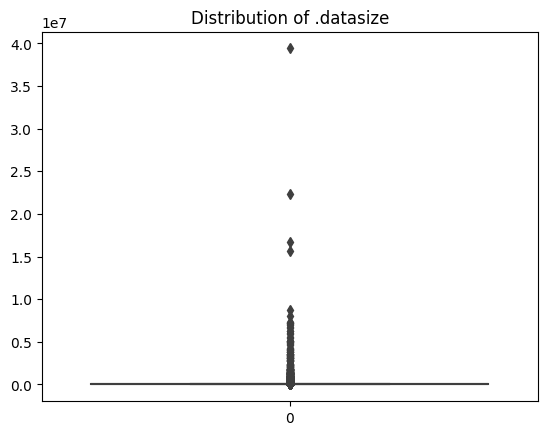

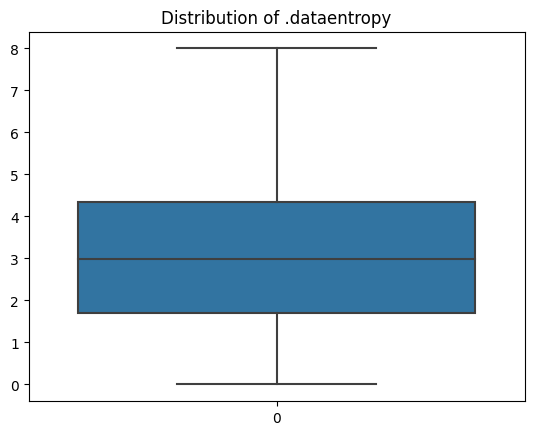

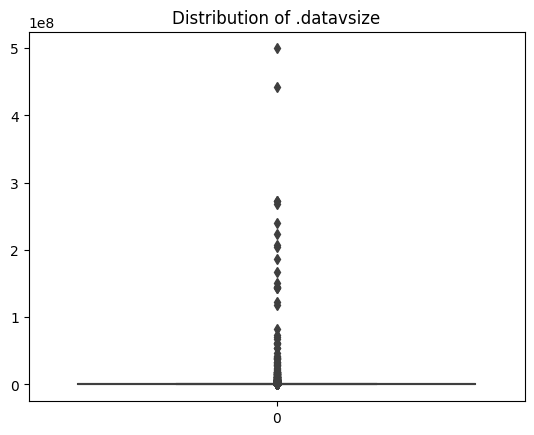

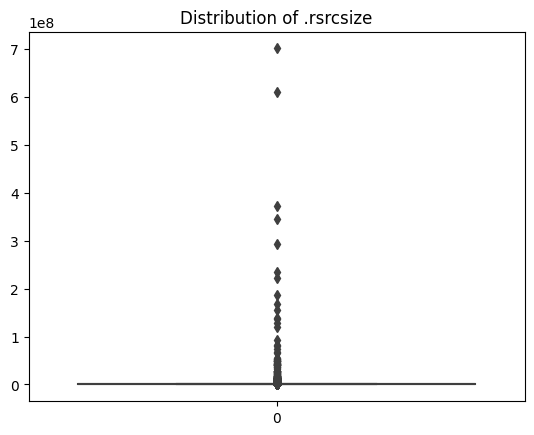

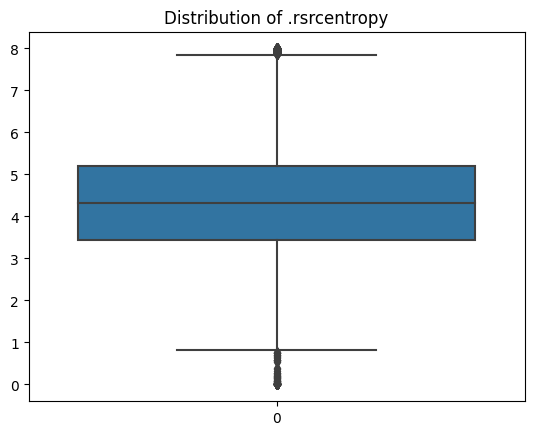

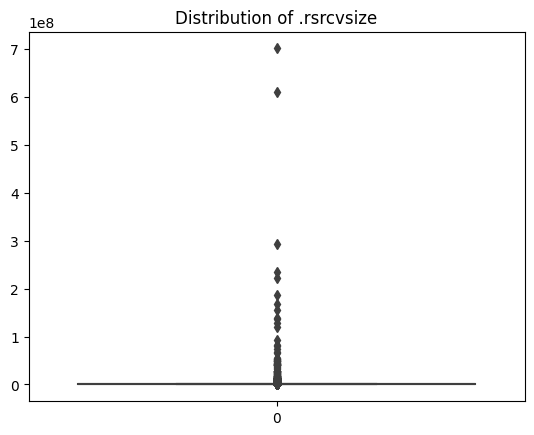

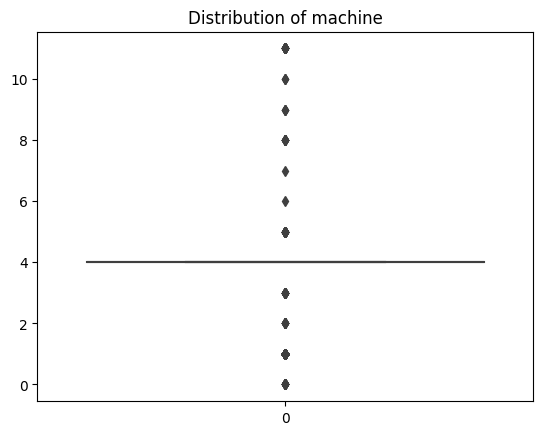

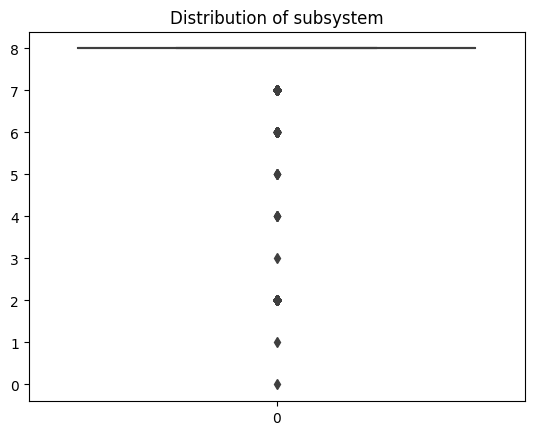

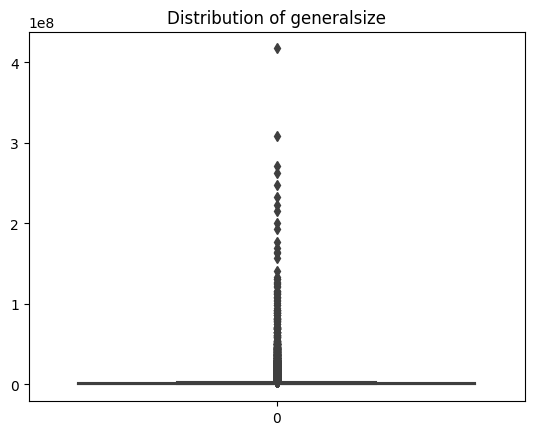

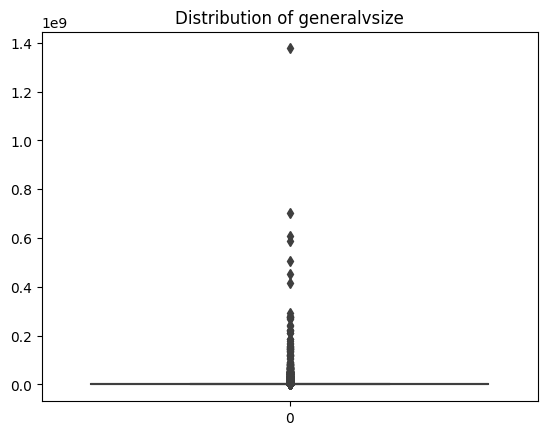

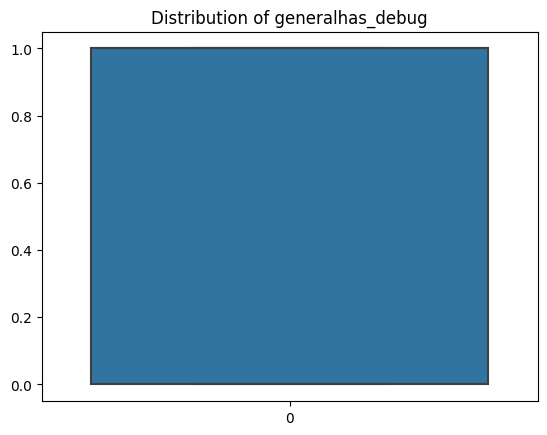

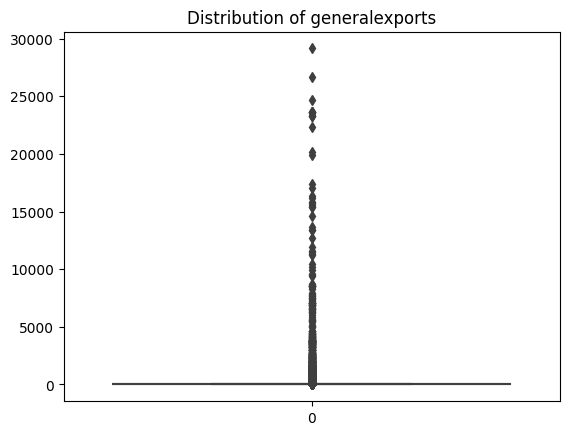

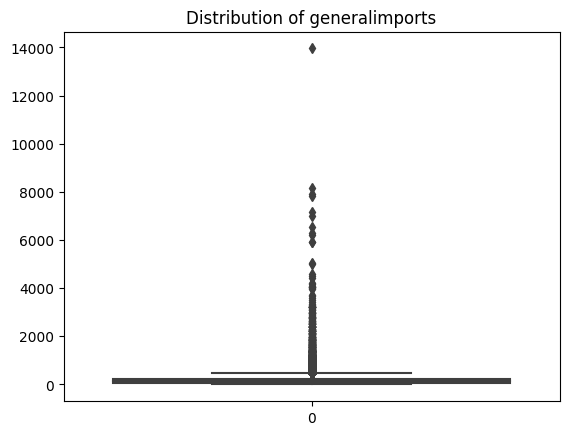

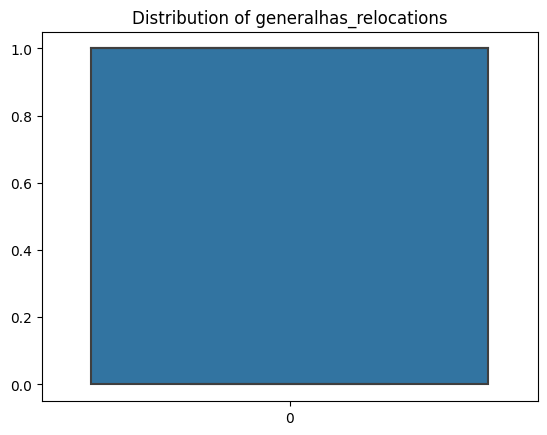

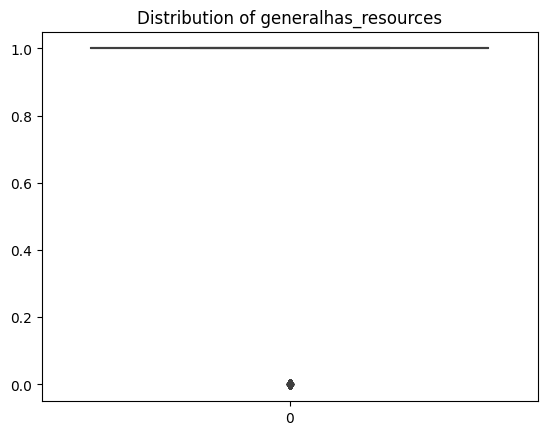

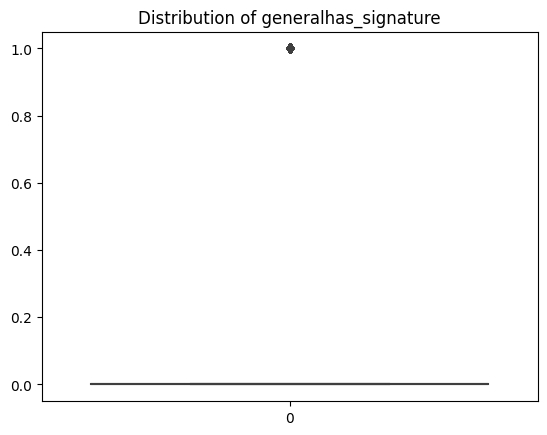

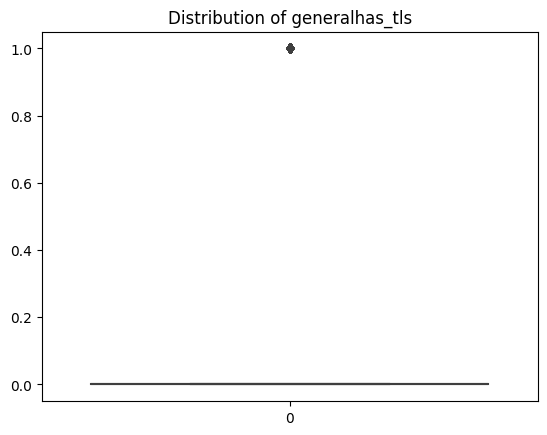

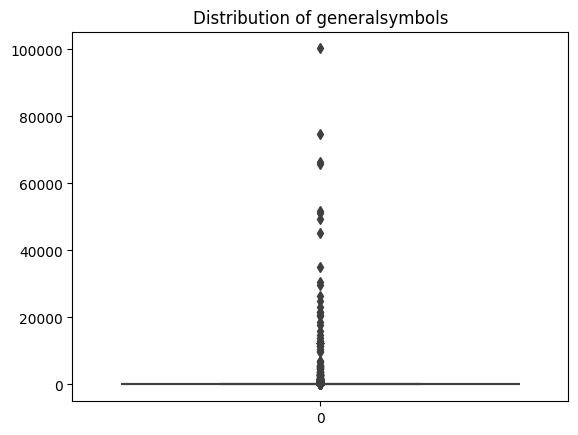

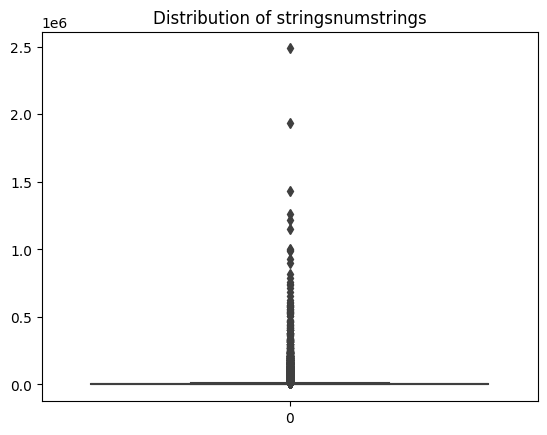

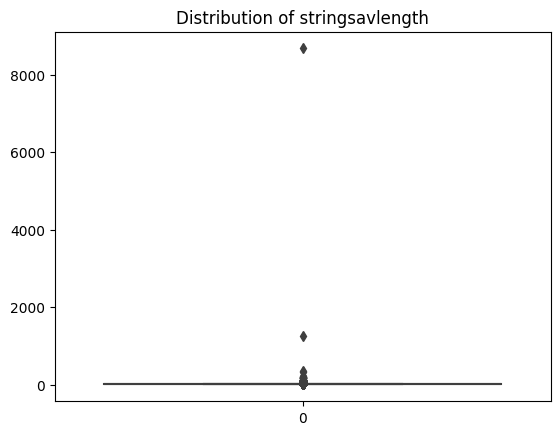

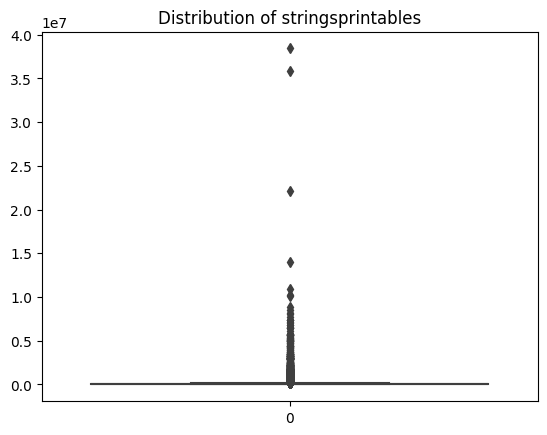

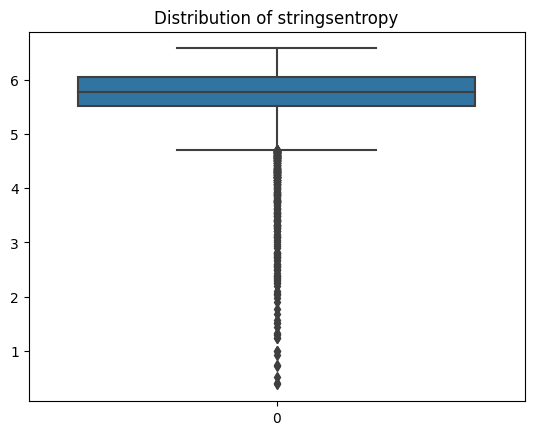

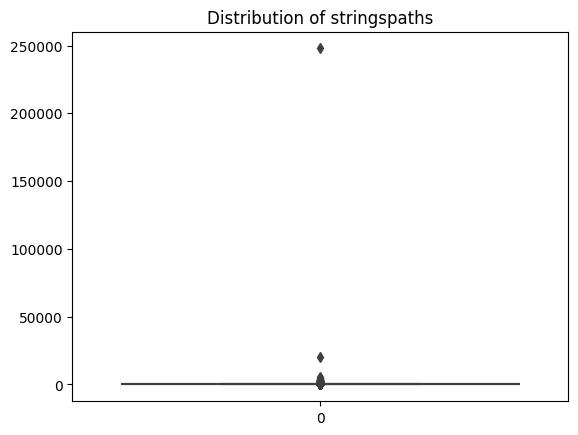

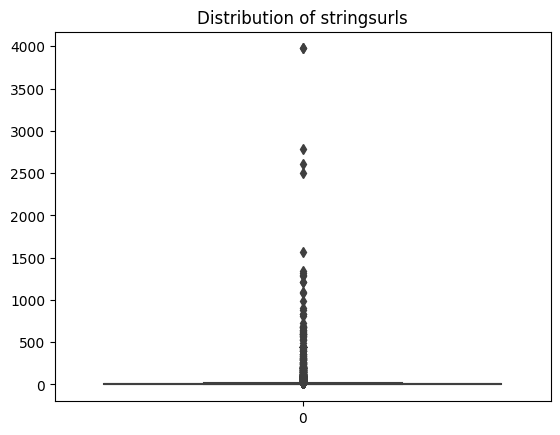

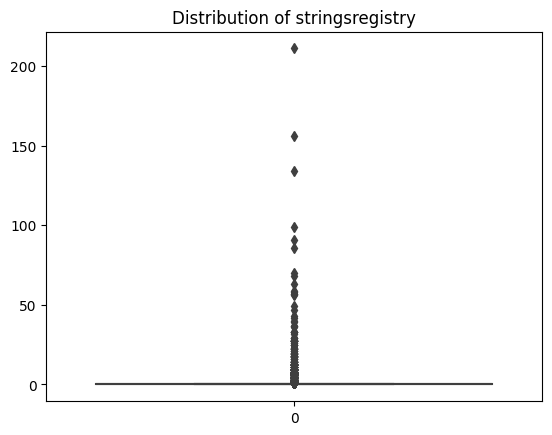

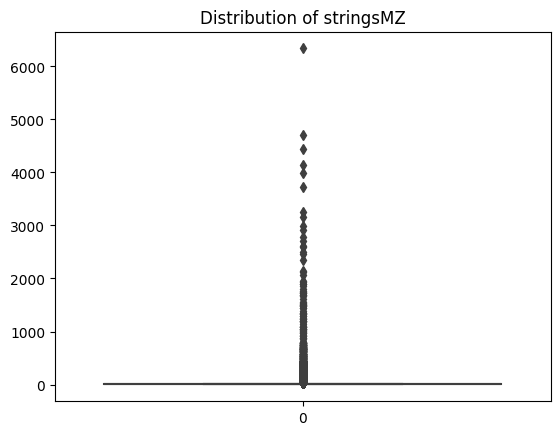

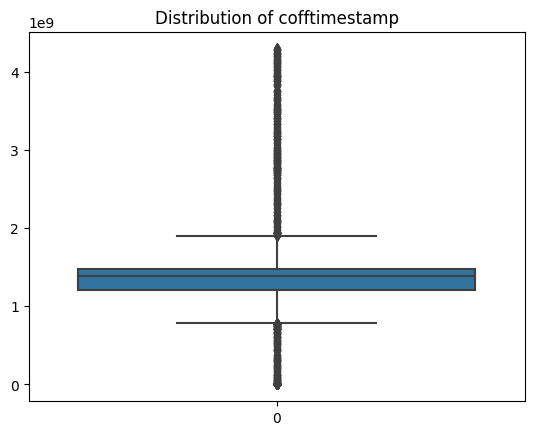

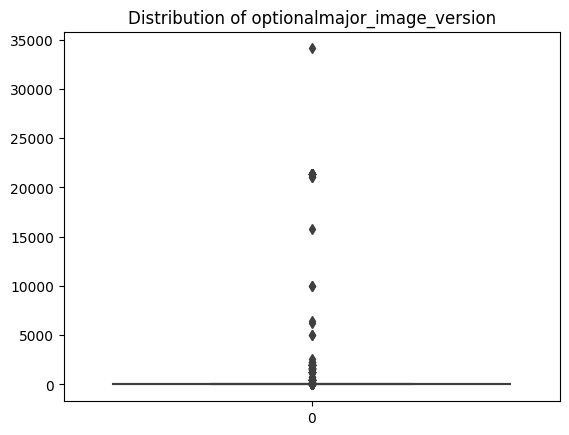

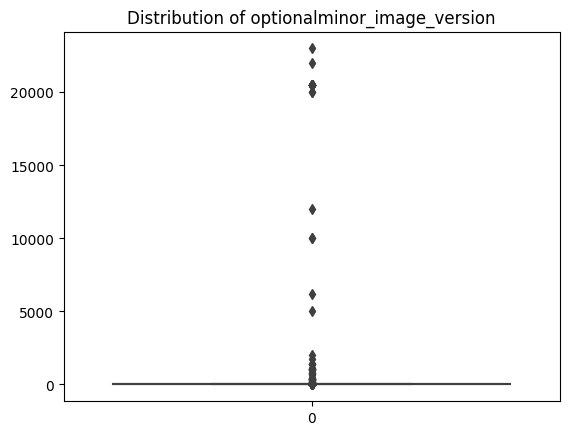

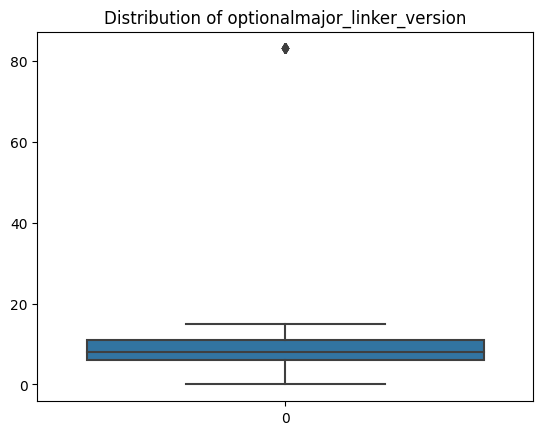

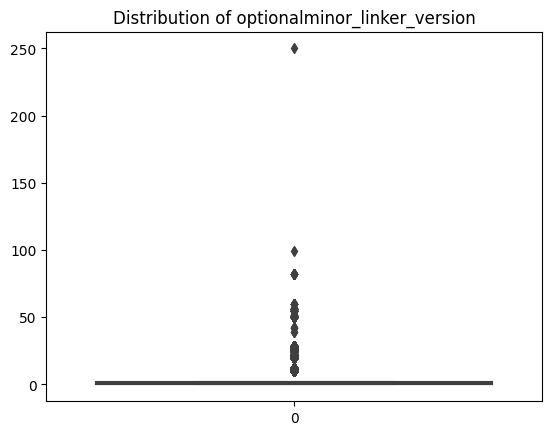

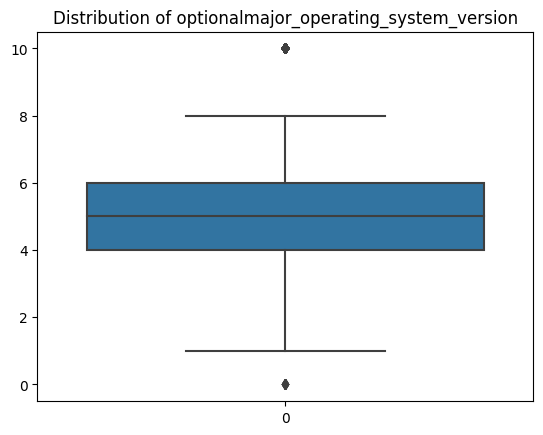

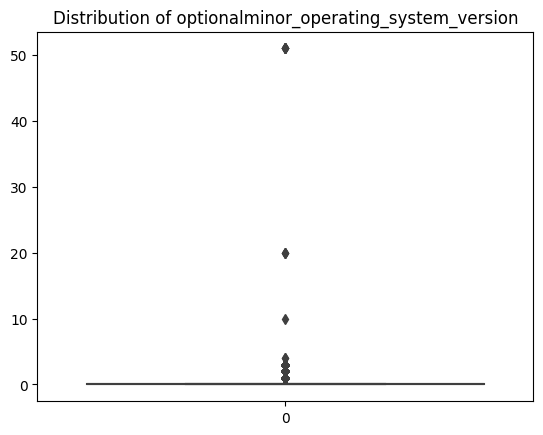

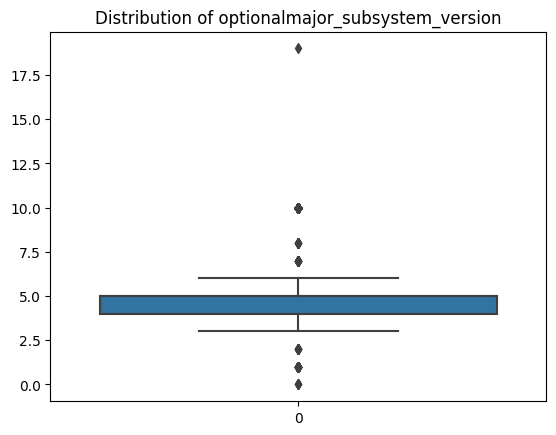

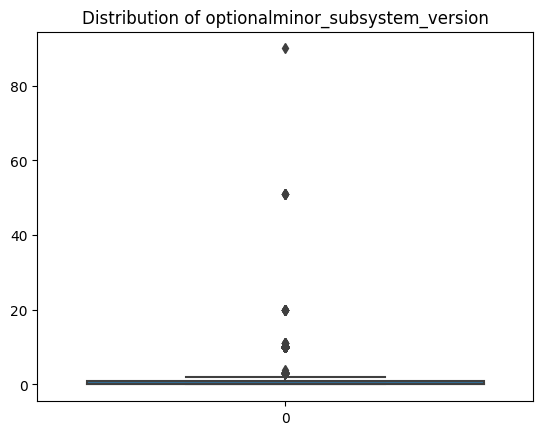

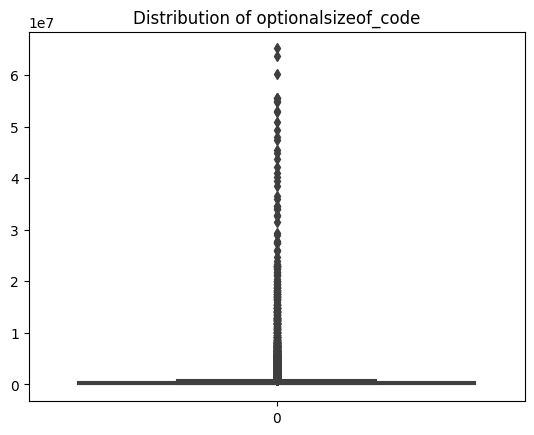

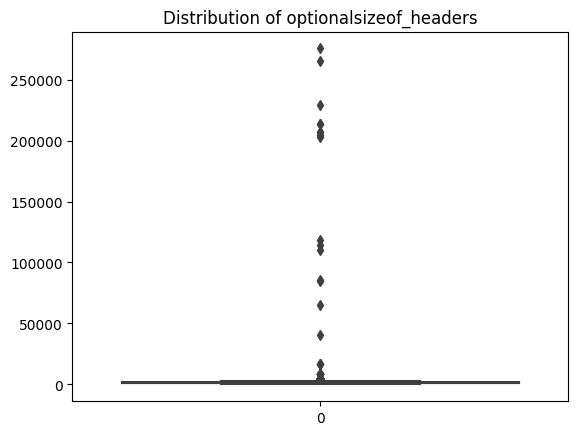

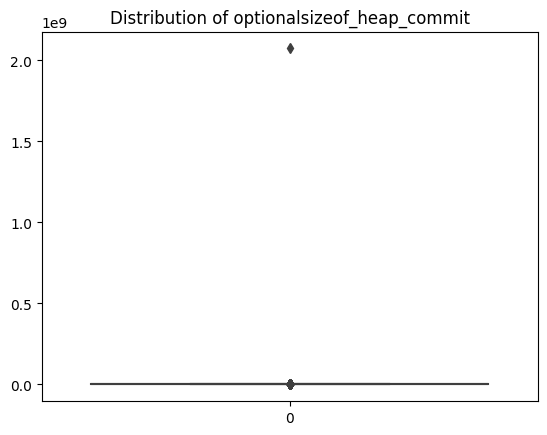

In [20]:


for column in df_training.columns:
    sns.boxplot(df_training[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Training and Testing Data Split

## Load from CSV

In [3]:
#load from csv to df
df_training_standardized = pd.read_csv('../filtered-data/standardized/training.csv')
df_testing_standardized = pd.read_csv('../filtered-data/standardized/testing.csv')


In [4]:
key = 'machine'
pd.set_option('display.max_columns', 5)
print(df_testing_standardized.loc[0:,[column  for column in df_testing_standardized.columns if key in column]].transpose())
pd.reset_option('max_columns')
# print([column  for column in df_testing_standardized.columns if key in column])

                0      1       ... 110277 110278
machine_???      False  False  ...  False  False
machine_AMD64    False  False  ...  False  False
machine_ARM      False  False  ...  False  False
machine_ARMNT    False  False  ...  False  False
machine_I386      True   True  ...   True   True
machine_IA64     False  False  ...  False  False
machine_MIPSFPU      0      0  ...      0      0
machine_POWERPC  False  False  ...  False  False
machine_R4000    False  False  ...  False  False
machine_SH3      False  False  ...  False  False
machine_SH4          0      0  ...      0      0
machine_THUMB    False  False  ...  False  False

[12 rows x 110279 columns]


## With val

In [9]:
def train_test_split_from_dataframe(df_training, df_testing):
    y_train = df_training['label']
    X_train = df_training.drop('label', axis=1)

    y_test = df_testing['label']
    X_test = df_testing.drop('label', axis=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_from_dataframe(df_training_standardized, df_testing_standardized)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_val = X_val.astype(np.float32)



## No val

In [5]:
def train_test_split_from_dataframe(df_training, df_testing):
    y_train = df_training['label']
    X_train = df_training.drop('label', axis=1)

    y_test = df_testing['label']
    X_test = df_testing.drop('label', axis=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_from_dataframe(df_training_standardized, df_testing_standardized)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((308458, 60), (308458,), (110279, 60), (110279,))

In [17]:
X_train['optional_major_image_version'],X_test['/_major_image_version']

(0         -0.036834
 1         34.009747
 2         -0.028848
 3         -0.028848
 4         -0.030445
             ...    
 308453    -0.036834
 308454    -0.028848
 308455    -0.028848
 308456    -0.027250
 308457    -0.028848
 Name: optional_major_image_version, Length: 308458, dtype: float64,
 0        -0.027250
 1        -0.036834
 2        -0.036834
 3        -0.036834
 4        -0.036834
             ...   
 110274   -0.036834
 110275   -0.036834
 110276   -0.036834
 110277   -0.036834
 110278   -0.036834
 Name: /_major_image_version, Length: 110279, dtype: float64)

In [16]:
print("In training diff",X_train.columns.difference(X_test.columns))
print("In testing diff",X_test.columns.difference(X_train.columns))

In training diff Index(['optional_major_image_version'], dtype='object')
In testing diff Index(['/_major_image_version'], dtype='object')


# PCA

In [5]:
pca = PCA()
pca.fit(X_train)
pca_data = pca.transform(X_train)

In [6]:
pca_data.shape

(308458, 60)

## Graphs

### Bar graph

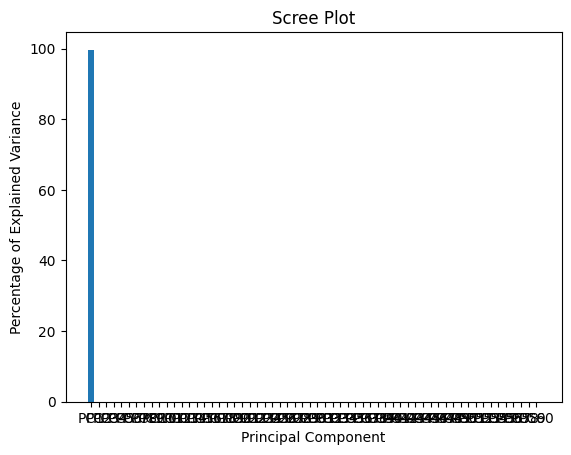

In [7]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 

### PCA graph

In [24]:
pca_data.shape

(60,)

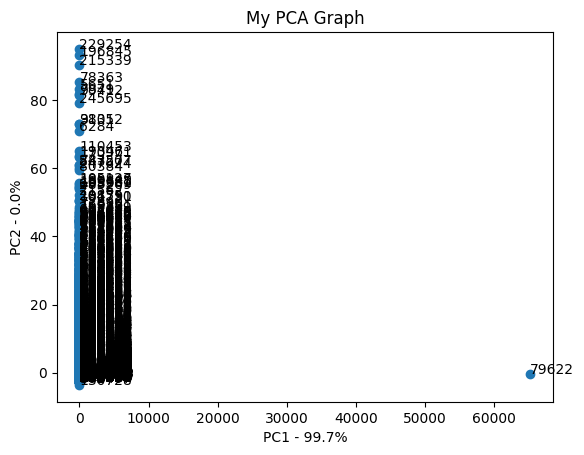

In [8]:
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

### Top 10

In [30]:
loading_scores = pd.Series(pca.components_[0], index=X_train.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_columns = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_columns])

optional_minor_subsystem_version    1.000000
general_has_debug                   0.000032
strings_entropy                     0.000023
optional_major_subsystem_version   -0.000013
optional_minor_linker_version      -0.000010
.text_entropy                      -0.000008
general_imports                    -0.000008
.rsrc_entropy                      -0.000007
optional_sizeof_code                0.000005
general_has_tls                    -0.000004
dtype: float64


# optimal_minor_subsystem_version

In [9]:
# #plot normal distribution of features
# def plot_normal_distribution(df):
#     for column in df.columns:
#         sns.distplot(df[column])
#         plt.show()
        
# plot_normal_distribution(X_train)

# sns.distplot(X_train['optional_minor_subsystem_version'])
# plt.show()

column = 'optional_minor_subsystem_version'
X_train[column].value_counts()

optional_minor_subsystem_version
0        214112
1         78374
2         13724
10         1638
3           545
20           30
51           16
11            8
5             3
4             2
90            1
65280         1
50            1
144           1
257           1
12            1
Name: count, dtype: int64

# Random Forest Classifier  

In [6]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    4.4s finished


RandomForestClassifier(criterion='entropy', n_jobs=50, random_state=42,
                       verbose=1, warm_start=True)

In [7]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy: 0.9356087741093045


## Graphs

In [54]:
# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have defined rf and your data (X_train, y_train)
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf, title, X_train, y_train, cv=5, n_jobs=68)
plt.show()


Exception ignored in: <function _releaseLock at 0x7ff9f4316040>
Traceback (most recent call last):
  File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


# Base Model Class

## Base class

In [4]:

class Model:
  
  def __init__(self):
    self.model = Sequential()
  
  def addInputLayer(self,input_dim):
    self.model.add(Input(shape=(input_dim,)))
  
  def __addLayer(self,perceptrons,activation,dropout,regularizer):
    if regularizer != 0:
      self.model.add(Dense(perceptrons,activation=activation,kernel_regularizer=regularizers.l2(regularizer)))
    else:
      self.model.add(Dense(perceptrons,activation=activation))
    
    if(dropout !=0):
      self.model.add(Dropout(dropout))

  
  def addLayers(self,layers, activation_functions,dropouts=[],regularizers=[]):
    while len(regularizers) < len(layers):
      regularizers.append(0)
    while len(activation_functions) < len(layers):
      activation_functions.append('sigmoid')
    
    while(len(dropouts)< len(layers)):
      dropouts.append(0)
    for (perceptrons,activation,dropout,regularizer) in zip(layers,activation_functions,dropouts,regularizers):
      self.__addLayer(perceptrons,activation,dropout,regularizer)
    
  def compile(self):
    self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], weighted_metrics=[])
    
  def get_model(self):
    self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], weighted_metrics=[])
    return self.model
  
  # def fit(self,X_train=X_train, y_train=y_train, epochs=100, batch_size=2048, validation_data=(X_val, y_val)):
  #   self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data, verbose=1)
    
  # def predict(self,X_test= X_test,y_test = y_test):
  #   y_pred = self.model.predict(X_test)
  #   y_pred_real = [int(round(x[0])) for x in y_pred]
  #   y_pred_real = np.array(y_pred_real)
  #   return y_pred_real
  
  def show(self):   
    print(self.model.summary())
    tf.keras.utils.plot_model(self.model, show_shapes=True,show_layer_names=False)
    

In [34]:

layers = [50,25,12,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = [0.2,0.2,0.2]
regularizers_1 = [0.01,0.01]
model_1 = Model()
model_1.addInputLayer(X_train.shape[1])
model_1.addLayers(layers,activations,dropouts,regularizers_1)
model_1.compile()
model_1.fit()


Epoch 1/100
121/121 [==============================] - 3s 9ms/step - loss: 1.1543 - accuracy: 0.6222 - val_loss: 0.8055 - val_accuracy: 0.7045
Epoch 2/100
121/121 [==============================] - 1s 8ms/step - loss: 0.7082 - accuracy: 0.7243 - val_loss: 0.5894 - val_accuracy: 0.7647
Epoch 3/100
121/121 [==============================] - 1s 8ms/step - loss: 0.5683 - accuracy: 0.7732 - val_loss: 0.5047 - val_accuracy: 0.8074
Epoch 4/100
121/121 [==============================] - 1s 7ms/step - loss: 0.5162 - accuracy: 0.7979 - val_loss: 0.4702 - val_accuracy: 0.8210
Epoch 5/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4928 - accuracy: 0.8089 - val_loss: 0.4493 - val_accuracy: 0.8309
Epoch 6/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4774 - accuracy: 0.8166 - val_loss: 0.4350 - val_accuracy: 0.8381
Epoch 7/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4661 - accuracy: 0.8220 - val_loss: 0.4246 - val_accuracy: 0.8410

KeyboardInterrupt: 

In [69]:
y_pred = model_1.model.predict(X_test)

y_pred_real = [int(round(x[0])) for x in y_pred]
y_pred_real = np.array(y_pred_real)

accuracy_score(y_test, y_pred_real)

3447/3447 [==============================] - 5s 1ms/step


0.8434788128292785

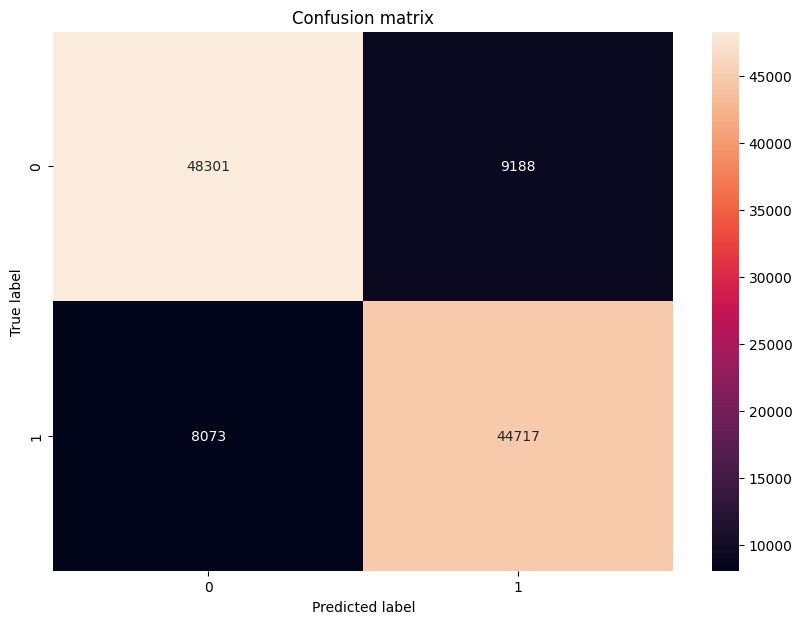

In [70]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_real, labels=[0, 1], title='Confusion matrix')

In [8]:
#get training loss
def plot_loss_curves(history):
  train_loss = history.history['loss']
  #get validation loss
  val_loss = history.history['val_loss']
  #plot graph

  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend()
  plt.show()


# K Fold

## fit

In [36]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
models = []

layers = [100,100,100,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = [0.2,0.2,0.2]
regularizers_1 = [0.01,0.01]
for i in range(10):
    model_1 = Model()
    model_1.addInputLayer(X_train.shape[1])
    model_1.addLayers(layers,activations,dropouts,regularizers_1)
    model_1.compile()
    models.append(model_1)
i = 0
for train_index, val_index in skf.split(X_train, y_train):
    
    x_train_fold, x_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    models[i].fit(x_train_fold,y_train_fold,validation_data=(x_val_fold,y_val_fold))
    i+=1

  

Epoch 1/100
109/109 [==============================] - 2s 9ms/step - loss: 1.4239 - accuracy: 0.6821 - val_loss: 0.7766 - val_accuracy: 0.7590
Epoch 2/100
109/109 [==============================] - 1s 8ms/step - loss: 0.6529 - accuracy: 0.7896 - val_loss: 0.4828 - val_accuracy: 0.8207
Epoch 3/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4636 - accuracy: 0.8281 - val_loss: 0.4110 - val_accuracy: 0.8501
Epoch 4/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4369 - accuracy: 0.8423 - val_loss: 0.4033 - val_accuracy: 0.8549
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4123 - accuracy: 0.8483 - val_loss: 0.3753 - val_accuracy: 0.8676
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4036 - accuracy: 0.8530 - val_loss: 0.3678 - val_accuracy: 0.8712
Epoch 7/100
109/109 [==============================] - 1s 7ms/step - loss: 0.3871 - accuracy: 0.8580 - val_loss: 0.3616 - val_accuracy: 0.8713

In [45]:
list1 = [2, 2, 2, 3, 4]
list2 = [2, 2, 3, 4, 4]
list3 = [1, 2, 3, 4, 4]
list4 = [2, 2, 3, 4, 4]

# Create a NumPy array from the lists
lists_array = np.array([list1, list2, list3,list4])

# Use NumPy to find the mode (most frequent element) for each index
max_freq_elements = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=lists_array)

# max_freq_elements now contains the element with the maximum frequency for each index
print(max_freq_elements)

[2 2 3 4 4]


## Graph

3447/3447 [==============================] - 4s 1ms/step
0.8649062831545444


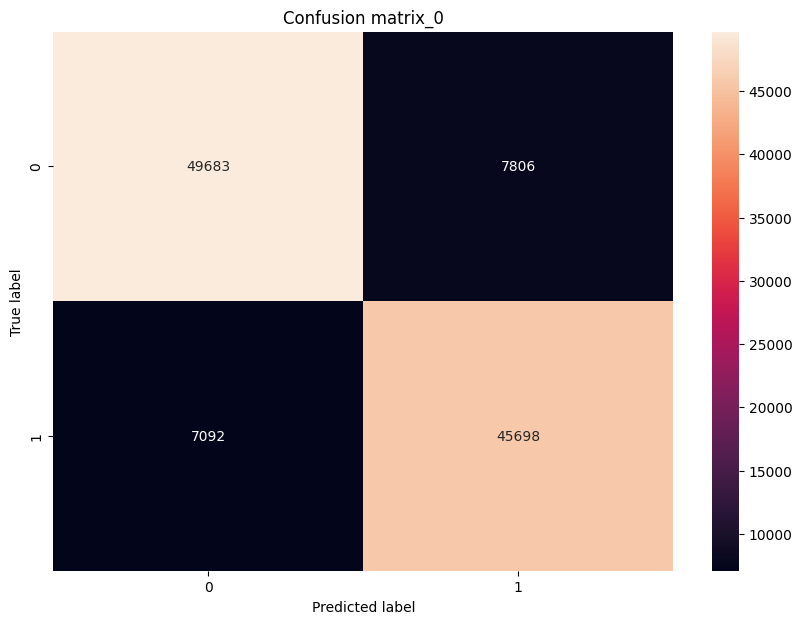

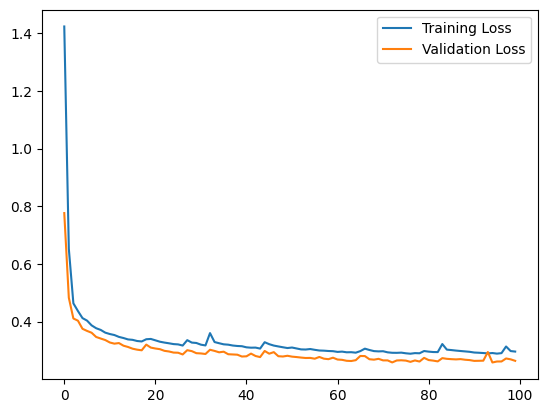

3447/3447 [==============================] - 4s 1ms/step
0.8543240326807461


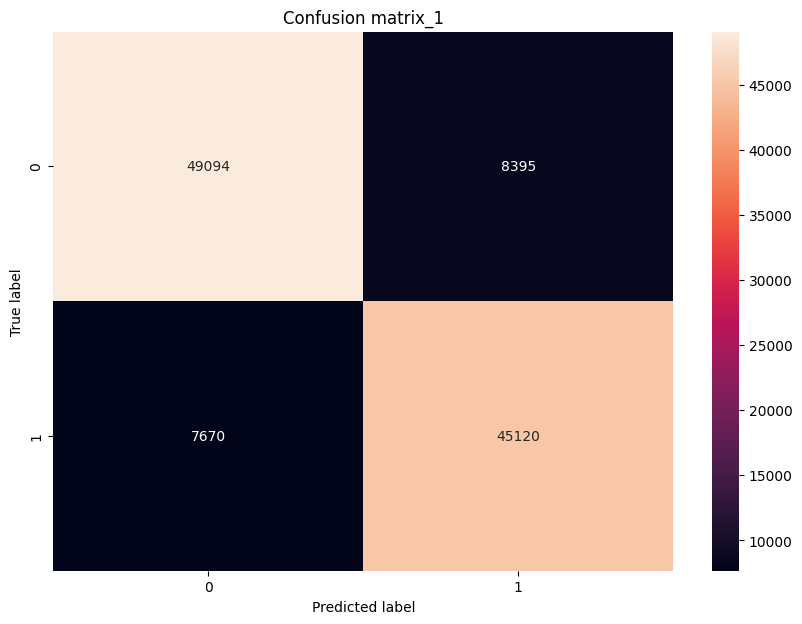

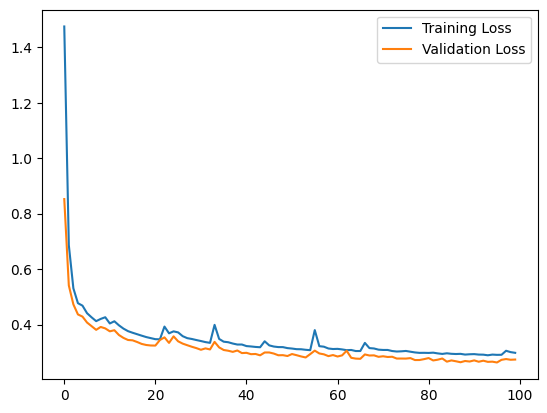

3447/3447 [==============================] - 5s 1ms/step
0.8511956038774381


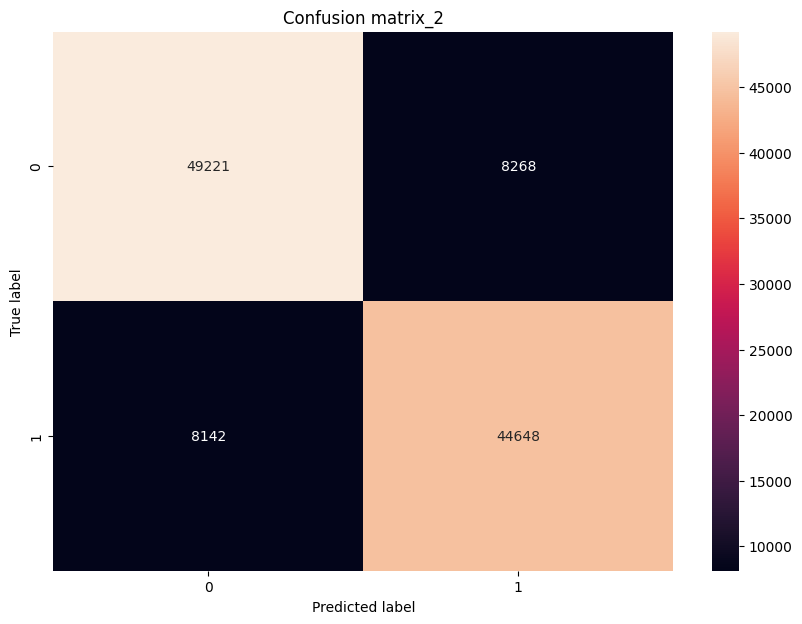

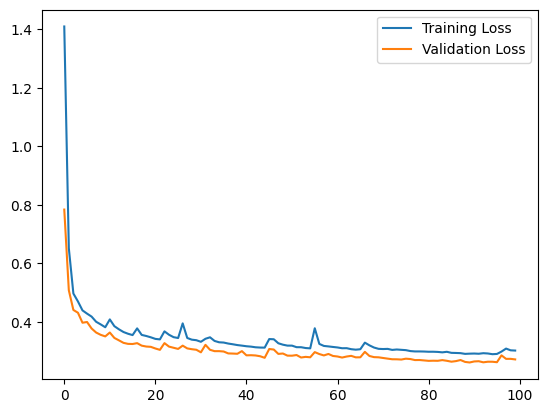

3447/3447 [==============================] - 5s 1ms/step
0.8559562564042111


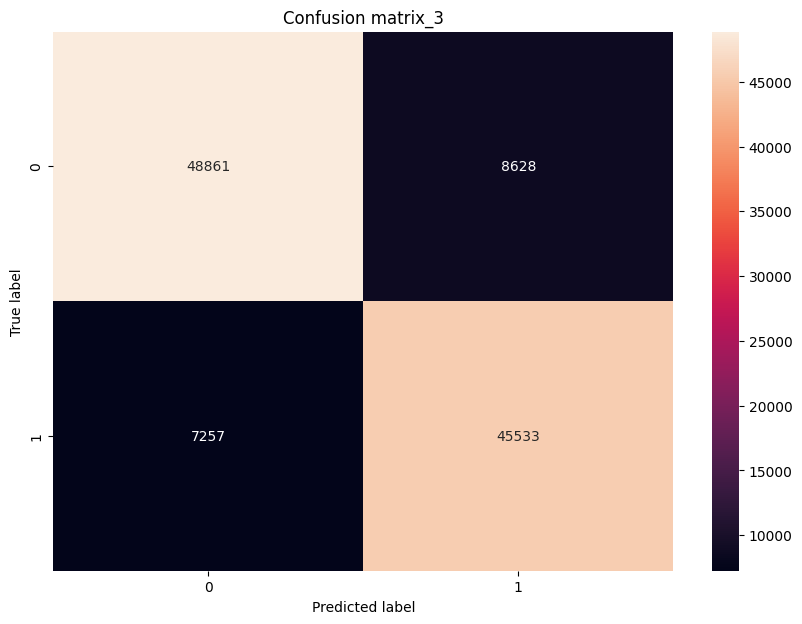

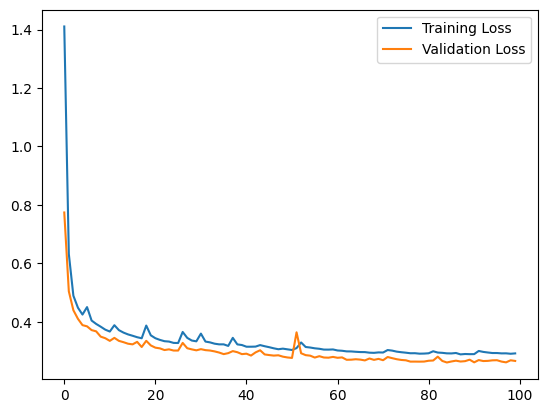

3447/3447 [==============================] - 4s 1ms/step
0.8415926876377189


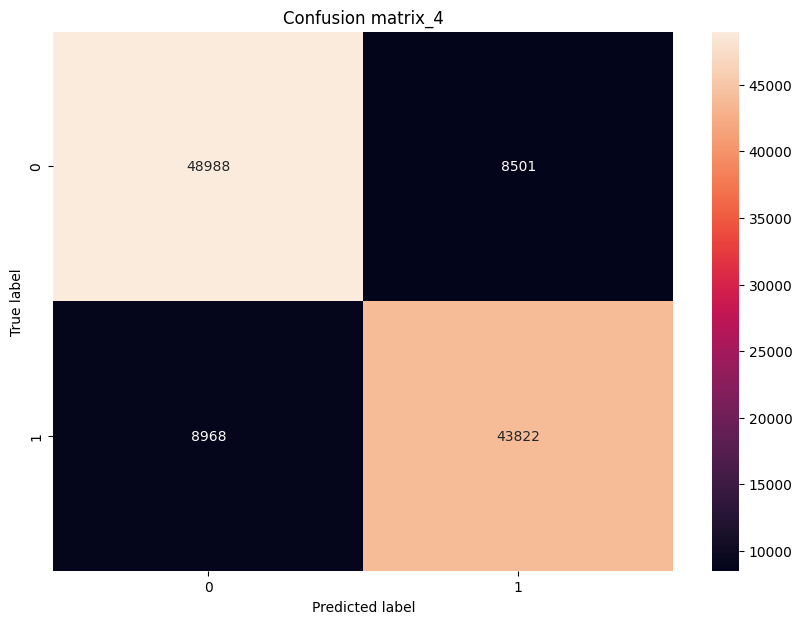

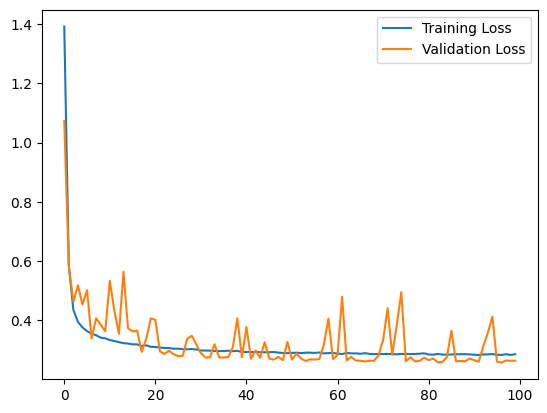

3447/3447 [==============================] - 4s 1ms/step
0.856192022053156


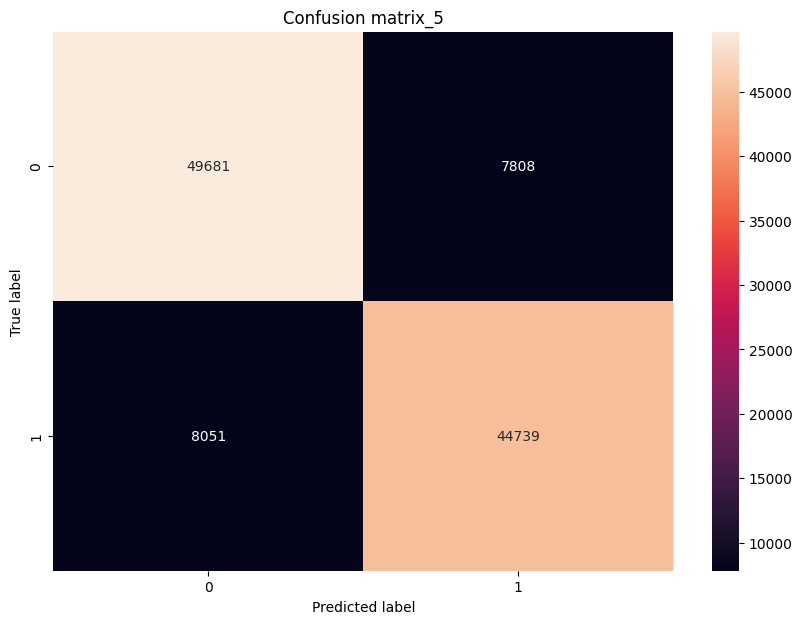

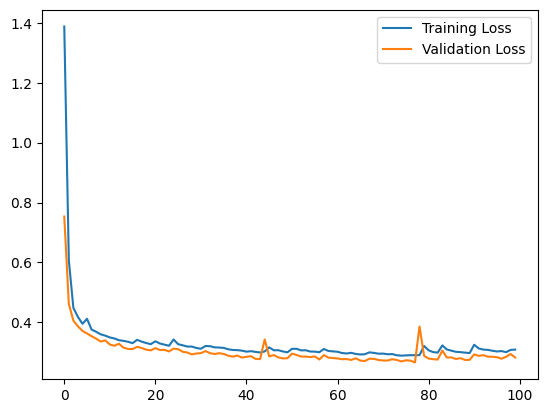

3447/3447 [==============================] - 4s 1ms/step
0.8597285067873304


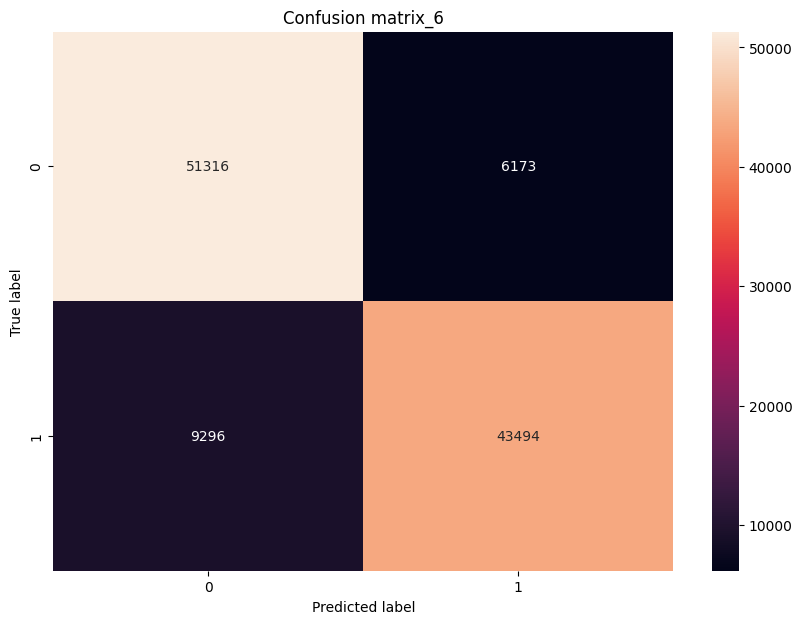

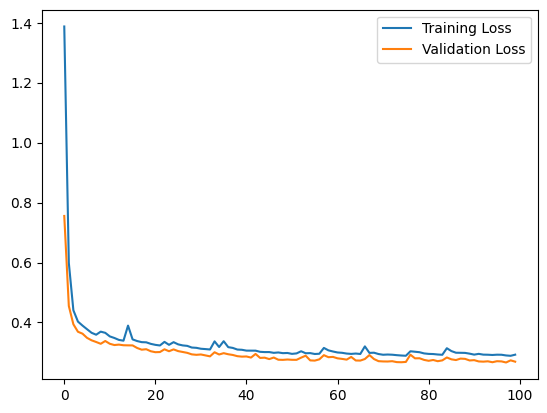

3447/3447 [==============================] - 4s 1ms/step
0.863428213893851


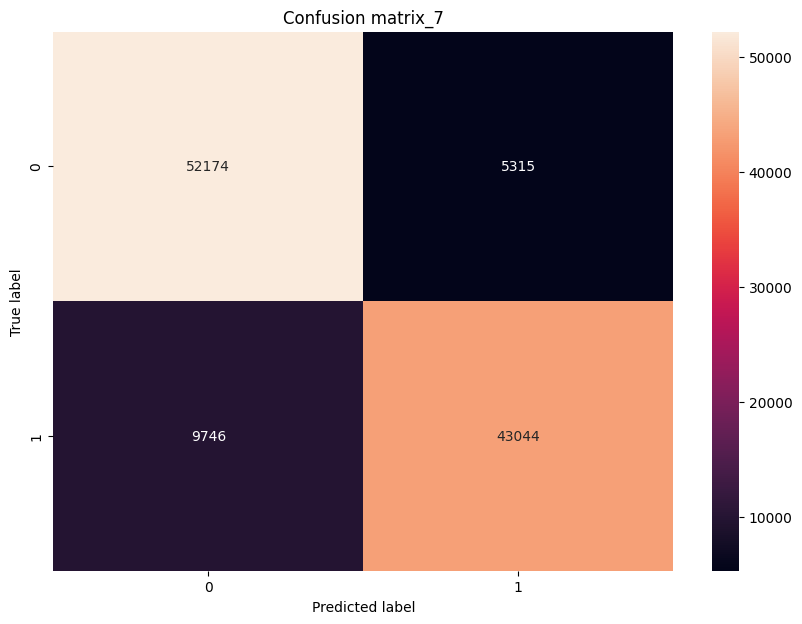

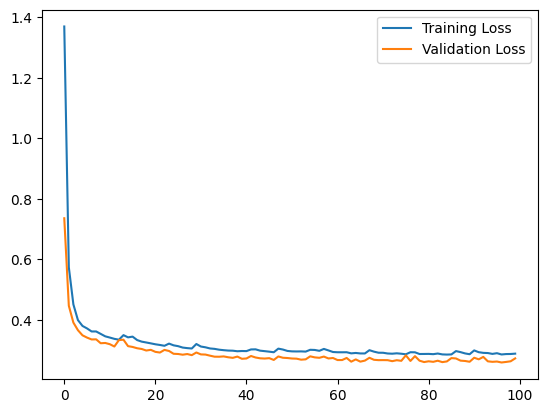

3447/3447 [==============================] - 4s 1ms/step
0.85157645607958


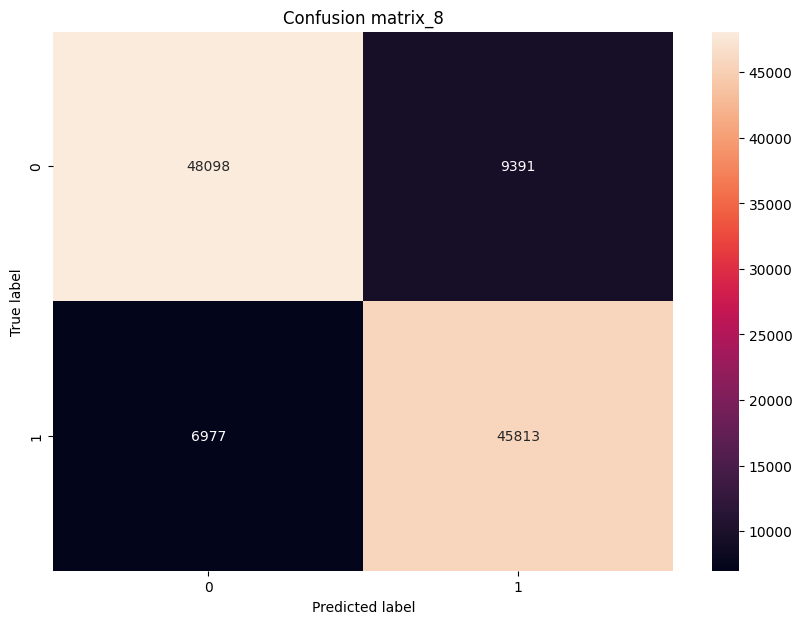

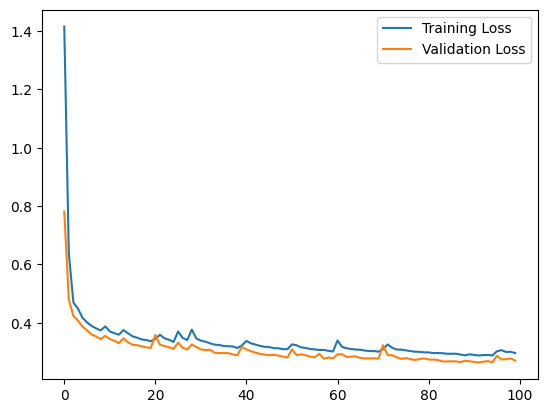

3447/3447 [==============================] - 5s 1ms/step
0.8582141658883378


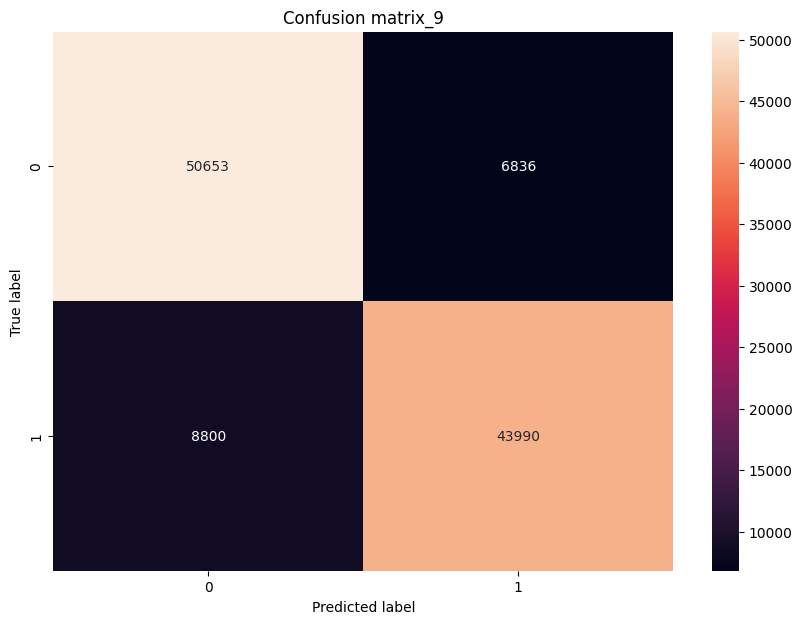

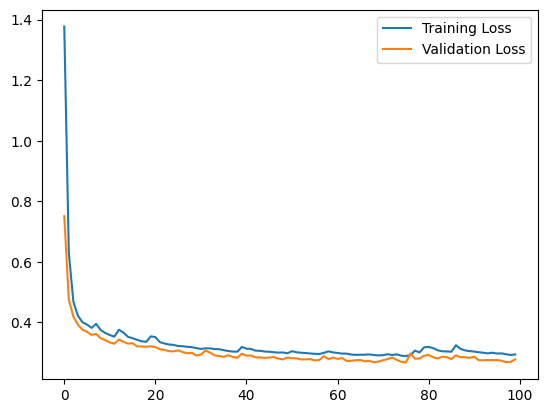

0.8662574016811905


In [47]:
y_pred_list =[]
for i,model in enumerate(models):
  y_pred_list.append(model.predict(X_test,y_test))
  print(accuracy_score(y_test,y_pred_list[-1]))
  plot_confusion_matrix(y_test, y_pred_list[-1], labels=[0, 1], title='Confusion matrix_' +str(i))
  plot_loss_curves(model.history)

y_pred_final = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_pred_list)

print(accuracy_score(y_test,y_pred_final))

  

0.8662574016811905


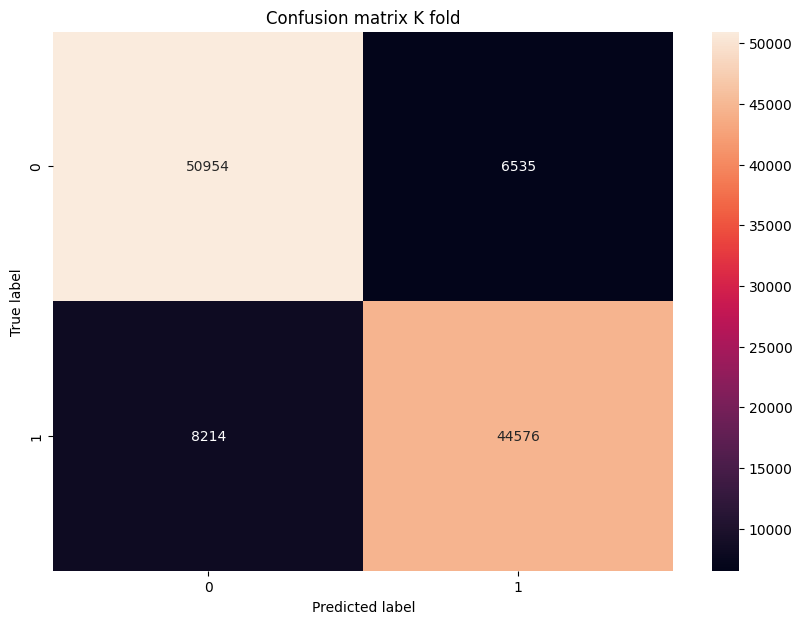

In [58]:
print(accuracy_score(y_test,y_pred_final))
plot_confusion_matrix(y_test, y_pred_final, labels=[0, 1], title='Confusion matrix K fold')


In [62]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     57489
           1       0.87      0.84      0.86     52790

    accuracy                           0.87    110279
   macro avg       0.87      0.87      0.87    110279
weighted avg       0.87      0.87      0.87    110279



# MODEL2 - Bagging

## Model

In [35]:
layers = [64,8,4,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = []
regularizers_1 = [0.01,0.01,0.01]
max_features = math.ceil(math.sqrt(X_train.shape[1]))+10


def get_model():
  model = Model()
  model.addInputLayer(max_features)
  model.addLayers(layers,activations,dropouts,regularizers_1)
  model.show()
  return model.get_model()

model= KerasClassifier(model=get_model, epochs=100, batch_size=512,random_state=42,verbose=1,validation_split=0.2)

bagg = BaggingClassifier(estimator=model,n_estimators=50,max_features = max_features,verbose =1,random_state=42,max_samples=4096,n_jobs=-1)

## fit

In [36]:
bagg.fit(X_train,y_train)

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                1216      
                                                                 
 dense_11 (Dense)            (None, 8)                 520       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1777 (6.94 KB)
Trainable params: 1777 (6.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param 

2023-10-10 16:56:33.763158: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.787272: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.835159: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.875137: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.883276: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.916973: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


7/7 [==============================] - 1s 50ms/step - loss: 1.1487 - accuracy: 0.5115 - val_loss: 1.1275 - val_accuracy: 0.4233
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 1.1153 - accuracy: 0.5176Epoch 5/100
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 1.0744 - accuracy: 0.5568 - val_loss: 1.0637 - val_accuracy: 0.5221
Epoch 4/100
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0839 - accuracy: 0.5559 - val_loss: 1.0660 - val_accuracy: 0.6047
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 1.0568 - accuracy: 0.5392 - val_loss: 1.0502 - val_accuracy: 0.3860
Epoch 4/100
7/7 [==============================] - 1s 52ms/step - loss: 1.2613 - accuracy: 0.5306 - val_loss: 1.2894 - val_accuracy: 0.4379
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0446 - accuracy: 0.6189 - val_loss: 1.0362 - val_accuracy: 0.4705
Epoch 6/100
7/7 [==============================] - 0s 10

2023-10-10 16:56:33.980567: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.987185: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.995136: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:33.995155: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.031271: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.051121: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.055160: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.099187: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 2s 54ms/step - loss: 1.1727 - accuracy: 0.4682 - val_loss: 1.1374 - val_accuracy: 0.5791
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 1.0461 - accuracy: 0.5819 - val_loss: 1.0611 - val_accuracy: 0.6855
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0435 - accuracy: 0.5641 - val_loss: 1.0332 - val_accuracy: 0.4324
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0154 - accuracy: 0.6016 - val_loss: 1.0121 - val_accuracy: 0.6000
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.9578 - accuracy: 0.5977Epoch 6/100
Epoch 7/100
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 1.1282 - accuracy: 0.5039Epoch 10/100
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 1.1562 - accuracy: 0.5605 - val_loss: 1.1496 - val_accuracy: 0.4816
Epoch 3/100
7/7 [==============================] - 2s 57ms/step - loss: 1.2373 - accuracy: 

2023-10-10 16:56:34.202417: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.211123: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.259700: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.267152: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.271125: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.302286: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.355319: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.373598: W tensorflow/core/data/root_dataset.cc:28

Epoch 3/100
Epoch 5/100
Epoch 10/100
Epoch 10/100
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 1.1140 - accuracy: 0.5469Epoch 6/100
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.9277 - accuracy: 0.5401 - val_loss: 0.9433 - val_accuracy: 0.4056
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 1.0942 - accuracy: 0.5653 - val_loss: 1.0656 - val_accuracy: 0.6400
Epoch 2/100
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 1.0524 - accuracy: 0.6158 - val_loss: 1.0523 - val_accuracy: 0.5791
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.9034 - accuracy: 0.6227 - val_loss: 0.9081 - val_accuracy: 0.5867
Epoch 12/100
7/7 [==============================] - 0s 15ms/step - loss: 1.1385 - accuracy: 0.5486 - val_loss: 1.1400 - val_accuracy: 0.4656
Epoch 12/100
Epoch 3/100
7/7 [==============================] - 2s 60ms/step - loss: 1.1809 - accuracy: 0.4787 - val_loss: 1.1553 - v

2023-10-10 16:56:34.435246: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.483129: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.539865: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.551138: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.551333: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.555116: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.586024: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


7/7 [==============================] - 0s 14ms/step - loss: 1.0543 - accuracy: 0.6626 - val_loss: 1.0351 - val_accuracy: 0.5914
Epoch 14/100
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 1.0742 - accuracy: 0.5461 - val_loss: 1.0867 - val_accuracy: 0.4730
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 1.0215 - accuracy: 0.5944 - val_loss: 1.0166 - val_accuracy: 0.4479
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 1.0391 - accuracy: 0.6092 - val_loss: 1.0135 - val_accuracy: 0.6265
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 1.0243 - accuracy: 0.6328 - val_loss: 1.0047 - val_accuracy: 0.6822
Epoch 7/100
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.9829 - accuracy: 0.5935 - val_loss: 0.9976 - val_accuracy: 0.4914
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 1.1207 - accuracy: 0.5071 - val_loss: 1.1066 - val_accuracy: 0.6158
Epoch 8

2023-10-10 16:56:34.679132: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.685493: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.696100: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.707130: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.711192: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.759145: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.785429: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.815126: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.9916 - accuracy: 0.5773 - val_loss: 0.9817 - val_accuracy: 0.5098
Epoch 16/100
7/7 [==============================] - 0s 13ms/step - loss: 1.0007 - accuracy: 0.6304 - val_loss: 0.9937 - val_accuracy: 0.5319
Epoch 16/100
Epoch 9/100
7/7 [==============================] - 0s 16ms/step - loss: 1.0174 - accuracy: 0.6132 - val_loss: 1.0215 - val_accuracy: 0.4736
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 0.8075 - accuracy: 0.6914Epoch 14/100
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 1.0186 - accuracy: 0.5572 - val_loss: 1.0439 - val_accuracy: 0.4644
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.8898 - accuracy: 0.6947 - val_loss: 0.9165 - val_accuracy: 0.6781
Epoch 7/100
Epoch 13/100
7/7 [==============================] - 0s 13ms/step - loss: 0.8326 - accuracy: 0.5738 - val_loss: 0.8660 - val_accuracy: 0.5600
Epoch 9/100
Epoch 8/100
7/7 [===========

2023-10-10 16:56:34.895380: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.899193: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.943141: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.971348: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.979111: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.987115: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.989513: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:34.991253: W tensorflow/core/data/root_dataset.cc:28

Epoch 12/100
Epoch 11/100
Epoch 17/100
7/7 [==============================] - 0s 13ms/step - loss: 0.9298 - accuracy: 0.6384 - val_loss: 0.9044 - val_accuracy: 0.7383
Epoch 15/100
1/7 [===>..........................] - ETA: 0s - loss: 0.9190 - accuracy: 0.6934Epoch 10/100
Epoch 17/100
1/7 [===>..........................] - ETA: 0s - loss: 0.9189 - accuracy: 0.6484Epoch 11/100
Epoch 11/100
7/7 [==============================] - 0s 14ms/step - loss: 0.9691 - accuracy: 0.6119 - val_loss: 1.0070 - val_accuracy: 0.5627
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.9321 - accuracy: 0.6239 - val_loss: 0.9100 - val_accuracy: 0.6371
Epoch 11/100
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.9268 - accuracy: 0.6485 - val_loss: 0.9193 - val_accuracy: 0.6511
Epoch 11/100
7/7 [==============================] - 0s 15ms/step - loss: 0.9074 - accuracy: 0.6782 - val_loss: 0.9154 - val_accuracy: 0.6110
Epoch 7/100
Epoch 10/100
7/7 [================

2023-10-10 16:56:35.097116: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.155126: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.163483: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.170763: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.196403: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.253510: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.255127: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.285833: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 15ms/step - loss: 0.9422 - accuracy: 0.6411 - val_loss: 0.9497 - val_accuracy: 0.5990
Epoch 12/100
1/7 [===>..........................] - ETA: 0s - loss: 0.8821 - accuracy: 0.6582Epoch 12/100
Epoch 10/100
Epoch 11/100
7/7 [==============================] - 0s 15ms/step - loss: 0.8945 - accuracy: 0.5983 - val_loss: 0.9128 - val_accuracy: 0.5855
Epoch 14/100
7/7 [==============================] - 0s 12ms/step - loss: 0.8139 - accuracy: 0.6441 - val_loss: 0.8114 - val_accuracy: 0.6638
Epoch 16/100
1/7 [===>..........................] - ETA: 0s - loss: 0.8924 - accuracy: 0.7051Epoch 19/100
Epoch 14/100
Epoch 15/100
7/7 [==============================] - 0s 15ms/step - loss: 0.9659 - accuracy: 0.6195 - val_loss: 0.9700 - val_accuracy: 0.5345
Epoch 9/100
7/7 [==============================] - 0s 17ms/step - loss: 0.7581 - accuracy: 0.6714 - val_loss: 0.8196 - val_accuracy: 0.6118
Epoch 20/100
7/7 [==============================] - 0s 14ms/step - loss

2023-10-10 16:56:35.300119: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.335138: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.345534: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.352574: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.357637: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.359247: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.371126: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.451297: W tensorflow/core/data/root_dataset.cc:28

1/7 [===>..........................] - ETA: 0s - loss: 0.9194 - accuracy: 0.6016Epoch 17/100
Epoch 16/100
7/7 [==============================] - 0s 16ms/step - loss: 0.9104 - accuracy: 0.6525 - val_loss: 0.9171 - val_accuracy: 0.6310
Epoch 14/100
7/7 [==============================] - 0s 14ms/step - loss: 0.9225 - accuracy: 0.5432 - val_loss: 0.9500 - val_accuracy: 0.4251
Epoch 23/100
Epoch 11/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7623 - accuracy: 0.6602 - val_loss: 0.8013 - val_accuracy: 0.6224
Epoch 16/100
Epoch 23/100
7/7 [==============================] - 0s 13ms/step - loss: 0.8712 - accuracy: 0.6972 - val_loss: 0.8671 - val_accuracy: 0.5988
Epoch 15/100
Epoch 18/100
Epoch 16/100
Epoch 22/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7476 - accuracy: 0.6694 - val_loss: 0.7958 - val_accuracy: 0.6176
Epoch 15/100
7/7 [==============================] - 0s 14ms/step - loss: 0.9180 - accuracy: 0.6678 - val_loss: 0.9393 - val_accuracy: 0.6

2023-10-10 16:56:35.535159: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.543147: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.567162: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.591288: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.591489: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.599368: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.600112: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.607395: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.8469 - accuracy: 0.6848 - val_loss: 0.8484 - val_accuracy: 0.6572
Epoch 15/100
7/7 [==============================] - 0s 14ms/step - loss: 0.8504 - accuracy: 0.5726 - val_loss: 0.8581 - val_accuracy: 0.5337
Epoch 19/100
7/7 [==============================] - 0s 14ms/step - loss: 0.8558 - accuracy: 0.7124 - val_loss: 0.8579 - val_accuracy: 0.5934
Epoch 21/100
7/7 [==============================] - 0s 15ms/step - loss: 0.7972 - accuracy: 0.6916 - val_loss: 0.8685 - val_accuracy: 0.5799
Epoch 17/100
Epoch 16/100
Epoch 18/100
7/7 [==============================] - 0s 14ms/step - loss: 0.8415 - accuracy: 0.6415 - val_loss: 0.8406 - val_accuracy: 0.5614
Epoch 19/100
Epoch 28/100
Epoch 17/100
Epoch 21/100
7/7 [==============================] - 0s 15ms/step - loss: 0.8028 - accuracy: 0.6902 - val_loss: 0.8321 - val_accuracy: 0.6204
Epoch 20/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7914 - accuracy: 0.6451 - v

2023-10-10 16:56:35.755237: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.759116: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.811282: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.825368: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.828279: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.835389: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.845987: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.860758: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.7703 - accuracy: 0.6516 - val_loss: 0.7594 - val_accuracy: 0.7236
Epoch 18/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7798 - accuracy: 0.6640 - val_loss: 0.8003 - val_accuracy: 0.6371
Epoch 19/100
Epoch 21/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7684 - accuracy: 0.6659 - val_loss: 0.8131 - val_accuracy: 0.6064
Epoch 22/100
7/7 [==============================] - 0s 12ms/step - loss: 0.8100 - accuracy: 0.6477 - val_loss: 0.8269 - val_accuracy: 0.6273
Epoch 19/100
7/7 [==============================] - 0s 15ms/step - loss: 0.7933 - accuracy: 0.6606 - val_loss: 0.7955 - val_accuracy: 0.6025
Epoch 18/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7412 - accuracy: 0.6628 - val_loss: 0.7751 - val_accuracy: 0.5012
Epoch 22/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7875 - accuracy: 0.6602Epoch 23/100
Epoch 29/100
1/7 [===>..........................

2023-10-10 16:56:35.983136: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:35.991142: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.011147: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.015112: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.053808: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.075151: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.079147: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.079200: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.6925 - accuracy: 0.7199 - val_loss: 0.7696 - val_accuracy: 0.6020
Epoch 27/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7872 - accuracy: 0.6913 - val_loss: 0.8172 - val_accuracy: 0.6515
Epoch 26/100
Epoch 26/100
Epoch 28/100
Epoch 22/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7499 - accuracy: 0.6415 - val_loss: 0.7708 - val_accuracy: 0.6162
Epoch 26/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7974 - accuracy: 0.6633 - val_loss: 0.8305 - val_accuracy: 0.6044
Epoch 22/100
Epoch 23/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7375 - accuracy: 0.6023 - val_loss: 0.7468 - val_accuracy: 0.5528
Epoch 24/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7858 - accuracy: 0.6885 - val_loss: 0.7955 - val_accuracy: 0.6634
Epoch 32/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7277 - accuracy: 0.6660 - val_loss: 0.71

2023-10-10 16:56:36.239223: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.315126: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.319118: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.321237: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.327138: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.366762: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.371252: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.383169: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 15ms/step - loss: 0.7723 - accuracy: 0.6874 - val_loss: 0.8203 - val_accuracy: 0.6258
Epoch 25/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7758 - accuracy: 0.7109Epoch 23/100
Epoch 23/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7658 - accuracy: 0.6498 - val_loss: 0.7846 - val_accuracy: 0.6298
Epoch 28/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7459 - accuracy: 0.6812 - val_loss: 0.7637 - val_accuracy: 0.6548
Epoch 23/100
Epoch 24/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7425 - accuracy: 0.6898 - val_loss: 0.7854 - val_accuracy: 0.6160
Epoch 30/100
Epoch 27/100
Epoch 29/100
Epoch 24/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7194 - accuracy: 0.6566 - val_loss: 0.7597 - val_accuracy: 0.4975
Epoch 34/100
7/7 [==============================] - 1s 88ms/step - loss: 0.7165 - accuracy: 0.6645 - val_loss: 0.7720 - val_accuracy: 0.6212
Epoch 30/

2023-10-10 16:56:36.431134: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.475310: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.483242: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.491170: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.499130: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.509580: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.511129: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.511118: W tensorflow/core/data/root_dataset.cc:28

Epoch 31/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7013 - accuracy: 0.6672 - val_loss: 0.6908 - val_accuracy: 0.7055
Epoch 29/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7273 - accuracy: 0.6224 - val_loss: 0.7536 - val_accuracy: 0.5934
Epoch 25/100
Epoch 26/100
Epoch 31/100
Epoch 32/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7711 - accuracy: 0.6875 - val_loss: 0.8009 - val_accuracy: 0.6278
Epoch 38/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7260 - accuracy: 0.6855Epoch 29/100
Epoch 26/100
Epoch 27/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6686 - accuracy: 0.7578Epoch 30/100
Epoch 31/100
Epoch 31/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7049 - accuracy: 0.7034 - val_loss: 0.7314 - val_accuracy: 0.6929
Epoch 32/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6625 - accuracy: 0.7207Epoch 27/100
Epoch 33/100
7/7 [==============================] - 0

2023-10-10 16:56:36.650878: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.671123: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.678283: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.691164: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.699430: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.705406: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.711317: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.731197: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.7227 - accuracy: 0.6638 - val_loss: 0.7691 - val_accuracy: 0.5890
Epoch 38/100
Epoch 25/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7044 - accuracy: 0.6591 - val_loss: 0.7509 - val_accuracy: 0.4926
Epoch 35/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7504 - accuracy: 0.6657 - val_loss: 0.7942 - val_accuracy: 0.6057
Epoch 39/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6656 - accuracy: 0.6641Epoch 33/100
Epoch 30/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6963 - accuracy: 0.7055 - val_loss: 0.7211 - val_accuracy: 0.6757
Epoch 28/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7932 - accuracy: 0.6523Epoch 33/100
Epoch 28/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7251 - accuracy: 0.6602Epoch 30/100
Epoch 28/100
Epoch 29/100
Epoch 29/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7569 - accuracy: 

2023-10-10 16:56:36.859171: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.879173: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.935252: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.943115: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.947327: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.951139: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:36.975223: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.003158: W tensorflow/core/data/root_dataset.cc:28

Epoch 31/100
Epoch 31/100
Epoch 31/100
Epoch 43/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7216 - accuracy: 0.6595 - val_loss: 0.7690 - val_accuracy: 0.6187
Epoch 36/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7012 - accuracy: 0.6498 - val_loss: 0.7215 - val_accuracy: 0.6371
Epoch 30/100
Epoch 36/100
Epoch 29/100
Epoch 36/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7058 - accuracy: 0.6886 - val_loss: 0.7303 - val_accuracy: 0.6671
Epoch 30/100
Epoch 31/100
Epoch 37/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6897 - accuracy: 0.6651 - val_loss: 0.7490 - val_accuracy: 0.6236
Epoch 37/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6367 - accuracy: 0.7497 - val_loss: 0.7350 - val_accuracy: 0.6130
Epoch 29/100
Epoch 35/100
Epoch 30/100
Epoch 31/100
7/7 [==============================] - 0s 15ms/step - loss: 0.7023 - accuracy: 0.6919 - val_loss: 0.7418 - val_accuracy: 0.6135
Epoch 31/10

2023-10-10 16:56:37.064520: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.091200: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.111217: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.195114: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.235807: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.256778: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.264224: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


Epoch 36/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6941 - accuracy: 0.6922 - val_loss: 0.7389 - val_accuracy: 0.6135
Epoch 39/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7159 - accuracy: 0.6464 - val_loss: 0.7571 - val_accuracy: 0.6290
Epoch 33/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7337 - accuracy: 0.6905 - val_loss: 0.7579 - val_accuracy: 0.6499
Epoch 44/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7048 - accuracy: 0.6289Epoch 33/100
Epoch 33/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7116 - accuracy: 0.6445Epoch 34/100
Epoch 27/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7316 - accuracy: 0.6816Epoch 32/100
Epoch 37/100
Epoch 35/100
7/7 [==============================] - 0s 15ms/step - loss: 0.7133 - accuracy: 0.6551 - val_loss: 0.7337 - val_accuracy: 0.6322
Epoch 36/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6080 - accuracy: 0.7637Epoch 34/100

2023-10-10 16:56:37.279408: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.285498: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.315202: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.339997: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.349927: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.375116: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.451133: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.467118: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.7185 - accuracy: 0.6839 - val_loss: 0.7694 - val_accuracy: 0.6585
Epoch 41/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7252 - accuracy: 0.6002 - val_loss: 0.7543 - val_accuracy: 0.4798
Epoch 38/100
Epoch 29/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6781 - accuracy: 0.6953Epoch 36/100
Epoch 35/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6944 - accuracy: 0.6773 - val_loss: 0.7570 - val_accuracy: 0.6270
Epoch 41/100
Epoch 33/100
Epoch 35/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7095 - accuracy: 0.6605 - val_loss: 0.7271 - val_accuracy: 0.6307
Epoch 36/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6997 - accuracy: 0.6100 - val_loss: 0.7133 - val_accuracy: 0.5541
Epoch 47/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6897 - accuracy: 0.6929 - val_loss: 0.7149 - val_accuracy: 0.6732
Epoch 37/100
7/7 [====

2023-10-10 16:56:37.487122: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.499214: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.507114: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.511178: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.518660: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.527133: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.535125: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.566462: W tensorflow/core/data/root_dataset.cc:28

Epoch 38/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6910 - accuracy: 0.6992Epoch 37/100
Epoch 38/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7457 - accuracy: 0.6633 - val_loss: 0.7532 - val_accuracy: 0.6007
Epoch 39/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 0.6513 - val_loss: 0.7018 - val_accuracy: 0.6347
Epoch 38/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7282 - accuracy: 0.6267 - val_loss: 0.7293 - val_accuracy: 0.6314
Epoch 43/100
Epoch 38/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6862 - accuracy: 0.6585 - val_loss: 0.7430 - val_accuracy: 0.4939
Epoch 40/100
Epoch 49/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7164 - accuracy: 0.6899 - val_loss: 0.7418 - val_accuracy: 0.6560
Epoch 38/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7071 - accuracy: 0.6825 - val_loss: 0.7278 - val_accuracy: 0.5725
Epoch 37/100
1/7 [===>

2023-10-10 16:56:37.720158: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.747114: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.758595: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.819144: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.827194: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.875117: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.899377: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.919173: W tensorflow/core/data/root_dataset.cc:28

Epoch 42/100
7/7 [==============================] - 0s 15ms/step - loss: 0.7000 - accuracy: 0.6838 - val_loss: 0.7233 - val_accuracy: 0.5737
Epoch 39/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7028 - accuracy: 0.6270Epoch 33/100
Epoch 43/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6927 - accuracy: 0.6699 - val_loss: 0.7440 - val_accuracy: 0.5951
Epoch 40/100
Epoch 46/100
Epoch 44/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6349 - accuracy: 0.7074 - val_loss: 0.6862 - val_accuracy: 0.6752
Epoch 40/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6817 - accuracy: 0.6796 - val_loss: 0.7095 - val_accuracy: 0.6466
Epoch 46/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.5752 - val_loss: 0.7103 - val_accuracy: 0.5393
Epoch 38/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6937 - accuracy: 0.6934 - val_loss: 0.7473 - val_accuracy: 0.6646
Epoch 46/100
Epoch 43/

2023-10-10 16:56:37.959154: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.969587: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.976035: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.987013: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:37.991306: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.067120: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.067152: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.078693: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 17ms/step - loss: 0.6871 - accuracy: 0.6839 - val_loss: 0.7280 - val_accuracy: 0.6572
Epoch 43/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7042 - accuracy: 0.6528 - val_loss: 0.7160 - val_accuracy: 0.6118
Epoch 35/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6596 - accuracy: 0.7166 - val_loss: 0.6870 - val_accuracy: 0.6953
Epoch 42/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6738 - accuracy: 0.6905 - val_loss: 0.7137 - val_accuracy: 0.6556
Epoch 48/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6739 - accuracy: 0.6562 - val_loss: 0.6943 - val_accuracy: 0.6384
Epoch 42/100
Epoch 48/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6825 - accuracy: 0.6353 - val_loss: 0.7273 - val_accuracy: 0.5995
Epoch 46/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6516 - accuracy: 0.7031Epoch 37/100
Epoch 40/100
Epoch 48/100
1/7 [===>.............

2023-10-10 16:56:38.166378: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.179132: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.179995: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.180273: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.247410: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.249791: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.258777: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.287252: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.7000 - accuracy: 0.6887 - val_loss: 0.7269 - val_accuracy: 0.6523
Epoch 46/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6744 - accuracy: 0.6826 - val_loss: 0.7048 - val_accuracy: 0.6540
Epoch 50/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7111 - accuracy: 0.6245 - val_loss: 0.7125 - val_accuracy: 0.6462
Epoch 46/100
Epoch 50/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6765 - accuracy: 0.6675 - val_loss: 0.7280 - val_accuracy: 0.6347
Epoch 45/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6873 - accuracy: 0.6189 - val_loss: 0.7051 - val_accuracy: 0.5504
Epoch 47/100
Epoch 44/100
7/7 [==============================] - 0s 15ms/step - loss: 0.7039 - accuracy: 0.6544 - val_loss: 0.7225 - val_accuracy: 0.6224
Epoch 56/100
Epoch 42/100
Epoch 45/100
Epoch 42/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6678 - accuracy: 0.7190 - v

2023-10-10 16:56:38.411195: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.414287: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.431481: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.447184: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.459378: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.501957: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.509684: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.519125: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6658 - accuracy: 0.6965 - val_loss: 0.7273 - val_accuracy: 0.6646
Epoch 55/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6602 - accuracy: 0.7181 - val_loss: 0.6944 - val_accuracy: 0.6892
Epoch 43/100
Epoch 57/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.6660Epoch 50/100
Epoch 48/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.7109Epoch 51/100
Epoch 61/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6446 - accuracy: 0.6914Epoch 52/100
Epoch 49/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6574 - accuracy: 0.6922 - val_loss: 0.6870 - val_accuracy: 0.6867
Epoch 50/100
Epoch 42/100
Epoch 51/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6901 - accuracy: 0.5915 - val_loss: 0.7066 - val_accuracy: 0.6204
Epoch 52/100
Epoch 49/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6941 - ac

2023-10-10 16:56:38.619117: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.673530: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.679112: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.679102: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.679139: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.679721: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.687114: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.699220: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.6589 - accuracy: 0.6619 - val_loss: 0.6936 - val_accuracy: 0.6539
Epoch 54/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6785 - accuracy: 0.6652 - val_loss: 0.7064 - val_accuracy: 0.6265
Epoch 66/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6848 - accuracy: 0.6836Epoch 60/100
Epoch 46/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6433 - accuracy: 0.6836Epoch 52/100
Epoch 44/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.6641Epoch 55/100
Epoch 51/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6352 - accuracy: 0.6562Epoch 51/100
Epoch 52/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6559 - accuracy: 0.6907 - val_loss: 0.7016 - val_accuracy: 0.6135
Epoch 55/100
Epoch 53/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6689 - accuracy: 0.7148Epoch 51/100
Epoch 51/100
1/7 [===>.........................

2023-10-10 16:56:38.831126: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.839221: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.863028: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.863281: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.871181: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.873056: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.903154: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:38.923183: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6080 - accuracy: 0.7441 - val_loss: 0.6979 - val_accuracy: 0.6393
Epoch 57/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6677 - accuracy: 0.6445 - val_loss: 0.6997 - val_accuracy: 0.6093
Epoch 62/100
Epoch 60/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6119 - accuracy: 0.7461Epoch 59/100
Epoch 51/100
Epoch 53/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6812 - accuracy: 0.6780 - val_loss: 0.7120 - val_accuracy: 0.6408
Epoch 53/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6481 - accuracy: 0.6510 - val_loss: 0.6531 - val_accuracy: 0.7138
Epoch 60/100
Epoch 56/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6866 - accuracy: 0.6544 - val_loss: 0.7061 - val_accuracy: 0.6224
Epoch 57/100
Epoch 56/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6238 - accuracy: 0.7077 - val_loss: 0.6755 - val_accuracy: 0.6850
Epoch 51/

2023-10-10 16:56:39.041433: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.047234: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.050349: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.079142: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.091185: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.099169: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.099394: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.114880: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6584 - accuracy: 0.6712 - val_loss: 0.7187 - val_accuracy: 0.6273
Epoch 56/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6608 - accuracy: 0.6857 - val_loss: 0.7368 - val_accuracy: 0.6020
Epoch 56/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6542 - accuracy: 0.6666 - val_loss: 0.6936 - val_accuracy: 0.6576
Epoch 55/100
Epoch 62/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6705 - accuracy: 0.6470 - val_loss: 0.7213 - val_accuracy: 0.6314
Epoch 53/100
Epoch 65/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6100 - accuracy: 0.7346 - val_loss: 0.7191 - val_accuracy: 0.6229
Epoch 56/100
Epoch 56/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6836 - accuracy: 0.6921 - val_loss: 0.7128 - val_accuracy: 0.6671
Epoch 57/100
Epoch 57/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6445 - accuracy: 0.6879 - val_loss: 0.71

2023-10-10 16:56:39.243290: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.252885: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.257207: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.257383: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.281103: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.281293: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.308741: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.323129: W tensorflow/core/data/root_dataset.cc:28

Epoch 58/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6556 - accuracy: 0.6660Epoch 59/100
Epoch 59/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6871 - accuracy: 0.6465Epoch 61/100
Epoch 62/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6686 - accuracy: 0.6758Epoch 51/100
Epoch 59/100
Epoch 62/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6638 - accuracy: 0.6909 - val_loss: 0.7456 - val_accuracy: 0.5995
Epoch 59/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6820 - accuracy: 0.5905 - val_loss: 0.6976 - val_accuracy: 0.6155
Epoch 60/100
Epoch 62/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6508 - accuracy: 0.6682 - val_loss: 0.7398 - val_accuracy: 0.6187
Epoch 58/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6490 - accuracy: 0.6992 - val_loss: 0.7141 - val_accuracy: 0.6634
Epoch 71/100
Epoch 52/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6430

2023-10-10 16:56:39.448485: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.500260: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.513670: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.519132: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.527138: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.527156: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.544928: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.587133: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 12ms/step - loss: 0.6382 - accuracy: 0.7055 - val_loss: 0.6932 - val_accuracy: 0.6691
Epoch 68/100
Epoch 60/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6418 - accuracy: 0.6956 - val_loss: 0.6745 - val_accuracy: 0.6757
Epoch 60/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6401 - accuracy: 0.7057 - val_loss: 0.7204 - val_accuracy: 0.6135
Epoch 64/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6025 - accuracy: 0.7586 - val_loss: 0.6958 - val_accuracy: 0.6282
Epoch 60/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6562 - accuracy: 0.6989 - val_loss: 0.6883 - val_accuracy: 0.6307
Epoch 76/100
Epoch 67/100
Epoch 54/100
Epoch 70/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6620 - accuracy: 0.6864 - val_loss: 0.6916 - val_accuracy: 0.6425
Epoch 67/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6509 - accuracy: 0.6978 - val_loss: 0.73

2023-10-10 16:56:39.651135: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.651137: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.663179: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.663171: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.668756: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.675538: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.687129: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.753976: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6555 - accuracy: 0.6541 - val_loss: 0.7026 - val_accuracy: 0.6069
Epoch 60/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6650 - accuracy: 0.6548 - val_loss: 0.6892 - val_accuracy: 0.6310
Epoch 66/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6812 - accuracy: 0.6562 - val_loss: 0.6963 - val_accuracy: 0.6204
Epoch 76/100
Epoch 63/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6026 - accuracy: 0.7422Epoch 60/100
Epoch 66/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6417 - accuracy: 0.7396 - val_loss: 0.7273 - val_accuracy: 0.6380
Epoch 60/100
7/7 [==============================] - 0s 16ms/step - loss: 0.6463 - accuracy: 0.6907 - val_loss: 0.6908 - val_accuracy: 0.6135
Epoch 63/100
Epoch 63/100
Epoch 67/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.7402Epoch 63/100
Epoch 64/100
7/7 [==============================] - 0s 12

2023-10-10 16:56:39.862918: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.911139: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.935122: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.957015: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:39.995341: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.010340: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.015264: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.019168: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 12ms/step - loss: 0.6453 - accuracy: 0.7070 - val_loss: 0.7410 - val_accuracy: 0.5418
Epoch 79/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6388 - accuracy: 0.7335 - val_loss: 0.7286 - val_accuracy: 0.6368
Epoch 65/100
Epoch 65/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6378 - accuracy: 0.7298 - val_loss: 0.6884 - val_accuracy: 0.6855
Epoch 73/100
Epoch 65/100
Epoch 75/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6757 - accuracy: 0.6918 - val_loss: 0.7105 - val_accuracy: 0.6536
Epoch 62/100
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.7383Epoch 66/100
Epoch 66/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6641 - accuracy: 0.6680 - val_loss: 0.6909 - val_accuracy: 0.5975
Epoch 72/100
Epoch 67/100
Epoch 73/100
Epoch 65/100
Epoch 69/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6779 - accuracy: 0.5951

2023-10-10 16:56:40.079176: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.079418: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.087828: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.103647: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.104251: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.111324: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.115161: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.119151: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6353 - accuracy: 0.7353 - val_loss: 0.6974 - val_accuracy: 0.6479
Epoch 74/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6437 - accuracy: 0.7290 - val_loss: 0.7058 - val_accuracy: 0.6503
Epoch 67/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6487 - accuracy: 0.7398 - val_loss: 0.7490 - val_accuracy: 0.6081
Epoch 81/100
Epoch 68/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6001 - accuracy: 0.7352 - val_loss: 0.7129 - val_accuracy: 0.6290
Epoch 74/100
Epoch 69/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5760 - accuracy: 0.7681 - val_loss: 0.7040 - val_accuracy: 0.6241
Epoch 68/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5976 - accuracy: 0.7447 - val_loss: 0.6871 - val_accuracy: 0.6491
Epoch 69/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6507 - accuracy: 0.7148Epoch 71/100
Epoch 68/100
7/7 [=================

2023-10-10 16:56:40.291126: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.299162: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.307891: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.339461: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.352286: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.389092: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.419444: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.443152: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 12ms/step - loss: 0.6720 - accuracy: 0.6189 - val_loss: 0.6939 - val_accuracy: 0.5430
Epoch 70/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6472 - accuracy: 0.6562Epoch 85/100
Epoch 73/100
Epoch 66/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6756 - accuracy: 0.5915 - val_loss: 0.6905 - val_accuracy: 0.6167
Epoch 63/100
Epoch 73/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6394 - accuracy: 0.6476 - val_loss: 0.6487 - val_accuracy: 0.7088
Epoch 70/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6369 - accuracy: 0.6869 - val_loss: 0.6955 - val_accuracy: 0.6388
Epoch 78/100
Epoch 72/100
Epoch 62/100
Epoch 77/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6465 - accuracy: 0.6629 - val_loss: 0.6942 - val_accuracy: 0.6552
Epoch 73/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6171 - accuracy: 0.7031Epoch 80/100
Epoch 70/100
7/7 [=============

2023-10-10 16:56:40.495195: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.513487: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.535006: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.557373: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.592086: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.619150: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.627267: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.677356: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6459 - accuracy: 0.6619 - val_loss: 0.6929 - val_accuracy: 0.6552
Epoch 82/100
Epoch 86/100
Epoch 82/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6713 - accuracy: 0.6948 - val_loss: 0.7070 - val_accuracy: 0.6585
Epoch 80/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6510 - accuracy: 0.6507 - val_loss: 0.6691 - val_accuracy: 0.6408
Epoch 74/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6401 - accuracy: 0.6992Epoch 72/100
Epoch 79/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6312 - accuracy: 0.7399 - val_loss: 0.7417 - val_accuracy: 0.6270
Epoch 72/100
Epoch 86/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6422 - accuracy: 0.7422 - val_loss: 0.7502 - val_accuracy: 0.6057
Epoch 76/100
Epoch 72/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6861 - accuracy: 0.6645 - val_loss: 0.7054 - val_accuracy: 0.6007
Epoch 73/

2023-10-10 16:56:40.698888: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.711231: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.715544: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.719121: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.719171: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.723248: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.727191: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.757303: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.5959 - accuracy: 0.7334 - val_loss: 0.7181 - val_accuracy: 0.6339
Epoch 74/100
Epoch 79/100
Epoch 75/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5942 - accuracy: 0.7450 - val_loss: 0.6891 - val_accuracy: 0.6405
Epoch 81/100
Epoch 78/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6592 - accuracy: 0.6260 - val_loss: 0.7063 - val_accuracy: 0.5828
Epoch 77/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6824 - accuracy: 0.6261 - val_loss: 0.6933 - val_accuracy: 0.6314
Epoch 75/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6018 - accuracy: 0.7586 - val_loss: 0.7118 - val_accuracy: 0.6290
Epoch 67/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6158 - accuracy: 0.7221 - val_loss: 0.6699 - val_accuracy: 0.6961
Epoch 85/100
Epoch 82/100
Epoch 90/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6232 - accuracy: 0.7191 - v

2023-10-10 16:56:40.903123: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.954047: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:40.999429: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.015326: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.025191: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.027187: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.032115: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.045864: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 15ms/step - loss: 0.5821 - accuracy: 0.7764 - val_loss: 0.7459 - val_accuracy: 0.6130
Epoch 85/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6156 - accuracy: 0.7212 - val_loss: 0.6694 - val_accuracy: 0.6912
Epoch 69/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6473 - accuracy: 0.6885 - val_loss: 0.6852 - val_accuracy: 0.6184
Epoch 77/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5879 - accuracy: 0.7637Epoch 77/100
Epoch 84/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6704 - accuracy: 0.6143 - val_loss: 0.6911 - val_accuracy: 0.5516
Epoch 71/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6528 - accuracy: 0.7012Epoch 78/100
Epoch 79/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.6133Epoch 81/100
Epoch 94/100
Epoch 81/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6585 - accuracy: 0.6563 - val_loss: 0.6822 

2023-10-10 16:56:41.115106: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.130711: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.143108: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.183590: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.195122: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.207196: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.215115: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.225271: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.6483 - accuracy: 0.6473 - val_loss: 0.6683 - val_accuracy: 0.6408
Epoch 71/100
7/7 [==============================] - 0s 16ms/step - loss: 0.6564 - accuracy: 0.6683 - val_loss: 0.6906 - val_accuracy: 0.6012
Epoch 80/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6401 - accuracy: 0.6876 - val_loss: 0.7263 - val_accuracy: 0.6010
Epoch 88/100
Epoch 88/100
Epoch 79/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6336 - accuracy: 0.7227 - val_loss: 0.7429 - val_accuracy: 0.5528
Epoch 80/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5694 - accuracy: 0.7736 - val_loss: 0.6984 - val_accuracy: 0.6216
Epoch 82/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6341 - accuracy: 0.7223 - val_loss: 0.7744 - val_accuracy: 0.5860
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 86/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6578 - accuracy: 0.6550 - v

2023-10-10 16:56:41.327111: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.327152: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.373839: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.387213: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.395106: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.407131: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.407120: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.459194: W tensorflow/core/data/root_dataset.cc:28

Epoch 77/100
Epoch 81/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.6738Epoch 81/100
Epoch 82/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.7031Epoch 80/100
Epoch 89/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6716 - accuracy: 0.6587 - val_loss: 0.6908 - val_accuracy: 0.6204
Epoch 82/100
Epoch 92/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5788 - accuracy: 0.7752 - val_loss: 0.7443 - val_accuracy: 0.6204
Epoch 75/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6142 - accuracy: 0.7194 - val_loss: 0.7080 - val_accuracy: 0.6544
Epoch 74/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6261 - accuracy: 0.6919 - val_loss: 0.6544 - val_accuracy: 0.6941
Epoch 86/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6574 - accuracy: 0.6563 - val_loss: 0.6844 - val_accuracy: 0.6322
Epoch 87/100
7/7 [==============================] - 0s 15

2023-10-10 16:56:41.567212: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.567212: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.582910: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.591124: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.591249: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.595193: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.603006: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.603177: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6097 - accuracy: 0.7811 - val_loss: 0.7003 - val_accuracy: 0.6744
Epoch 87/100
Epoch 80/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6251 - accuracy: 0.7178 - val_loss: 0.6552 - val_accuracy: 0.7138
Epoch 88/100
Epoch 84/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6389 - accuracy: 0.6525 - val_loss: 0.6497 - val_accuracy: 0.6470
Epoch 83/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.7461Epoch 93/100
Epoch 79/100
Epoch 86/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6541 - accuracy: 0.6692 - val_loss: 0.6918 - val_accuracy: 0.5975
Epoch 95/100
Epoch 84/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5897 - accuracy: 0.7623 - val_loss: 0.6921 - val_accuracy: 0.6294
Epoch 87/100
Epoch 93/100
Epoch 85/100
Epoch 92/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6379 - accuracy: 0.6910 - val_loss: 

2023-10-10 16:56:41.775116: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.779680: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.783847: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.785789: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.803280: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.811127: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.819301: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.851160: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.5901 - accuracy: 0.7441 - val_loss: 0.6853 - val_accuracy: 0.6417
Epoch 88/100
Epoch 87/100
Epoch 89/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6484 - accuracy: 0.6783 - val_loss: 0.6837 - val_accuracy: 0.6744
Epoch 87/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5762 - accuracy: 0.7795 - val_loss: 0.7420 - val_accuracy: 0.6216
Epoch 94/100
Epoch 90/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6403 - accuracy: 0.6663 - val_loss: 0.6885 - val_accuracy: 0.6638
Epoch 97/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6099 - accuracy: 0.7231 - val_loss: 0.7197 - val_accuracy: 0.6261
Epoch 90/100
Epoch 87/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6329 - accuracy: 0.6501 - val_loss: 0.6449 - val_accuracy: 0.7125
Epoch 92/100
Epoch 88/100
7/7 [==============================] - 0s 16ms/step - loss: 0.6299 - accuracy: 0.7220 - v

2023-10-10 16:56:41.987263: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:41.991211: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.047145: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.047186: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.047317: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.059144: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.063290: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.067161: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 14ms/step - loss: 0.6322 - accuracy: 0.6965 - val_loss: 0.6443 - val_accuracy: 0.7088
Epoch 90/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6697 - accuracy: 0.5927 - val_loss: 0.6891 - val_accuracy: 0.6229
Epoch 87/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6521 - accuracy: 0.6738 - val_loss: 0.6905 - val_accuracy: 0.6012
Epoch 88/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6265 - accuracy: 0.7527 - val_loss: 0.7602 - val_accuracy: 0.6302
Epoch 98/100
Epoch 98/100
Epoch 100/100
Epoch 89/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6491 - accuracy: 0.6850 - val_loss: 0.6707 - val_accuracy: 0.6589
Epoch 88/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5870 - accuracy: 0.7620 - val_loss: 0.6917 - val_accuracy: 0.6233
Epoch 88/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6175 - accuracy: 0.7406 - val_loss: 0.7623 - val_acc

2023-10-10 16:56:42.195144: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.215250: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.231302: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.237825: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.239444: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.239431: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.258043: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.261706: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 13ms/step - loss: 0.6368 - accuracy: 0.6821 - val_loss: 0.6777 - val_accuracy: 0.6098
Epoch 86/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6241 - accuracy: 0.7520Epoch 90/100
Epoch 83/100
Epoch 93/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6223 - accuracy: 0.7150 - val_loss: 0.6522 - val_accuracy: 0.7138
Epoch 95/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6497 - accuracy: 0.6288 - val_loss: 0.7178 - val_accuracy: 0.5877
Epoch 95/100
Epoch 94/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6445 - accuracy: 0.6504 - val_loss: 0.6684 - val_accuracy: 0.6433
Epoch 84/100
Epoch 94/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6193 - accuracy: 0.6892 - val_loss: 0.7007 - val_accuracy: 0.6466
Epoch 98/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6402 - accuracy: 0.6964 - val_loss: 0.6801 - val_accuracy: 0.6209
Epoch 91/100
7/7 [====

2023-10-10 16:56:42.411178: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.419107: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.419131: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.475124: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.482379: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.483209: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.490622: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.503142: W tensorflow/core/data/root_dataset.cc:28

Epoch 94/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6329 - accuracy: 0.7360 - val_loss: 0.7092 - val_accuracy: 0.6093
Epoch 92/100
Epoch 86/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5983 - accuracy: 0.7266Epoch 94/100
Epoch 93/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6349 - accuracy: 0.7073 - val_loss: 0.7398 - val_accuracy: 0.6248
Epoch 93/100
Epoch 99/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5629 - accuracy: 0.7752 - val_loss: 0.6984 - val_accuracy: 0.6229
Epoch 85/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6031 - accuracy: 0.7799 - val_loss: 0.7021 - val_accuracy: 0.6499
Epoch 95/100
Epoch 89/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6155 - accuracy: 0.7756 - val_loss: 0.7296 - val_accuracy: 0.6454
Epoch 84/100
Epoch 88/100
Epoch 94/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6429 - accuracy: 0.6531 - val_loss: 0.6692 - val_

2023-10-10 16:56:42.643117: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.644568: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.651234: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.703207: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.739127: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.763211: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.767129: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.803182: W tensorflow/core/data/root_dataset.cc:28

7/7 [==============================] - 0s 12ms/step - loss: 0.6313 - accuracy: 0.7348 - val_loss: 0.7058 - val_accuracy: 0.6106
Epoch 98/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6432 - accuracy: 0.6817 - val_loss: 0.6821 - val_accuracy: 0.6892
Epoch 100/100
Epoch 98/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6194 - accuracy: 0.6839 - val_loss: 0.6763 - val_accuracy: 0.6327
Epoch 91/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6300 - accuracy: 0.6946 - val_loss: 0.6447 - val_accuracy: 0.7113
Epoch 94/100
Epoch 100/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6649 - accuracy: 0.6608 - val_loss: 0.6865 - val_accuracy: 0.6486
Epoch 100/100
7/7 [==============================] - 0s 18ms/step - loss: 0.6380 - accuracy: 0.7211 - val_loss: 0.7104 - val_accuracy: 0.6298
Epoch 93/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6173 - accuracy: 0.7512 - val_loss: 0.7454 - val_accuracy: 0.66

2023-10-10 16:56:42.883206: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.891102: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:42.931170: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled
2023-10-10 16:56:43.051131: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


7/7 [==============================] - 0s 12ms/step - loss: 0.6675 - accuracy: 0.5924 - val_loss: 0.6865 - val_accuracy: 0.6229
Epoch 100/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5865 - accuracy: 0.7611 - val_loss: 0.7068 - val_accuracy: 0.6204
Epoch 99/100
Epoch 91/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6374 - accuracy: 0.7242 - val_loss: 0.7142 - val_accuracy: 0.6273
Epoch 100/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6466 - accuracy: 0.6568 - val_loss: 0.6803 - val_accuracy: 0.6298
Epoch 95/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6302 - accuracy: 0.7351 - val_loss: 0.7082 - val_accuracy: 0.6081
Epoch 100/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6133 - accuracy: 0.7469 - val_loss: 0.6886 - val_accuracy: 0.6405
Epoch 100/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6322 - accuracy: 0.6879 - val_loss: 0.7174 - val_accuracy: 0.6118
Epoch 93/

2023-10-10 16:56:43.091220: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


7/7 [==============================] - 0s 11ms/step - loss: 0.5970 - accuracy: 0.7836 - val_loss: 0.7104 - val_accuracy: 0.6462
Epoch 99/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5847 - accuracy: 0.7568 - val_loss: 0.7055 - val_accuracy: 0.6179
Epoch 94/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6180 - accuracy: 0.6866 - val_loss: 0.6734 - val_accuracy: 0.6486
Epoch 97/100
Epoch 95/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6451 - accuracy: 0.6571 - val_loss: 0.6809 - val_accuracy: 0.6298
Epoch 98/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6311 - accuracy: 0.6906 - val_loss: 0.7197 - val_accuracy: 0.6106
Epoch 99/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5964 - accuracy: 0.7857 - val_loss: 0.7085 - val_accuracy: 0.6474
Epoch 100/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5846 - accuracy: 0.7617 - val_loss: 0.7128 - val_accuracy: 0.6057
Epoch 95/100


2023-10-10 16:56:43.315121: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3dac13408652402bba0fbf2ec4886b86: INVALID_ARGUMENT: ram://3dac13408652402bba0fbf2ec4886b86 is a directory.


7/7 [==============================] - 0s 10ms/step - loss: 0.5846 - accuracy: 0.7617 - val_loss: 0.7066 - val_accuracy: 0.6179
Epoch 97/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6265 - accuracy: 0.7092 - val_loss: 0.6816 - val_accuracy: 0.6548
Epoch 100/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6441 - accuracy: 0.6556 - val_loss: 0.6787 - val_accuracy: 0.6298
Epoch 98/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6158 - accuracy: 0.7103 - val_loss: 0.7131 - val_accuracy: 0.6720
Epoch 99/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5830 - accuracy: 0.7552 - val_loss: 0.6998 - val_accuracy: 0.6327
Epoch 98/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6159 - accuracy: 0.7081 - val_loss: 0.6751 - val_accuracy: 0.6708
Epoch 99/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6150 - accuracy: 0.7106 - val_loss: 0.7125 - val_accuracy: 0.6708
Epoch 100/100
7/7 [======

2023-10-10 16:56:43.660615: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://22b6e1af816443798e16794a0c0b38ff: INVALID_ARGUMENT: ram://22b6e1af816443798e16794a0c0b38ff is a directory.


7/7 [==============================] - 0s 12ms/step - loss: 0.5821 - accuracy: 0.7626 - val_loss: 0.7051 - val_accuracy: 0.6229
Epoch 100/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5814 - accuracy: 0.7632 - val_loss: 0.7042 - val_accuracy: 0.6143


[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:   12.0s remaining:  4.8min
2023-10-10 16:56:43.936396: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://bcdbc1e1b5cc452889b9ec9c821eab12: INVALID_ARGUMENT: ram://bcdbc1e1b5cc452889b9ec9c821eab12 is a directory.
2023-10-10 16:56:44.172589: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://827040c0c497410893c7b6f96d4da263: INVALID_ARGUMENT: ram://827040c0c497410893c7b6f96d4da263 is a directory.
2023-10-10 16:56:44.417187: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://192a8f78d2364c8caa29805d1c1f8fae: INVALID_ARGUMENT: ram://192a8f78d2364c8caa29805d1c1f8fae is a directory.
2023-10-10 16:56:44.647858: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://95a17ffd9a5342e5b932a5dcec12ebaf: INVALID_ARGUMENT: ram://95a17ffd9a5342e5b932a5dcec12ebaf is a directory.
2023-10-10 16:56:44.873741: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ra

BaggingClassifier(estimator=KerasClassifier(batch_size=512, epochs=100, model=<function get_model at 0x7feff692fdc0>, random_state=42, validation_split=0.2),
                  max_features=18, max_samples=4096, n_estimators=50, n_jobs=-1,
                  random_state=42, verbose=1)

## predict

In [37]:
y_pred = bagg.predict(X_test)

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.


INFO:tensorflow:Assets written to: ram://4070e6b1876d4f21b2ffaf22c73d6ff6/assets


INFO:tensorflow:Assets written to: ram://4070e6b1876d4f21b2ffaf22c73d6ff6/assets
2023-10-10 16:56:55.149933: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://68c50f2f181f4af5aaf379314dea1ced: INVALID_ARGUMENT: ram://68c50f2f181f4af5aaf379314dea1ced is a directory.


 88/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://d95819126fd049e881420e98a0444e3c/assets


INFO:tensorflow:Assets written to: ram://d95819126fd049e881420e98a0444e3c/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:56:55.620126: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://518d686dcbe940b39392bf8c7c558eee: INVALID_ARGUMENT: ram://518d686dcbe940b39392bf8c7c558eee is a directory.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    4.7s remaining:  1.9min


216/216 [==============================] - 0s 1ms/step
INFO:tensorflow:Assets written to: ram://5c687c5a1ca14f619223b3515c67e3e8/assets


INFO:tensorflow:Assets written to: ram://5c687c5a1ca14f619223b3515c67e3e8/assets
2023-10-10 16:56:59.766140: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6d38528320584d19bda2ac56b026c38f: INVALID_ARGUMENT: ram://6d38528320584d19bda2ac56b026c38f is a directory.


142/216 [==================>...........] - ETA: 0sINFO:tensorflow:Assets written to: ram://27d03a3cb07048f883a71185ceaa3159/assets


INFO:tensorflow:Assets written to: ram://27d03a3cb07048f883a71185ceaa3159/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:00.283687: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://60a260b7f77b4faea15f87e98264d0ac: INVALID_ARGUMENT: ram://60a260b7f77b4faea15f87e98264d0ac is a directory.


 89/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://87fefb313e644728ac40f7d1099a9f16/assets


INFO:tensorflow:Assets written to: ram://87fefb313e644728ac40f7d1099a9f16/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:00.776351: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://00cb9f47544340d48fac311240234ee7: INVALID_ARGUMENT: ram://00cb9f47544340d48fac311240234ee7 is a directory.


 76/216 [=========>....................] - ETA: 0sINFO:tensorflow:Assets written to: ram://7d5443abafce45faa6865a7cc48180ee/assets


INFO:tensorflow:Assets written to: ram://7d5443abafce45faa6865a7cc48180ee/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:01.269686: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://fe941557b89f42f69e2d4c50ca93cdcb: INVALID_ARGUMENT: ram://fe941557b89f42f69e2d4c50ca93cdcb is a directory.


 89/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://ab1f191efccc45d184d8c92fe8362bb8/assets


INFO:tensorflow:Assets written to: ram://ab1f191efccc45d184d8c92fe8362bb8/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:01.719669: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://90145dce001749bf9660f10bf64344a4: INVALID_ARGUMENT: ram://90145dce001749bf9660f10bf64344a4 is a directory.


 94/216 [============>.................] - ETA: 0sINFO:tensorflow:Assets written to: ram://01ddb4831a0f4f20a0c99f91299a2ac0/assets


INFO:tensorflow:Assets written to: ram://01ddb4831a0f4f20a0c99f91299a2ac0/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:02.214664: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://7d5c0eee57bd48349db3940981ab431a: INVALID_ARGUMENT: ram://7d5c0eee57bd48349db3940981ab431a is a directory.


 92/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://5d39beb5c98d45f2818c4fbf8f1b1d29/assets


INFO:tensorflow:Assets written to: ram://5d39beb5c98d45f2818c4fbf8f1b1d29/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:02.733149: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1de3d9b03887425fb2f010b8c4eb725d: INVALID_ARGUMENT: ram://1de3d9b03887425fb2f010b8c4eb725d is a directory.


 86/216 [==========>...................] - ETA: 0sINFO:tensorflow:Assets written to: ram://1b958f7f38f44950a5325aa7acf7c6f2/assets


INFO:tensorflow:Assets written to: ram://1b958f7f38f44950a5325aa7acf7c6f2/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:03.238306: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8cf84720c44f4b4eab387b785522f5d7: INVALID_ARGUMENT: ram://8cf84720c44f4b4eab387b785522f5d7 is a directory.


 89/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://28e47625fd814ffe9c4573e5194fc5db/assets


INFO:tensorflow:Assets written to: ram://28e47625fd814ffe9c4573e5194fc5db/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:03.746754: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://b18f7ab464d843149a36a1a0257d3dec: INVALID_ARGUMENT: ram://b18f7ab464d843149a36a1a0257d3dec is a directory.


 79/216 [=========>....................] - ETA: 0sINFO:tensorflow:Assets written to: ram://17d66c2132eb4a35964c32f16d7b12ca/assets


INFO:tensorflow:Assets written to: ram://17d66c2132eb4a35964c32f16d7b12ca/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:04.251595: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://81e52d8562c045948587ed2bffe3e275: INVALID_ARGUMENT: ram://81e52d8562c045948587ed2bffe3e275 is a directory.


 98/216 [============>.................] - ETA: 0sINFO:tensorflow:Assets written to: ram://3220b79c91014f49a748651951db83ca/assets


INFO:tensorflow:Assets written to: ram://3220b79c91014f49a748651951db83ca/assets


216/216 [==============================] - 0s 962us/step


2023-10-10 16:57:04.758567: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://84995a2aa8f942dda3fd8a6147547e1f: INVALID_ARGUMENT: ram://84995a2aa8f942dda3fd8a6147547e1f is a directory.


 87/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://7e6ae5b4f8f84f4abac7f49e71db91fb/assets


INFO:tensorflow:Assets written to: ram://7e6ae5b4f8f84f4abac7f49e71db91fb/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:05.271788: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://0cc335a1f70742199ab86945082be5ee: INVALID_ARGUMENT: ram://0cc335a1f70742199ab86945082be5ee is a directory.


 94/216 [============>.................] - ETA: 0sINFO:tensorflow:Assets written to: ram://8531ad4cb748460c8c8d18a7c9b16306/assets


INFO:tensorflow:Assets written to: ram://8531ad4cb748460c8c8d18a7c9b16306/assets


216/216 [==============================] - 0s 980us/step


2023-10-10 16:57:05.786082: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6babcdb1d6c247f89edc38de9924121b: INVALID_ARGUMENT: ram://6babcdb1d6c247f89edc38de9924121b is a directory.


 77/216 [=========>....................] - ETA: 0sINFO:tensorflow:Assets written to: ram://31657f012f7840be8b701a1b008722fd/assets


INFO:tensorflow:Assets written to: ram://31657f012f7840be8b701a1b008722fd/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:06.286797: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://82f03a33b0e44f1ca4082a2f43212d4e: INVALID_ARGUMENT: ram://82f03a33b0e44f1ca4082a2f43212d4e is a directory.


 90/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://8d514d19e285408c86b91f48dca76afc/assets


INFO:tensorflow:Assets written to: ram://8d514d19e285408c86b91f48dca76afc/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:06.782754: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://82f3ea31b2104baa9b85ee2a403c290b: INVALID_ARGUMENT: ram://82f3ea31b2104baa9b85ee2a403c290b is a directory.


140/216 [==================>...........] - ETA: 0sINFO:tensorflow:Assets written to: ram://bb816da86ef149988eb5308c7815b9f7/assets


INFO:tensorflow:Assets written to: ram://bb816da86ef149988eb5308c7815b9f7/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:07.309607: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://88e03f3c016946729d62aca7d66c42ad: INVALID_ARGUMENT: ram://88e03f3c016946729d62aca7d66c42ad is a directory.


101/216 [=============>................] - ETA: 0sINFO:tensorflow:Assets written to: ram://3b6f39db05564a19a48bafef1176f4f0/assets


INFO:tensorflow:Assets written to: ram://3b6f39db05564a19a48bafef1176f4f0/assets


216/216 [==============================] - 0s 946us/step


2023-10-10 16:57:07.784085: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f93ec4d6c8114cfbb0cc876956be5d93: INVALID_ARGUMENT: ram://f93ec4d6c8114cfbb0cc876956be5d93 is a directory.


 79/216 [=========>....................] - ETA: 0sINFO:tensorflow:Assets written to: ram://32b211ea066f4183b845206d7b075fae/assets


INFO:tensorflow:Assets written to: ram://32b211ea066f4183b845206d7b075fae/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:08.273709: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://62829581aa564623a73b97e714e82d42: INVALID_ARGUMENT: ram://62829581aa564623a73b97e714e82d42 is a directory.


 89/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://e93bdb8b071445b8a4b4cfacacb06252/assets


INFO:tensorflow:Assets written to: ram://e93bdb8b071445b8a4b4cfacacb06252/assets


216/216 [==============================] - 0s 999us/step


2023-10-10 16:57:08.783283: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://9b0d115c314f42cf9f0a3a2f9fd6c403: INVALID_ARGUMENT: ram://9b0d115c314f42cf9f0a3a2f9fd6c403 is a directory.


 87/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://3c4cbd9e02cb47c2a5731b08efc73a14/assets


INFO:tensorflow:Assets written to: ram://3c4cbd9e02cb47c2a5731b08efc73a14/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:09.300393: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1a1e0961aeb54fbeaea880af1d7d0abd: INVALID_ARGUMENT: ram://1a1e0961aeb54fbeaea880af1d7d0abd is a directory.


100/216 [============>.................] - ETA: 0sINFO:tensorflow:Assets written to: ram://d6530abdb9964d6ab6ad081cbc044329/assets


INFO:tensorflow:Assets written to: ram://d6530abdb9964d6ab6ad081cbc044329/assets


216/216 [==============================] - 0s 969us/step


2023-10-10 16:57:09.803639: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://62fcc0a058214f83b14bc192e3fa0597: INVALID_ARGUMENT: ram://62fcc0a058214f83b14bc192e3fa0597 is a directory.


 96/216 [============>.................] - ETA: 0sINFO:tensorflow:Assets written to: ram://7f645e7c5f334b93979b5b0e15a7744c/assets


INFO:tensorflow:Assets written to: ram://7f645e7c5f334b93979b5b0e15a7744c/assets


216/216 [==============================] - 0s 992us/step


2023-10-10 16:57:10.285826: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ca7f4be09d3945679bcdaf3109c5e776: INVALID_ARGUMENT: ram://ca7f4be09d3945679bcdaf3109c5e776 is a directory.


 84/216 [==========>...................] - ETA: 0sINFO:tensorflow:Assets written to: ram://5c1bde94be764c3e9a9ff4ad6b1180ed/assets


INFO:tensorflow:Assets written to: ram://5c1bde94be764c3e9a9ff4ad6b1180ed/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:10.776851: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5f7d61f037b74ce5815eba8463d82851: INVALID_ARGUMENT: ram://5f7d61f037b74ce5815eba8463d82851 is a directory.


 49/216 [=====>........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://2efc74c99fb84fbda78fd5be91b013f2/assets


INFO:tensorflow:Assets written to: ram://2efc74c99fb84fbda78fd5be91b013f2/assets


216/216 [==============================] - 0s 961us/step


2023-10-10 16:57:11.233474: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5863ef26cdd44979ab970e902196fe68: INVALID_ARGUMENT: ram://5863ef26cdd44979ab970e902196fe68 is a directory.


 36/216 [====>.........................] - ETA: 0sINFO:tensorflow:Assets written to: ram://a138c3ecd6804aeaa73f642f3535c0ab/assets


INFO:tensorflow:Assets written to: ram://a138c3ecd6804aeaa73f642f3535c0ab/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:11.677454: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5886ca09cf32424d9d84e14b2eac41a2: INVALID_ARGUMENT: ram://5886ca09cf32424d9d84e14b2eac41a2 is a directory.


 48/216 [=====>........................] - ETA: 0sINFO:tensorflow:Assets written to: ram://4c4d2921d52e4b74b1487536ba353a05/assets


INFO:tensorflow:Assets written to: ram://4c4d2921d52e4b74b1487536ba353a05/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:12.128940: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://68e85f9a331b431b9a46cd4cc8becdc1: INVALID_ARGUMENT: ram://68e85f9a331b431b9a46cd4cc8becdc1 is a directory.


 28/216 [==>...........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://e5104e5774a844fb981a8c6a927b7779/assets


INFO:tensorflow:Assets written to: ram://e5104e5774a844fb981a8c6a927b7779/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:12.593860: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://e2b94f1922674d03a3cb4b22651e695f: INVALID_ARGUMENT: ram://e2b94f1922674d03a3cb4b22651e695f is a directory.


 38/216 [====>.........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://64e84901e4be4b20b4be7e67cfd33ec0/assets


INFO:tensorflow:Assets written to: ram://64e84901e4be4b20b4be7e67cfd33ec0/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:13.053682: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://36f1a3b565f54d4fbf44b5e5db2dc90d: INVALID_ARGUMENT: ram://36f1a3b565f54d4fbf44b5e5db2dc90d is a directory.


 49/216 [=====>........................] - ETA: 0sINFO:tensorflow:Assets written to: ram://cf384c290c3d49a08740781ef436953c/assets


INFO:tensorflow:Assets written to: ram://cf384c290c3d49a08740781ef436953c/assets


216/216 [==============================] - 0s 951us/step


2023-10-10 16:57:13.495462: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5b8fef415c64498390459ea73c84672a: INVALID_ARGUMENT: ram://5b8fef415c64498390459ea73c84672a is a directory.


 81/216 [==========>...................] - ETA: 0sINFO:tensorflow:Assets written to: ram://0745f643b8e54e4ea80e53558653bde6/assets


INFO:tensorflow:Assets written to: ram://0745f643b8e54e4ea80e53558653bde6/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:13.942368: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3e0ef87575894d42b1c269107d5eb554: INVALID_ARGUMENT: ram://3e0ef87575894d42b1c269107d5eb554 is a directory.


153/216 [====================>.........] - ETA: 0sINFO:tensorflow:Assets written to: ram://b83a52f1c8f64d238895a04a5acfb1d9/assets


INFO:tensorflow:Assets written to: ram://b83a52f1c8f64d238895a04a5acfb1d9/assets


216/216 [==============================] - 0s 967us/step


2023-10-10 16:57:14.445067: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6b2b272fe39d46199e381b5b3e6a6375: INVALID_ARGUMENT: ram://6b2b272fe39d46199e381b5b3e6a6375 is a directory.


102/216 [=============>................] - ETA: 0sINFO:tensorflow:Assets written to: ram://1d0bd7ea2d9f4a1d92a16b8c23a1aa01/assets


INFO:tensorflow:Assets written to: ram://1d0bd7ea2d9f4a1d92a16b8c23a1aa01/assets


216/216 [==============================] - 0s 960us/step


2023-10-10 16:57:14.924494: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1b53180f9c2f4fef97ddd0457f82aadd: INVALID_ARGUMENT: ram://1b53180f9c2f4fef97ddd0457f82aadd is a directory.


 49/216 [=====>........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://0234eb08fbd94e39ac822a8f3747139f/assets


INFO:tensorflow:Assets written to: ram://0234eb08fbd94e39ac822a8f3747139f/assets


216/216 [==============================] - 0s 997us/step


2023-10-10 16:57:15.364865: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://72dcb49473aa422689f1f66f6efda6a9: INVALID_ARGUMENT: ram://72dcb49473aa422689f1f66f6efda6a9 is a directory.


 47/216 [=====>........................] - ETA: 0sINFO:tensorflow:Assets written to: ram://331a0064320c4edf9c1625259d806ba9/assets


INFO:tensorflow:Assets written to: ram://331a0064320c4edf9c1625259d806ba9/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:15.816015: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://64c7fbdba68a464f89a1aef0edf4075e: INVALID_ARGUMENT: ram://64c7fbdba68a464f89a1aef0edf4075e is a directory.


 49/216 [=====>........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://389af6470a844d07935f7c6eba84af74/assets


INFO:tensorflow:Assets written to: ram://389af6470a844d07935f7c6eba84af74/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:16.274418: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d72354645a7949fd8978d8b3e94b9361: INVALID_ARGUMENT: ram://d72354645a7949fd8978d8b3e94b9361 is a directory.


 89/216 [===========>..................] - ETA: 0sINFO:tensorflow:Assets written to: ram://6364b5e708ec4909ad09129d9fdfaa33/assets


INFO:tensorflow:Assets written to: ram://6364b5e708ec4909ad09129d9fdfaa33/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:16.766445: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://0d0e0e9a8eb54736a0a4ea0da11e5f83: INVALID_ARGUMENT: ram://0d0e0e9a8eb54736a0a4ea0da11e5f83 is a directory.


 38/216 [====>.........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://8a0d7cdaa07048e5a7eeaa655bd028c1/assets


INFO:tensorflow:Assets written to: ram://8a0d7cdaa07048e5a7eeaa655bd028c1/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:17.227984: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1b249d38a9bd4092866fbe890fb9dec3: INVALID_ARGUMENT: ram://1b249d38a9bd4092866fbe890fb9dec3 is a directory.


 44/216 [=====>........................] - ETA: 0sINFO:tensorflow:Assets written to: ram://fef31678411b47ca9fb8d771a2ee82f9/assets


INFO:tensorflow:Assets written to: ram://fef31678411b47ca9fb8d771a2ee82f9/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:17.683290: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a59d1f3adbb44fb9a19c02cbd7d05a25: INVALID_ARGUMENT: ram://a59d1f3adbb44fb9a19c02cbd7d05a25 is a directory.


 46/216 [=====>........................] - ETA: 0sINFO:tensorflow:Assets written to: ram://f4c18a4b00304a2baeb6860167302fac/assets


INFO:tensorflow:Assets written to: ram://f4c18a4b00304a2baeb6860167302fac/assets


216/216 [==============================] - 0s 981us/step


2023-10-10 16:57:18.143472: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8a7571b965f44932990d81695cea869b: INVALID_ARGUMENT: ram://8a7571b965f44932990d81695cea869b is a directory.


 35/216 [===>..........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://680765239c3b472b938c997f8cd70a49/assets


INFO:tensorflow:Assets written to: ram://680765239c3b472b938c997f8cd70a49/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:18.593148: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ca0ff4f2cf384da4adb32b1788bcbac8: INVALID_ARGUMENT: ram://ca0ff4f2cf384da4adb32b1788bcbac8 is a directory.


 73/216 [=========>....................] - ETA: 0sINFO:tensorflow:Assets written to: ram://1676a7d7e7e64a7caceec631c028196e/assets


INFO:tensorflow:Assets written to: ram://1676a7d7e7e64a7caceec631c028196e/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:19.073590: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3a20bc2f182d479ab4eca32610c5572f: INVALID_ARGUMENT: ram://3a20bc2f182d479ab4eca32610c5572f is a directory.


 34/216 [===>..........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://4ff84210867a4d258cf44c703789e26d/assets


INFO:tensorflow:Assets written to: ram://4ff84210867a4d258cf44c703789e26d/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:19.519395: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3f1dde6011de4fb3ada29d6fc4366dac: INVALID_ARGUMENT: ram://3f1dde6011de4fb3ada29d6fc4366dac is a directory.


 94/216 [============>.................] - ETA: 0sINFO:tensorflow:Assets written to: ram://5f567e2468574fa6870e7f1f77f54a68/assets


INFO:tensorflow:Assets written to: ram://5f567e2468574fa6870e7f1f77f54a68/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:19.981560: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4567ddbd63fc44e5bf46d80b3a974e0f: INVALID_ARGUMENT: ram://4567ddbd63fc44e5bf46d80b3a974e0f is a directory.


 30/216 [===>..........................] - ETA: 0s INFO:tensorflow:Assets written to: ram://992272f499f8407a9140b21d8279e467/assets


INFO:tensorflow:Assets written to: ram://992272f499f8407a9140b21d8279e467/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:20.422191: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1dcef72d26714b87aa46165efe3c63a9: INVALID_ARGUMENT: ram://1dcef72d26714b87aa46165efe3c63a9 is a directory.


 84/216 [==========>...................] - ETA: 0sINFO:tensorflow:Assets written to: ram://a7fa4827e096499ebd346e2505180746/assets


INFO:tensorflow:Assets written to: ram://a7fa4827e096499ebd346e2505180746/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:20.900654: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ff56e9197dc84f2f923c7be0c5fad9c7: INVALID_ARGUMENT: ram://ff56e9197dc84f2f923c7be0c5fad9c7 is a directory.


 98/216 [============>.................] - ETA: 0sINFO:tensorflow:Assets written to: ram://f9cbb3e0902d495e87d11c643f718da0/assets


INFO:tensorflow:Assets written to: ram://f9cbb3e0902d495e87d11c643f718da0/assets


216/216 [==============================] - 0s 971us/step


2023-10-10 16:57:21.367906: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6692759821dc495481807b327790394c: INVALID_ARGUMENT: ram://6692759821dc495481807b327790394c is a directory.


 82/216 [==========>...................] - ETA: 0sINFO:tensorflow:Assets written to: ram://cf781f3fd7b44e778b9484f3ff1213f5/assets


INFO:tensorflow:Assets written to: ram://cf781f3fd7b44e778b9484f3ff1213f5/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:21.858315: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4ff38e9c20b3475085577013daca8398: INVALID_ARGUMENT: ram://4ff38e9c20b3475085577013daca8398 is a directory.


 73/216 [=========>....................] - ETA: 0sINFO:tensorflow:Assets written to: ram://57fa77017c2e4933ba2c8a72732b401b/assets


INFO:tensorflow:Assets written to: ram://57fa77017c2e4933ba2c8a72732b401b/assets


216/216 [==============================] - 0s 1ms/step


2023-10-10 16:57:22.336213: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c512892bd705498aa5a60a346b6e844b: INVALID_ARGUMENT: ram://c512892bd705498aa5a60a346b6e844b is a directory.


216/216 [==============================] - 0s 1ms/step


[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:   28.3s finished


## Graph


0.6490628315454439


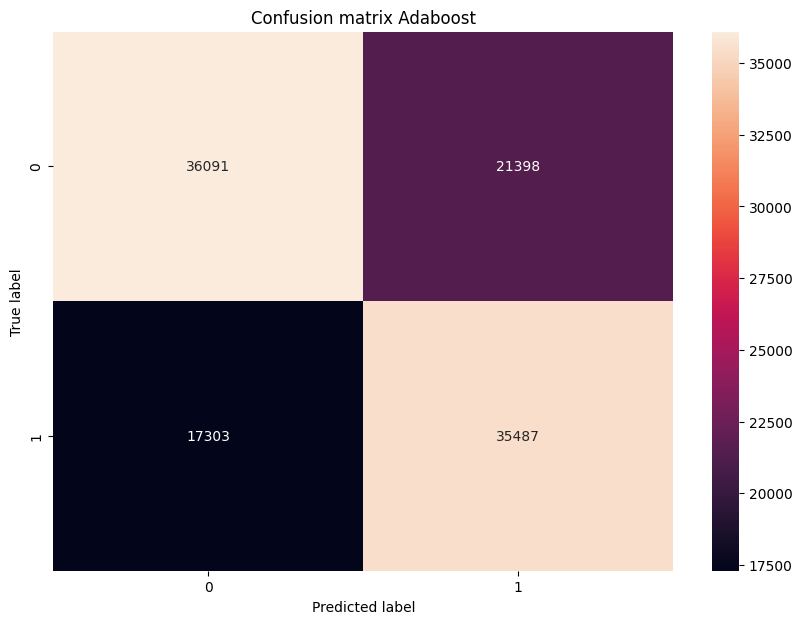

In [38]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), labels=[0, 1], title='Confusion matrix Adaboost')



# Model 1 - Basic ANN

## Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

2023-10-10 17:13:49.125915: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13775 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2023-10-10 17:13:49.127035: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13775 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:af:00.0, compute capability: 7.5
2023-10-10 17:13:49.127956: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 13775 MB memory:  -> device: 2, name: Tesla T4, pci bus id: 0000:d8:00.0, compute capability: 7.5


None


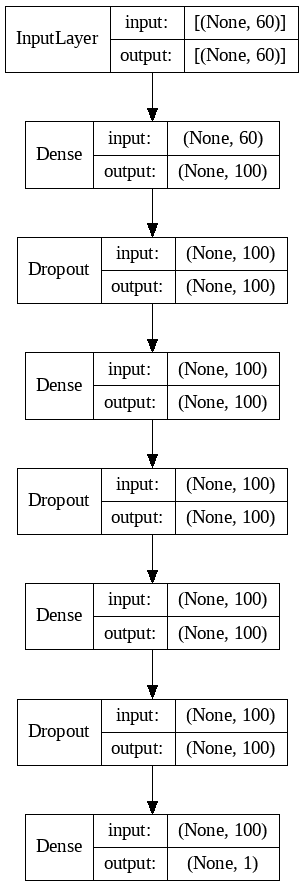

In [10]:
# write a ann model to classify 
from sklearn.metrics import roc_curve, auc, roc_auc_score

def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model


def get_model_1():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    # model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
# model2 = get_model2()

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=False)






## Compile and fit


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#validation accuracy chart



history = model.fit(X_train, y_train, epochs=100, batch_size=2048, validation_data=(X_val, y_val), verbose=1)



Epoch 1/100


2023-10-10 17:14:00.137217: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3db8013100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-10 17:14:00.137306: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-10-10 17:14:00.137326: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2023-10-10 17:14:00.137341: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
2023-10-10 17:14:00.149745: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-10 17:14:00.309490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-10 17:14:00.445834: I ./tensorflow/compiler/jit/device_compiler.h:186] Compi

121/121 [==============================] - 3s 10ms/step - loss: 1.3308 - accuracy: 0.7069 - val_loss: 0.6886 - val_accuracy: 0.7916
Epoch 2/100
121/121 [==============================] - 1s 8ms/step - loss: 0.5840 - accuracy: 0.8093 - val_loss: 0.4399 - val_accuracy: 0.8446
Epoch 3/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4322 - accuracy: 0.8404 - val_loss: 0.3865 - val_accuracy: 0.8566
Epoch 4/100
121/121 [==============================] - 1s 8ms/step - loss: 0.3987 - accuracy: 0.8531 - val_loss: 0.3653 - val_accuracy: 0.8658
Epoch 5/100
121/121 [==============================] - 1s 8ms/step - loss: 0.4001 - accuracy: 0.8578 - val_loss: 0.3557 - val_accuracy: 0.8703
Epoch 6/100
121/121 [==============================] - 1s 8ms/step - loss: 0.3730 - accuracy: 0.8627 - val_loss: 0.3412 - val_accuracy: 0.8757
Epoch 7/100
121/121 [==============================] - 1s 8ms/step - loss: 0.3643 - accuracy: 0.8663 - val_loss: 0.3395 - val_accuracy: 0.8770
Epoch 8/10

## Save

In [12]:

# save model
model.save('../model/ember_model_ann.h5')

/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predict

In [13]:

y_pred = model.predict(X_test)

y_pred_real = [int(round(x[0])) for x in y_pred]
y_pred_real = np.array(y_pred_real)


3447/3447 [==============================] - 4s 1ms/step


In [69]:
y_test.shape, y_pred.shape,y_pred_real.shape

((110279,), (110279, 1), (110279,))

## Accuracy

In [14]:
# find accuracy of the model
accuracy_score(y_test, y_pred_real)

0.8592479075798656

## Graphs

### ROC and AUC

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

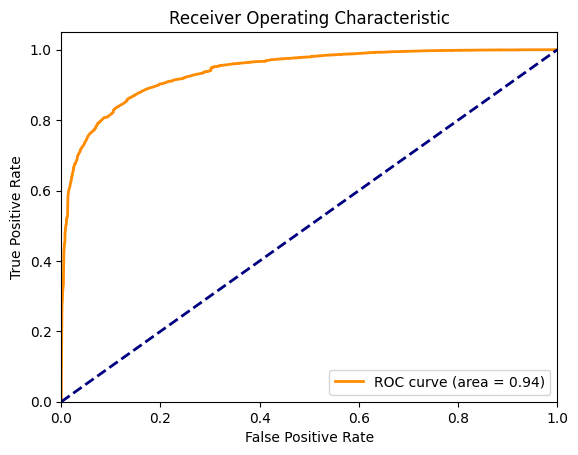

AUC Score: 0.9395401489310666


In [16]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

### Confusion Matrix

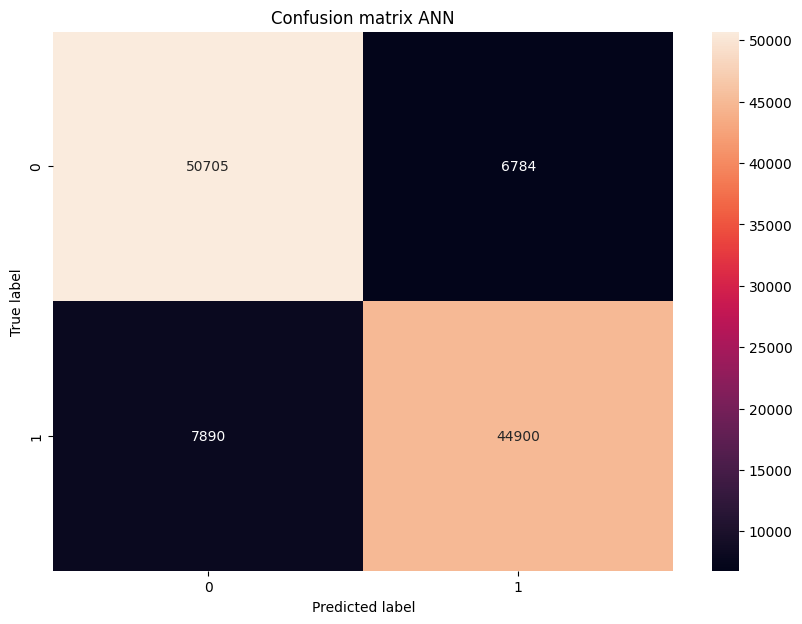

In [77]:
# confusion matrix



def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_real, labels=[0, 1], title='Confusion matrix ANN')

### Default Validation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


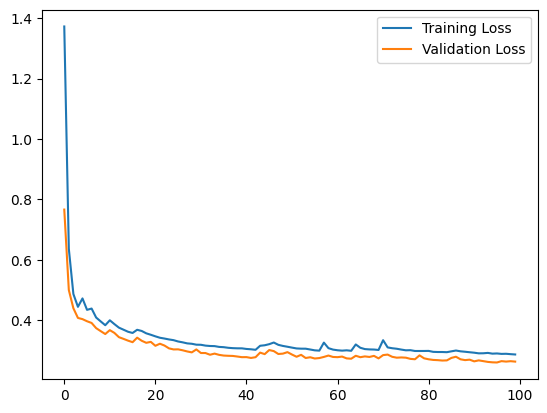

In [72]:

#get training loss
print(history.history.keys())
train_loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


## F1 scores and somethings

In [73]:
# Confusion matrix
confusion_matrix_output = confusion_matrix(y_test, y_pred_final, labels=[0, 1])

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP = confusion_matrix_output[1, 1]
TN = confusion_matrix_output[0, 0]
FP = confusion_matrix_output[0, 1]
FN = confusion_matrix_output[1, 0]

print(TP)


# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall (sensitivity)
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

# Calculate MCC with overflow handling
numerator = (TP * TN - FP * FN)
denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Avoid division by zero and handle overflow/underflow
if denominator == 0:
    mcc = 0  # Handle division by zero
else:
    mcc = numerator / denominator

# Print the calculated MCC
# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")


44576
Accuracy: 0.8663
Precision: 0.8721
Recall (Sensitivity): 0.8444
F1-Score: 0.8580
Specificity (True Negative Rate): 0.8863


In [74]:

#get training loss
print(model.history.history.keys())
train_loss = model.history.history['loss']
#get validation loss
val_loss = model.history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


dict_keys([])


KeyError: 'loss'

In [76]:
print(classification_report(y_test,y_pred_real))
print(accuracy_score(y_test,y_pred_real))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     57489
           1       0.87      0.85      0.86     52790

    accuracy                           0.87    110279
   macro avg       0.87      0.87      0.87    110279
weighted avg       0.87      0.87      0.87    110279

0.8669374948993008


#  Ensemble Model - Adaboost

## Model

In [25]:

def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



model= KerasClassifier(model=get_model, epochs=100, batch_size=2048, verbose=1)

ada_model = AdaBoostClassifier(estimator=model, n_estimators=10, random_state=42, algorithm='SAMME')

# pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', ada_model)])




## Training

In [26]:

# pipeline.fit(X_train, y_train)

ada_model.fit(X_train, y_train)


Epoch 1/100
121/121 [==============================] - 2s 7ms/step - loss: 2.7993e-06 - accuracy: 0.5416
Epoch 2/100
121/121 [==============================] - 1s 7ms/step - loss: 2.6838e-06 - accuracy: 0.6119
Epoch 3/100
121/121 [==============================] - 1s 7ms/step - loss: 2.5290e-06 - accuracy: 0.6544
Epoch 4/100
121/121 [==============================] - 1s 7ms/step - loss: 2.4102e-06 - accuracy: 0.6779
Epoch 5/100
121/121 [==============================] - 1s 7ms/step - loss: 2.3260e-06 - accuracy: 0.6954
Epoch 6/100
121/121 [==============================] - 1s 7ms/step - loss: 2.2566e-06 - accuracy: 0.7099
Epoch 7/100
121/121 [==============================] - 1s 7ms/step - loss: 2.1944e-06 - accuracy: 0.7249
Epoch 8/100
121/121 [==============================] - 1s 7ms/step - loss: 2.1379e-06 - accuracy: 0.7375
Epoch 9/100
121/121 [==============================] - 1s 7ms/step - loss: 2.0952e-06 - accuracy: 0.7453
Epoch 10/100
121/121 [==============================] -

AdaBoostClassifier(algorithm='SAMME',
                   estimator=KerasClassifier(batch_size=2048, epochs=100, model=<function get_model at 0x7f775464c8b0>),
                   n_estimators=10, random_state=42)

## Save

In [26]:
joblib.dump(ada_model, '../model/ember_model_adaboost.joblib')

2023-08-29 22:41:21.334540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41:21.350286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41:21.530128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-08-29 22:41

INFO:tensorflow:Assets written to: ram://2ac75dc2abf94bf2a6fee9f78e4b0e9b/assets


INFO:tensorflow:Assets written to: ram://2ac75dc2abf94bf2a6fee9f78e4b0e9b/assets


['../model/ember_model_adaboost.joblib']

## Load model

In [27]:
model = joblib.load('../model/ember_model_adaboost.joblib')

2023-08-29 22:41:55.732406: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://df1f88c75306484784e4c4b645c1c50d: INVALID_ARGUMENT: ram://df1f88c75306484784e4c4b645c1c50d is a directory.


## Predict

In [27]:
y_pred = ada_model.predict(X_test)

54/54 [==============================] - 0s 2ms/step


## Graphs

### Confusion Matrix


0.8321983333182201


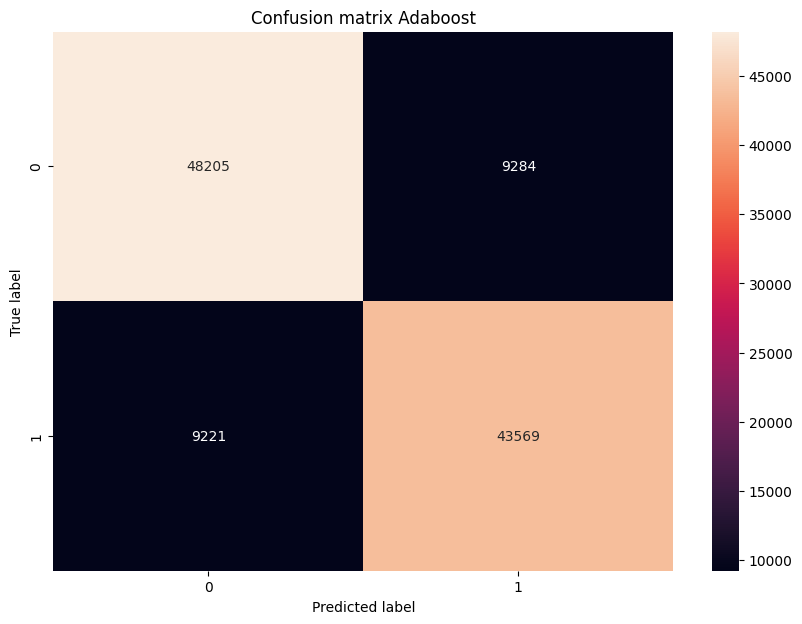

In [51]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), labels=[0, 1], title='Confusion matrix Adaboost')



In [64]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     57489
           1       0.82      0.83      0.82     52790

    accuracy                           0.83    110279
   macro avg       0.83      0.83      0.83    110279
weighted avg       0.83      0.83      0.83    110279



### Learning curves

In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(ada_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1,n_iter=10)
# plt.plot(train_sizes,np.mean(train_scores,axis=1))


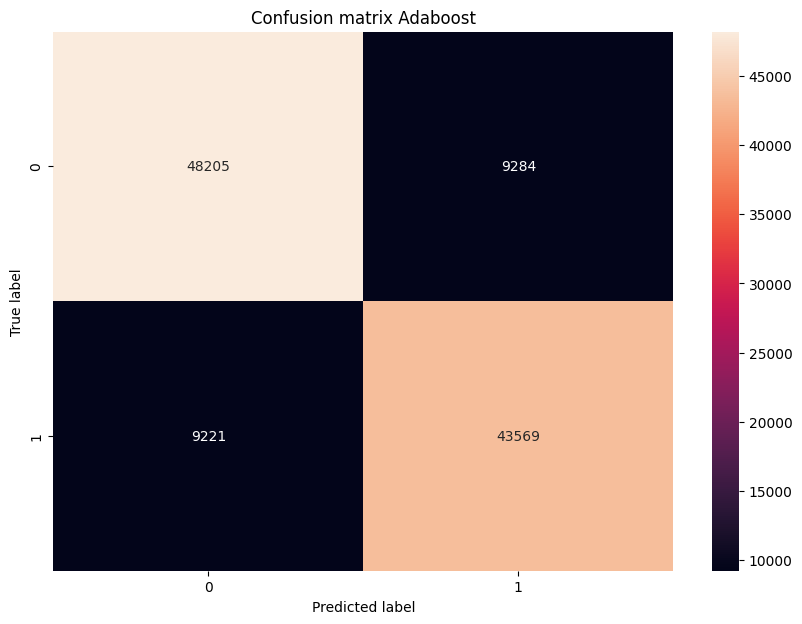

In [12]:
def plot_confusion_matrix( labels, title):
    # cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm = np.array([[48205,9284],[9221,43569]],np.int32)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
# print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(labels=[0, 1], title='Confusion matrix Adaboost')
